In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , RandomizedSearchCV ,GridSearchCV,learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from lazypredict.Supervised import LazyRegressor
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from scipy.stats import randint, uniform
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [2]:
df=pd.read_csv("ml_dataset.csv")

In [129]:
df[feat_names].shape

(100000, 25)

In [4]:
X=df.drop("HR",axis=1)
y=df.HR

In [5]:
X_train, X_test, y_train, y_valid = train_test_split(X, y, test_size=0.24, random_state=42)

In [6]:
X_train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,...,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition
1030,842.22,843.04,71.93,13.16,13.16,5.47,5.53,0.07,-0.16,0.01,...,1.07,4.14,2572.77,23.13,0.04,9.31,101.29,2.19,1.20,2.00
23907,650.36,625.63,103.62,9.09,9.09,11.40,2.47,0.00,0.04,-0.06,...,2.49,11.82,1860.30,7.46,0.13,6.43,146.40,2.13,1.21,0.00
21364,1073.69,1044.01,82.73,17.45,17.43,5.96,10.67,2.07,-1.48,0.03,...,0.80,6.72,6301.04,13.88,0.07,12.33,116.37,1.96,1.08,0.00
61980,697.34,705.04,73.73,18.31,18.31,4.03,10.07,2.13,1.31,-0.81,...,1.04,3.35,2053.80,3.75,0.03,12.95,103.46,2.08,1.32,0.00
28120,865.66,868.68,68.54,16.90,16.90,4.06,13.00,0.80,1.89,-0.64,...,1.41,2.69,2238.02,36.17,0.03,11.95,96.19,2.03,1.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1001.94,948.62,82.73,16.52,16.51,5.96,11.33,1.60,-0.64,0.58,...,0.69,6.88,2803.66,13.52,0.07,11.68,116.37,1.91,1.10,1.00
54886,820.45,820.34,56.04,19.32,19.32,2.90,21.13,0.33,-0.31,-0.12,...,1.71,2.65,2147.00,36.70,0.03,13.67,78.07,2.20,1.29,0.00
76820,789.52,788.81,52.23,11.97,11.97,4.36,2.07,0.13,-0.25,0.10,...,1.16,1.92,1474.43,50.97,0.02,8.47,73.37,2.20,1.14,0.00
860,807.99,811.16,62.64,18.76,18.76,3.34,19.80,0.00,-0.19,-0.17,...,2.37,3.88,2174.67,24.79,0.04,13.27,87.58,2.20,1.29,0.00


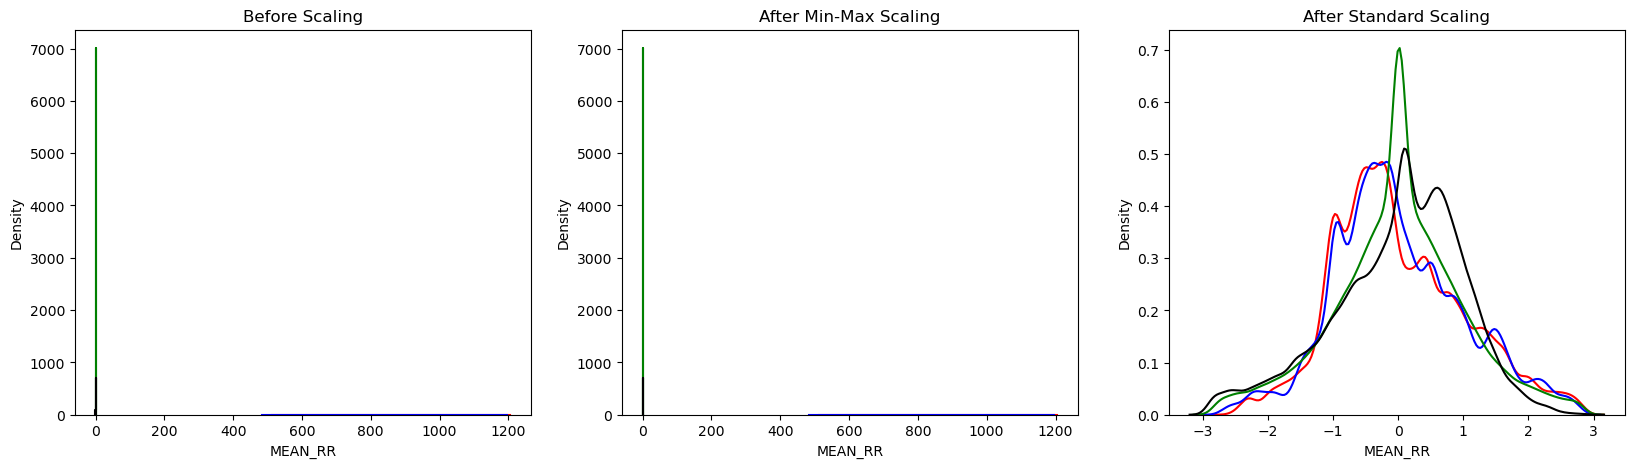

In [7]:
#this plot to show best scaler should we chose
scaler = StandardScaler()
standard_df = scaler.fit_transform(X[['MEAN_RR','MEDIAN_RR','MEAN_REL_RR','MEDIAN_REL_RR']])
standard_df = pd.DataFrame(standard_df, columns =['MEAN_RR','MEDIAN_RR','MEAN_REL_RR','MEDIAN_REL_RR'])
 
scaler0 = MinMaxScaler()
minmax_df = scaler0.fit_transform(X[['MEAN_RR','MEDIAN_RR','MEAN_REL_RR','MEDIAN_REL_RR']])
minmax_df = pd.DataFrame(df, columns =['MEAN_RR','MEDIAN_RR','MEAN_REL_RR','MEDIAN_REL_RR'])
 
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))
sns.kdeplot(X['MEAN_RR'],ax=ax1,color='r')
sns.kdeplot(X['MEDIAN_RR'],ax=ax1,color='blue')
sns.kdeplot(X['MEAN_REL_RR'],ax=ax1,color='g')
sns.kdeplot(X['MEDIAN_REL_RR'],ax=ax1,color='black')

ax1.set_title('Before Scaling') 
sns.kdeplot(minmax_df['MEAN_RR'], ax = ax2, color ='red')
sns.kdeplot(minmax_df['MEDIAN_RR'], ax = ax2, color ='blue')
sns.kdeplot(minmax_df['MEAN_REL_RR'], ax = ax2, color ='g')
sns.kdeplot(minmax_df['MEDIAN_REL_RR'], ax = ax2, color ='black')

ax2.set_title('After Min-Max Scaling')
 
sns.kdeplot(standard_df['MEAN_RR'], ax = ax3, color ='red')
sns.kdeplot(standard_df['MEDIAN_RR'], ax = ax3, color ='blue')
sns.kdeplot(standard_df['MEAN_REL_RR'], ax = ax3, color ='g')
sns.kdeplot(standard_df['MEDIAN_REL_RR'], ax = ax3, color ='black')

ax3.set_title('After Standard Scaling')


 
plt.show()

after this figure i will use standard scaler

In [8]:
X_train.shape,y_train.shape

((76000, 34), (76000,))

In [9]:
# Create a pipeline with StandardScaler
pipeline = Pipeline([
    ('standard_scaler', StandardScaler())])

# Fit and transform the dataset using the pipeline
scaled_data1 = pipeline.fit_transform(X_train)
scaled_data2 = pipeline.transform(X_test)

In [10]:
X_train=pd.DataFrame(scaled_data1,columns=X_train.columns)
X_valid=pd.DataFrame(scaled_data2,columns=X_test.columns)

### feature selection

In [100]:
seq_model= sfs(LinearRegression(),
        k_features=25,
        forward=True,
        cv=5,
        scoring="r2"
)

In [101]:
seq_model.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(25, 25),
                          scoring='r2')

In [102]:
feat_names=list(seq_model.k_feature_names_)

In [127]:
feat_names

['MEAN_RR',
 'MEDIAN_RR',
 'SDRR',
 'RMSSD',
 'SDSD',
 'SDRR_RMSSD',
 'pNN25',
 'pNN50',
 'KURT',
 'MEDIAN_REL_RR',
 'SDRR_REL_RR',
 'RMSSD_REL_RR',
 'SDSD_REL_RR',
 'SDRR_RMSSD_REL_RR',
 'VLF_PCT',
 'LF',
 'LF_PCT',
 'LF_NU',
 'HF',
 'HF_PCT',
 'LF_HF',
 'HF_LF',
 'sampen',
 'higuci',
 'condition']

### PCA

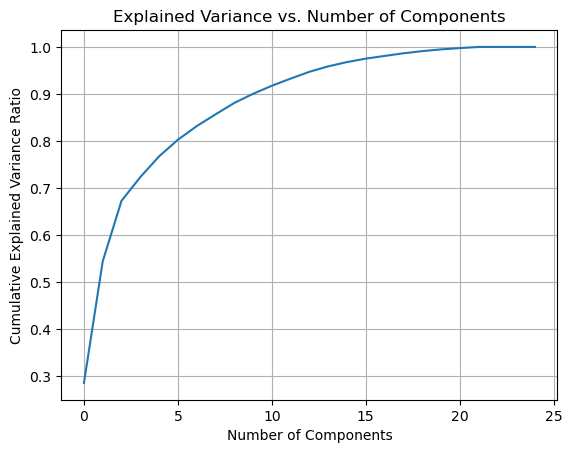

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA and get explained variance ratios
pca = PCA()
pca.fit(X_train[feat_names])
explained_variances = pca.explained_variance_ratio_

# Plot cumulative explained variance ratio
cumulative_variance = np.cumsum(explained_variances)
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

i will chose 22 n_components

In [125]:
# Fit PCA
pca = PCA(n_components=19)
pca.fit(X_train[feat_names])

# Transform the data
X_train_pca = pca.transform(X_train[feat_names])
X_valid_pca = pca.transform(X_valid[feat_names])


### LinearRegression using PCA-transformed data

In [126]:
regressor = LinearRegression()
fitting_data=regressor.fit(X_train_pca, y_train)

# Predict on validation data
y_pred = regressor.predict(X_valid_pca)

# Calculate Mean Squared Error
mse = mean_squared_error(y_valid, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Root Squared Error
mse = mean_squared_error(y_valid, y_pred)
print("Mean Root Squared Error:", np.sqrt(mse))

# You can also calculate R-squared
r_squared = regressor.score(X_valid_pca, y_valid)
print("R-squared:", r_squared)


Mean Squared Error: 11.690527839200023
Mean Root Squared Error: 3.4191413891794564
R-squared: 0.8717392126863568


In [108]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(regressor, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -np.mean(cross_val_scores)
print("Mean Cross-Validation MSE:", mean_cv_mse)


Mean Cross-Validation MSE: 11.511158897034587


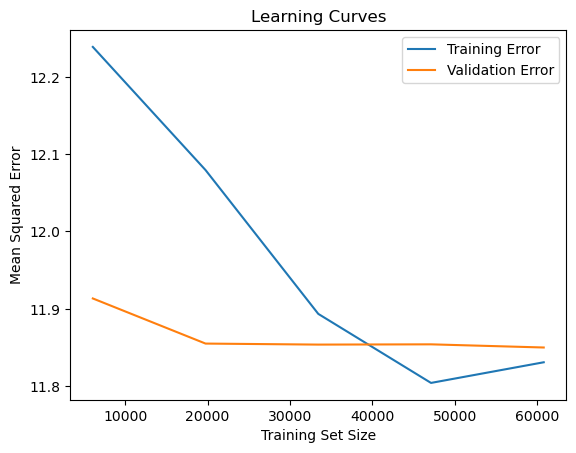

In [15]:
# Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    regressor, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='neg_mean_squared_error')

plt.figure()
plt.plot(train_sizes, -np.mean(train_scores, axis=1), label='Training Error')
plt.plot(train_sizes, -np.mean(valid_scores, axis=1), label='Validation Error')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.legend()
plt.show()

degree 1
Mean Squared Error: 11.690527839200021
Mean Root Squared Error: 3.419141389179456
R-squared: 0.8717392126863568


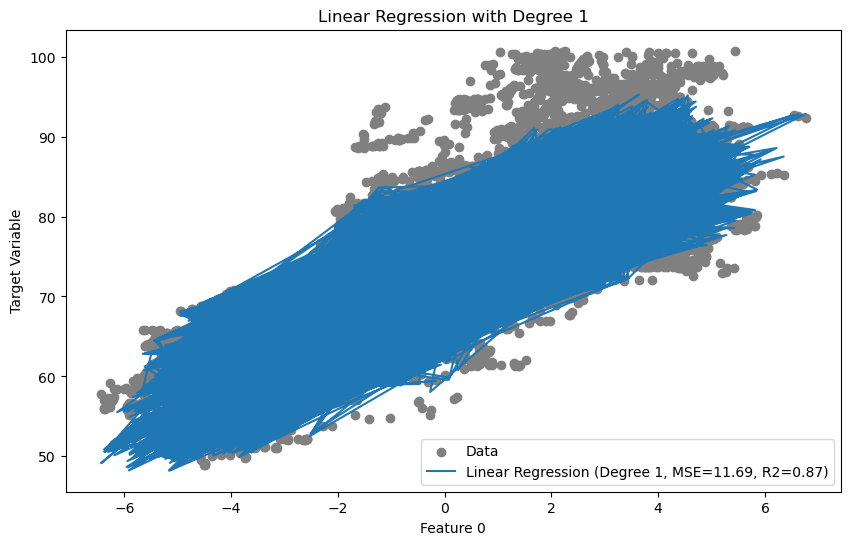

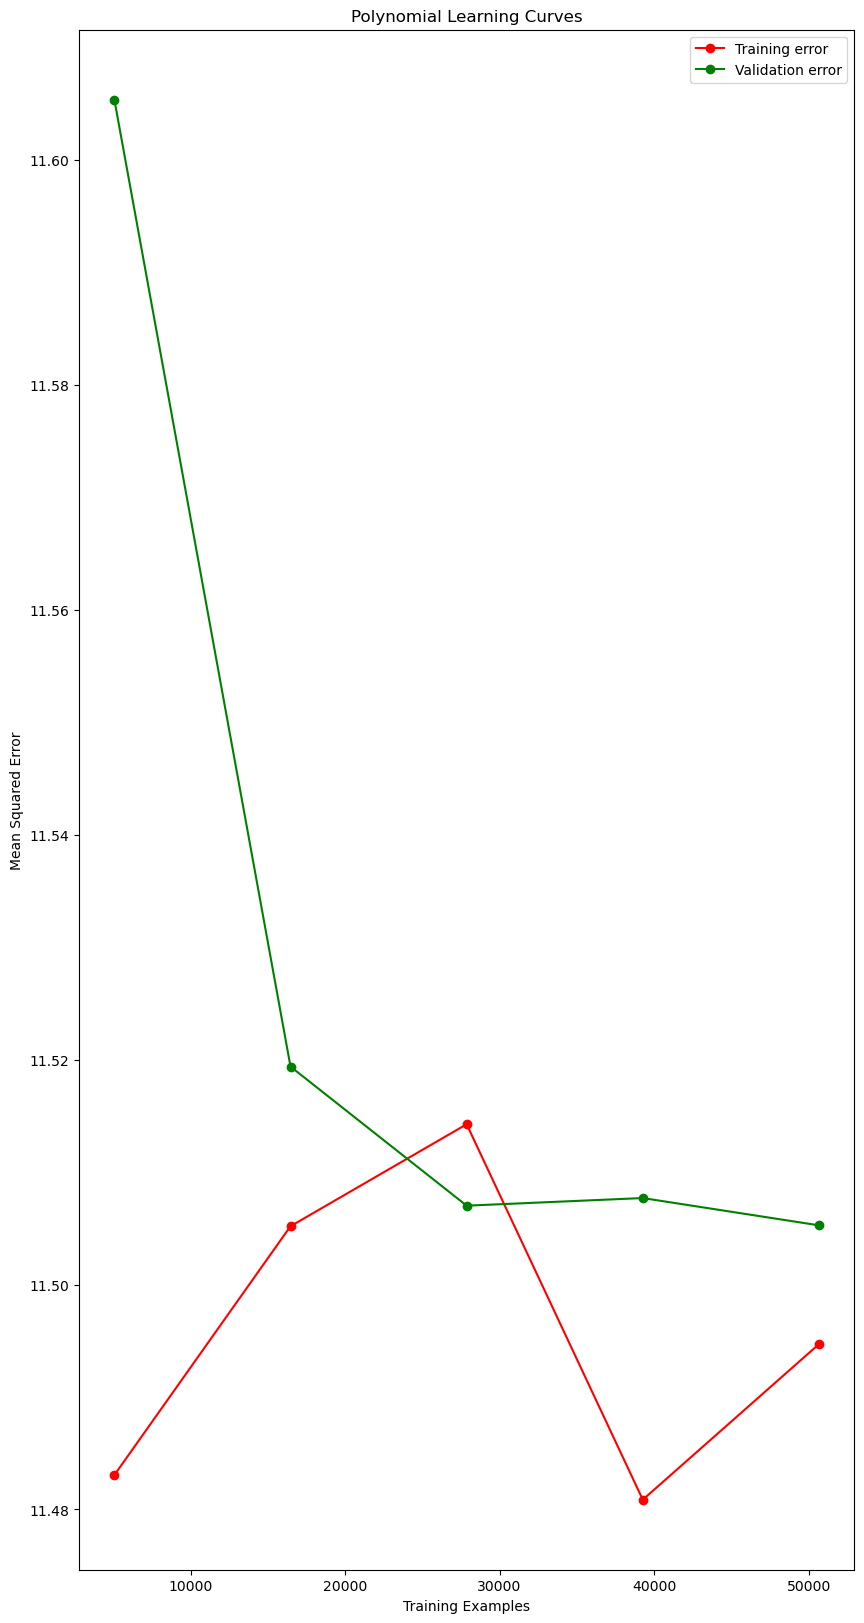

degree 2
Mean Squared Error: 3.9334210312865436
Mean Root Squared Error: 1.9832854134709264
R-squared: 0.9568450898669278


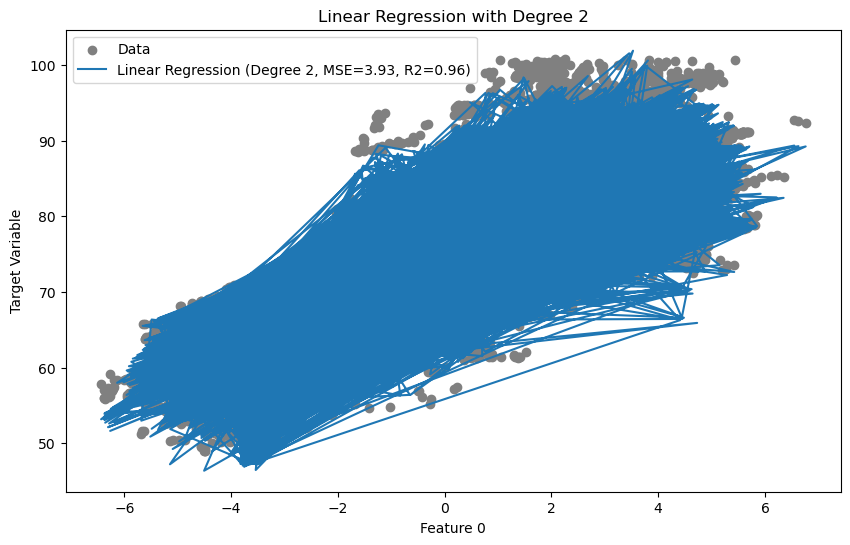

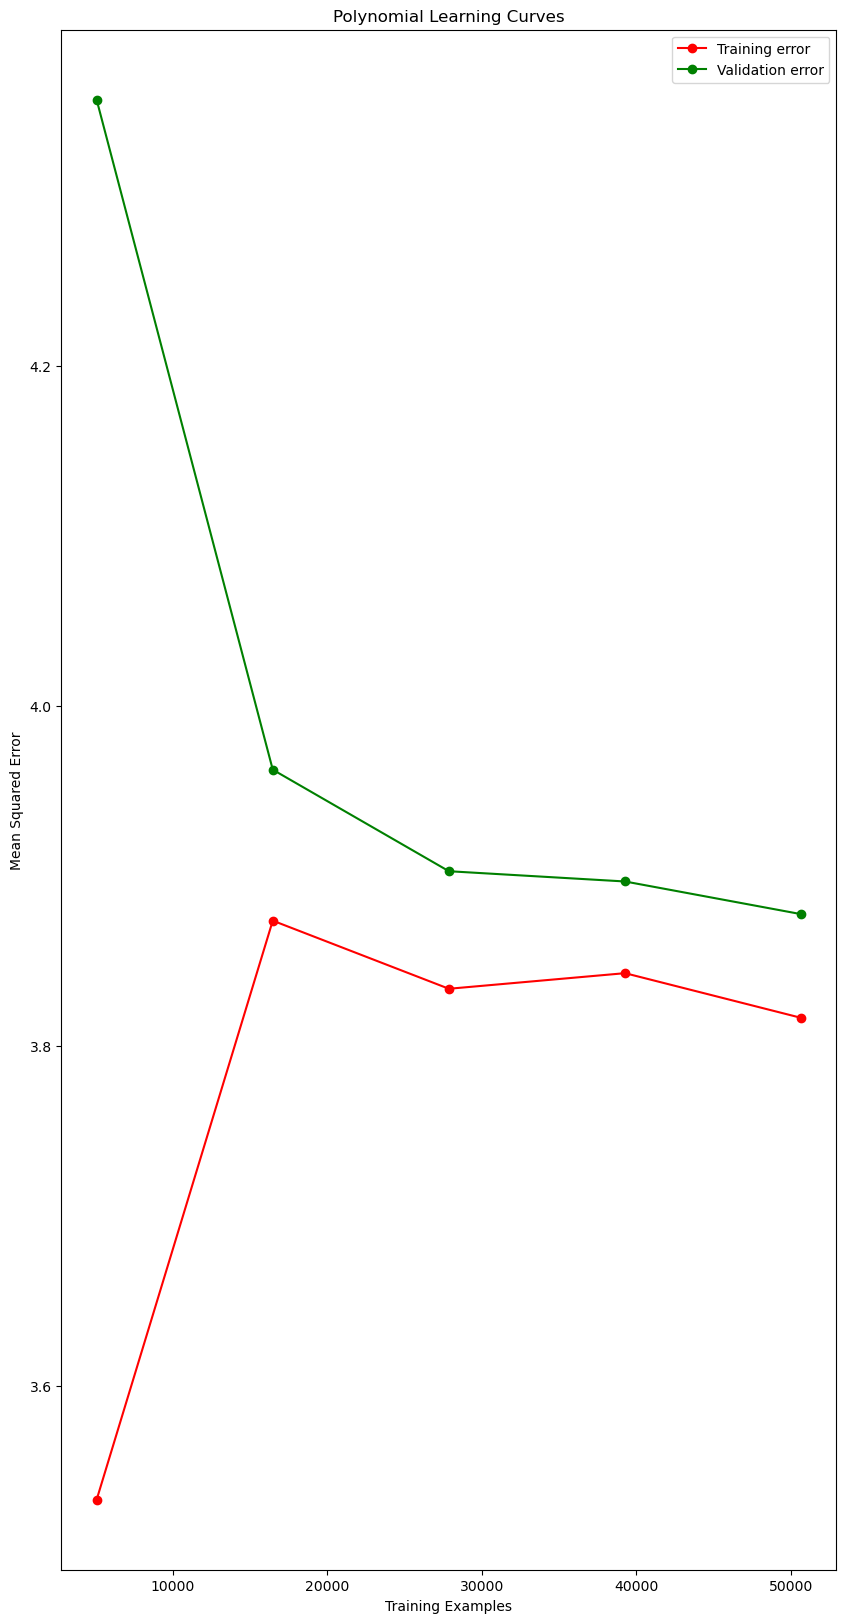

degree 3
Mean Squared Error: 0.7394248349460337
Mean Root Squared Error: 0.8598981538217382
R-squared: 0.9918875167320136


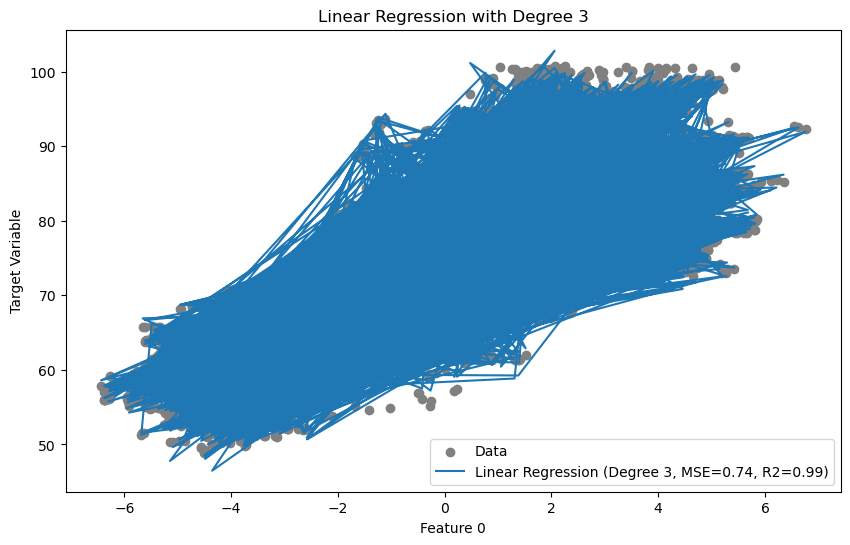

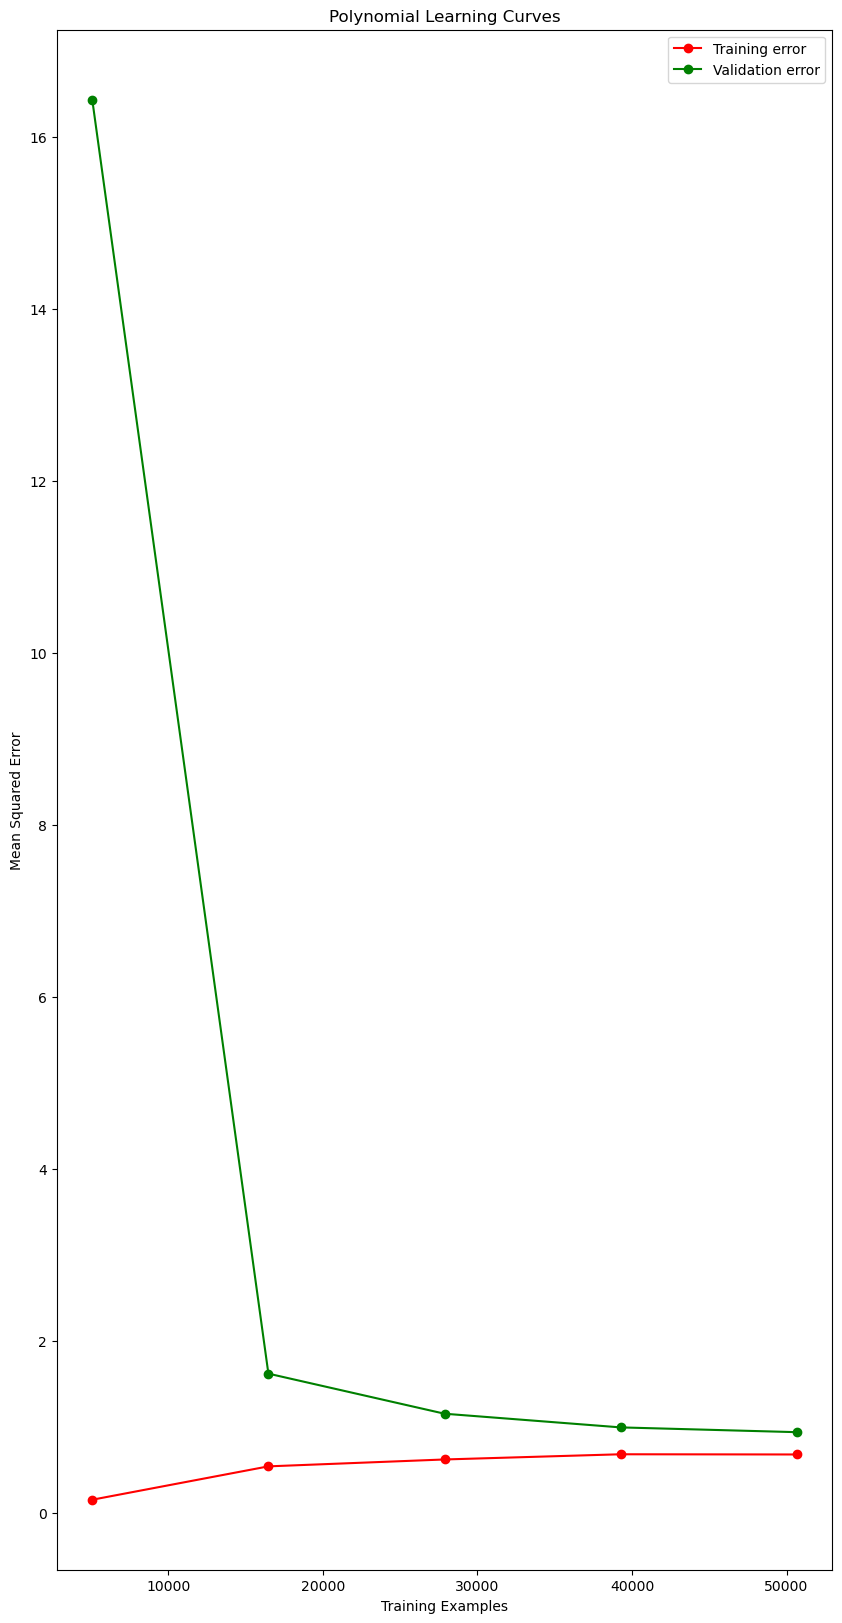

In [109]:
# Define a function to plot learning curves
def plot_polynomial_learning_curves(model, X_poly_train, y_train, X_poly_valid, y_valid):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_poly_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 20))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title('Polynomial Learning Curves')
    plt.legend()
    plt.show()
    
    
# Linear Regression with different degrees

degrees = [1, 2, 3]
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train_pca)
    X_poly_valid = polynomial_features.transform(X_valid_pca)

    linear_model = LinearRegression()
    linear_model.fit(X_poly_train, y_train)
    y_pred = linear_model.predict(X_poly_valid)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    print(f"degree {degree}")
    print("Mean Squared Error:", mse)
    print("Mean Root Squared Error:", np.sqrt(mse))
    print("R-squared:", r2)
    
    #  plots the results for each degree
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_valid_pca[:, 0], y_valid, color='gray', label='Data')
    plt.plot(X_valid_pca[:, 0], y_pred, label=f'Linear Regression (Degree {degree}, MSE={mse:.2f}, R2={r2:.2f})')
    plt.xlabel('Feature 0')
    plt.ylabel('Target Variable')
    plt.title(f'Linear Regression with Degree {degree}')
    plt.legend()
    
    plot_polynomial_learning_curves(linear_model, X_poly_train, y_train, X_poly_valid, y_valid)

    plt.show()


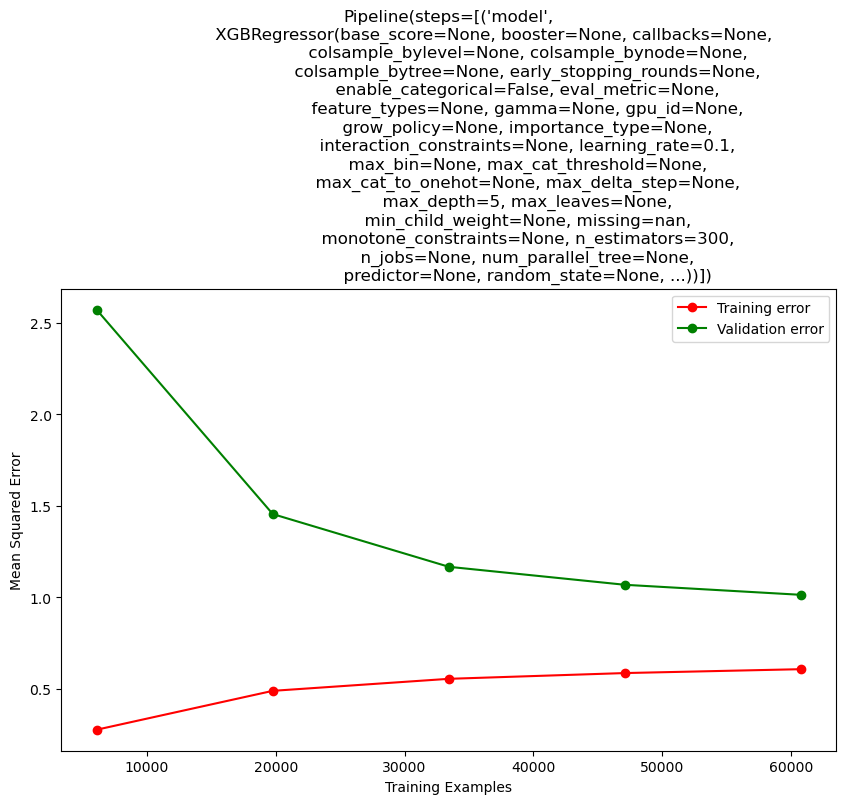

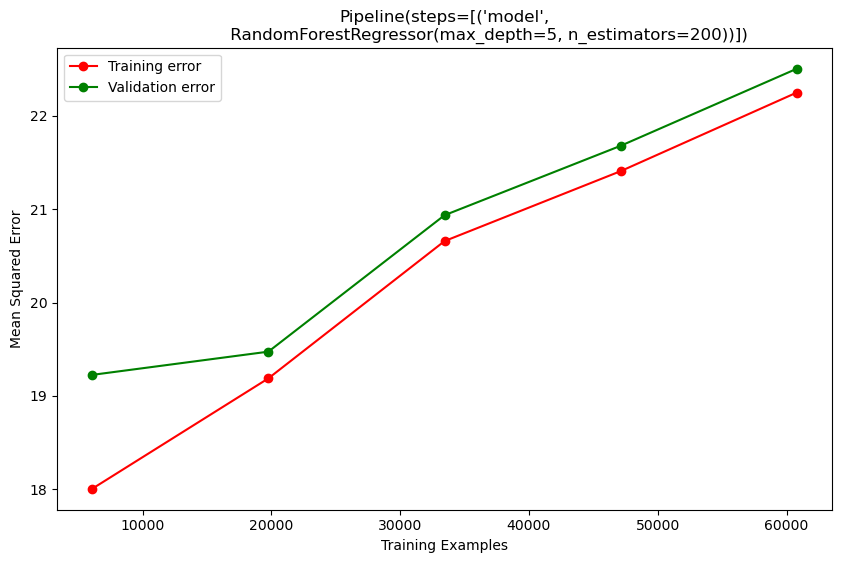

In [31]:

# Define the models and their parameter grids
models = {
    'XGBoost': (Pipeline([
        ('model', XGBRegressor())
    ]), {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.1, 0.01, 0.001],
        'model__max_depth': [3, 4, 5]
    }),
    'Random Forest': (Pipeline([
        ('model', RandomForestRegressor())
    ]), {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [3, 4, 5]
    })
    
}

# Define a function to plot learning curves
def plot_learning_curves(model, X_train_pca, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title(model)
    plt.legend()
    plt.show()

# Perform model tuning and evaluation
results = []
lc_results = []

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, refit=True)
    grid_search.fit(X_train_pca, y_train)

    best_model = grid_search.best_estimator_
    best_model.fit(X_train_pca, y_train)

    y_pred = best_model.predict(X_valid_pca)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)

    result = {
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Best Negative MSE': grid_search.best_score_,
        'Test MSE': mse,
        'R-squared': r2
    }
    results.append(result)

    # Append learning curve results
    lc_result = {
        'Model': model_name,
        'Train Sizes': train_sizes,
        'Train MSE': train_scores_mean,
        'Validation MSE': test_scores_mean
    }
    lc_results.append(lc_result)

    # Plot learning curve for the best model
    plot_learning_curves(best_model, X_train_pca, y_train)

# Create DataFrames for results and learning curve results
results_df = pd.DataFrame(results)
lc_results_df = pd.DataFrame(lc_results)

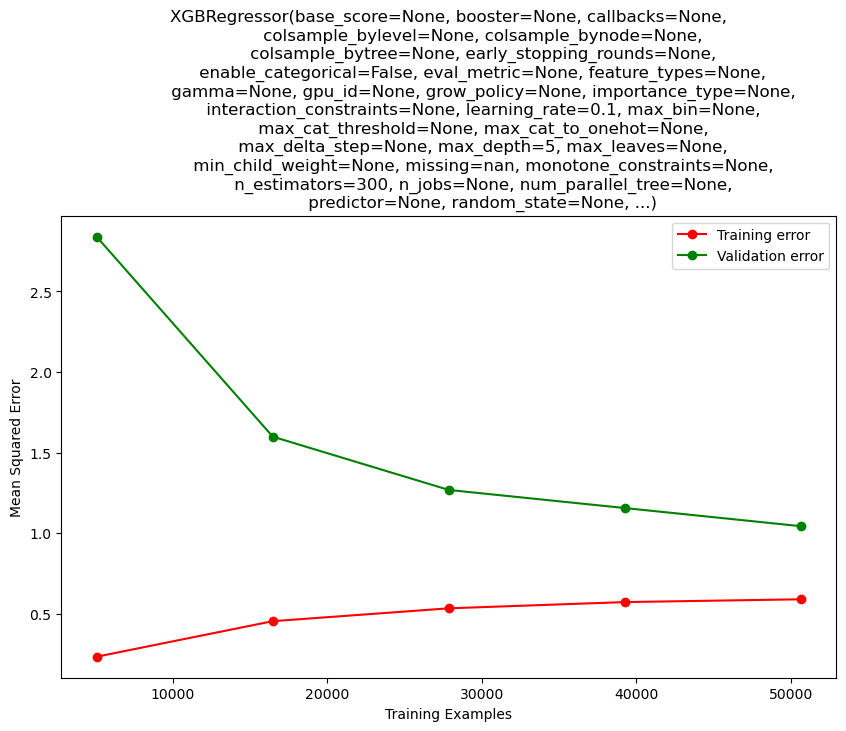

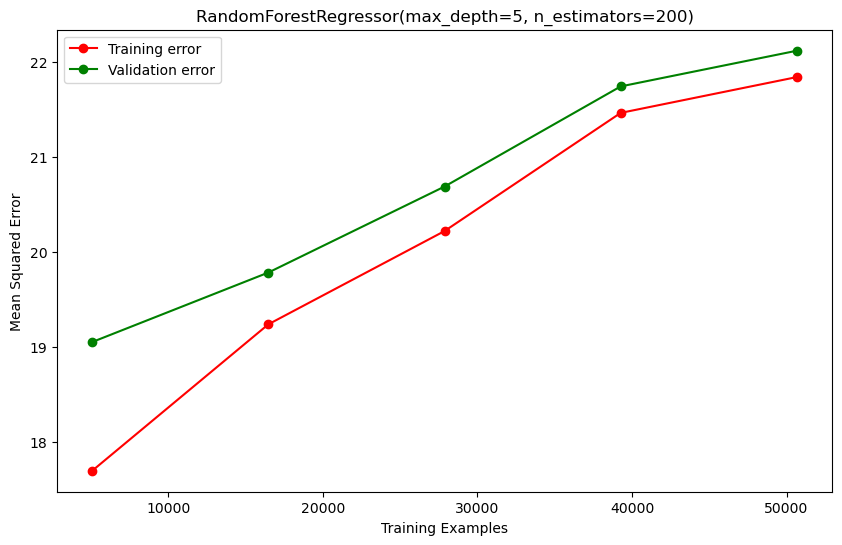

In [19]:
# Define the models and their parameter distributions
models = {
    'XGBoost': (XGBRegressor(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 4, 5]
    }),
    'Random Forest': (RandomForestRegressor(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5]
    })
}

# Define a function to plot learning curves
def plot_learning_curves(model, X_train_pca, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title(model)
    plt.legend()
    plt.show()

# Perform model tuning and evaluation
results = []
lc_results = []

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3, refit=True)
    grid_search.fit(X_train_pca, y_train)

    best_model = grid_search.best_estimator_
    best_model.fit(X_train_pca, y_train)

    y_pred = best_model.predict(X_valid_pca)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)

    result = {
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Best Negative MSE': grid_search.best_score_,
        'Test MSE': mse,
        'R-squared': r2
    }
    results.append(result)

    # Calculate learning curve results
    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    # Append learning curve results
    lc_result = {
        'Model': model_name,
        'Train Sizes': train_sizes,
        'Train MSE': train_scores_mean,
        'Validation MSE': test_scores_mean
    }
    lc_results.append(lc_result)

    # Plot learning curve for the best model
    plot_learning_curves(best_model, X_train_pca, y_train)

# Create DataFrames for results and learning curve results
results_df = pd.DataFrame(results)
lc_results_df = pd.DataFrame(lc_results)


In [20]:
results_df

,Model,Best Parameters,Best Negative MSE,Test MSE,R-squared
0,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-1.06,0.95,0.99
1,Random Forest,"{'max_depth': 5, 'n_estimators': 200}",-22.04,23.01,0.75


In [21]:
lc_results_df["Validation MSE"][0]

array([2.83915711, 1.59907121, 1.26842073, 1.15616036, 1.04354645])

In [22]:
#mse
lc_results_df["Train MSE"][0]

array([0.23415456, 0.45457819, 0.53443778, 0.57308101, 0.5903244 ])

In [23]:
#mrse
np.sqrt(lc_results_df["Train MSE"][0])

array([0.4838952 , 0.67422414, 0.73105252, 0.75702114, 0.76832571])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 19
[LightGBM] [Info] Start training from score 73.430139
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 19
[LightGBM] [Info] Start training from score 73.430139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 19
[LightGBM] [Info] Start training from score 73.476190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 19
[LightGBM] [Info] Start training from score 73.430139
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 19
[LightGBM] [Info] Start training from score 73.442528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 19
[LightGBM] [Info] Start training from score 73.433224
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 19
[LightGBM] [Info] Start training from score 73.430139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be ba

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sinc

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 39266, number of used features: 19
[LightGBM] [Info] Start training from score 73.466941
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[Lig

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 6080, number of used features: 19
[LightGBM] [Info] Start training from score 73.466179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 33440, number of used features: 19
[LightGBM] [Info] Start training from score 73.410183
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choo

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 19
[LightGBM] [Info] Start training from score 73.446088
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[Lig

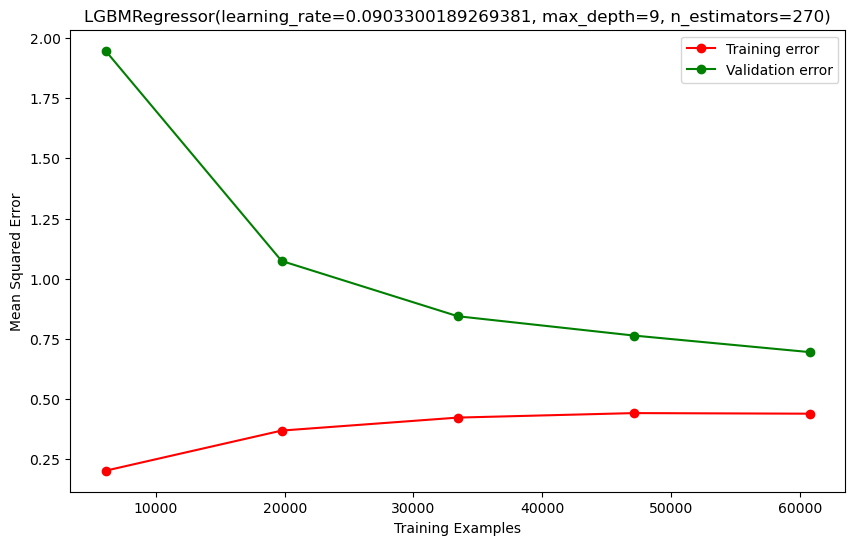

0:	learn: 9.3429655	total: 180ms	remaining: 1m 28s
1:	learn: 9.1194241	total: 201ms	remaining: 49.5s
2:	learn: 8.9048876	total: 222ms	remaining: 36.3s
3:	learn: 8.6899850	total: 243ms	remaining: 29.8s
4:	learn: 8.4836842	total: 263ms	remaining: 25.8s
5:	learn: 8.2835553	total: 284ms	remaining: 23.2s
6:	learn: 8.0917591	total: 306ms	remaining: 21.3s
7:	learn: 7.9047464	total: 327ms	remaining: 19.9s
8:	learn: 7.7252463	total: 350ms	remaining: 18.9s
9:	learn: 7.5519694	total: 372ms	remaining: 18s
10:	learn: 7.3803669	total: 396ms	remaining: 17.4s
11:	learn: 7.2136568	total: 420ms	remaining: 16.9s
12:	learn: 7.0498407	total: 444ms	remaining: 16.5s
13:	learn: 6.8945048	total: 467ms	remaining: 16.1s
14:	learn: 6.7410706	total: 492ms	remaining: 15.7s
15:	learn: 6.5913442	total: 516ms	remaining: 15.4s
16:	learn: 6.4434422	total: 540ms	remaining: 15.2s
17:	learn: 6.2996746	total: 565ms	remaining: 15s
18:	learn: 6.1641470	total: 590ms	remaining: 14.8s
19:	learn: 6.0302044	total: 616ms	remaining:

164:	learn: 1.4626724	total: 4.33s	remaining: 8.66s
165:	learn: 1.4564084	total: 4.36s	remaining: 8.63s
166:	learn: 1.4505997	total: 4.38s	remaining: 8.61s
167:	learn: 1.4460566	total: 4.41s	remaining: 8.58s
168:	learn: 1.4411370	total: 4.43s	remaining: 8.55s
169:	learn: 1.4373916	total: 4.46s	remaining: 8.52s
170:	learn: 1.4321498	total: 4.48s	remaining: 8.49s
171:	learn: 1.4282183	total: 4.51s	remaining: 8.47s
172:	learn: 1.4238170	total: 4.53s	remaining: 8.44s
173:	learn: 1.4181959	total: 4.56s	remaining: 8.41s
174:	learn: 1.4124103	total: 4.59s	remaining: 8.39s
175:	learn: 1.4065780	total: 4.61s	remaining: 8.36s
176:	learn: 1.4032787	total: 4.64s	remaining: 8.33s
177:	learn: 1.3983605	total: 4.66s	remaining: 8.3s
178:	learn: 1.3940230	total: 4.69s	remaining: 8.28s
179:	learn: 1.3908075	total: 4.71s	remaining: 8.25s
180:	learn: 1.3855011	total: 4.74s	remaining: 8.22s
181:	learn: 1.3819209	total: 4.77s	remaining: 8.2s
182:	learn: 1.3783359	total: 4.79s	remaining: 8.17s
183:	learn: 1.

324:	learn: 0.9680161	total: 8.45s	remaining: 4.42s
325:	learn: 0.9661753	total: 8.47s	remaining: 4.39s
326:	learn: 0.9635662	total: 8.49s	remaining: 4.36s
327:	learn: 0.9621102	total: 8.52s	remaining: 4.34s
328:	learn: 0.9605931	total: 8.54s	remaining: 4.31s
329:	learn: 0.9588381	total: 8.56s	remaining: 4.28s
330:	learn: 0.9569762	total: 8.59s	remaining: 4.25s
331:	learn: 0.9552480	total: 8.61s	remaining: 4.23s
332:	learn: 0.9530909	total: 8.64s	remaining: 4.2s
333:	learn: 0.9519578	total: 8.66s	remaining: 4.17s
334:	learn: 0.9501081	total: 8.69s	remaining: 4.15s
335:	learn: 0.9483251	total: 8.71s	remaining: 4.12s
336:	learn: 0.9465592	total: 8.74s	remaining: 4.1s
337:	learn: 0.9449071	total: 8.76s	remaining: 4.07s
338:	learn: 0.9429015	total: 8.79s	remaining: 4.04s
339:	learn: 0.9412606	total: 8.81s	remaining: 4.02s
340:	learn: 0.9398214	total: 8.84s	remaining: 3.99s
341:	learn: 0.9382559	total: 8.86s	remaining: 3.96s
342:	learn: 0.9361964	total: 8.89s	remaining: 3.94s
343:	learn: 0.

488:	learn: 0.7433969	total: 12.6s	remaining: 154ms
489:	learn: 0.7424328	total: 12.6s	remaining: 129ms
490:	learn: 0.7415251	total: 12.6s	remaining: 103ms
491:	learn: 0.7402819	total: 12.7s	remaining: 77.2ms
492:	learn: 0.7390454	total: 12.7s	remaining: 51.5ms
493:	learn: 0.7379869	total: 12.7s	remaining: 25.8ms
494:	learn: 0.7366719	total: 12.7s	remaining: 0us
0:	learn: 9.3138339	total: 23.4ms	remaining: 11.5s
1:	learn: 9.0918925	total: 46.7ms	remaining: 11.5s
2:	learn: 8.8788244	total: 70.1ms	remaining: 11.5s
3:	learn: 8.6658820	total: 93.1ms	remaining: 11.4s
4:	learn: 8.4645168	total: 117ms	remaining: 11.5s
5:	learn: 8.2660311	total: 140ms	remaining: 11.4s
6:	learn: 8.0750407	total: 164ms	remaining: 11.5s
7:	learn: 7.8854118	total: 189ms	remaining: 11.5s
8:	learn: 7.7053260	total: 213ms	remaining: 11.5s
9:	learn: 7.5324736	total: 237ms	remaining: 11.5s
10:	learn: 7.3618647	total: 262ms	remaining: 11.5s
11:	learn: 7.1960911	total: 286ms	remaining: 11.5s
12:	learn: 7.0364310	total: 3

161:	learn: 1.4830860	total: 4.18s	remaining: 8.59s
162:	learn: 1.4782378	total: 4.21s	remaining: 8.57s
163:	learn: 1.4738144	total: 4.23s	remaining: 8.54s
164:	learn: 1.4687578	total: 4.26s	remaining: 8.52s
165:	learn: 1.4624571	total: 4.29s	remaining: 8.49s
166:	learn: 1.4568806	total: 4.31s	remaining: 8.46s
167:	learn: 1.4508337	total: 4.33s	remaining: 8.44s
168:	learn: 1.4458749	total: 4.36s	remaining: 8.41s
169:	learn: 1.4418553	total: 4.38s	remaining: 8.38s
170:	learn: 1.4377794	total: 4.41s	remaining: 8.36s
171:	learn: 1.4328207	total: 4.44s	remaining: 8.33s
172:	learn: 1.4278439	total: 4.46s	remaining: 8.31s
173:	learn: 1.4226901	total: 4.49s	remaining: 8.28s
174:	learn: 1.4174219	total: 4.51s	remaining: 8.25s
175:	learn: 1.4132381	total: 4.54s	remaining: 8.22s
176:	learn: 1.4102012	total: 4.56s	remaining: 8.19s
177:	learn: 1.4032501	total: 4.58s	remaining: 8.16s
178:	learn: 1.3981973	total: 4.61s	remaining: 8.14s
179:	learn: 1.3928661	total: 4.63s	remaining: 8.11s
180:	learn: 

325:	learn: 0.9683604	total: 8.34s	remaining: 4.32s
326:	learn: 0.9660873	total: 8.36s	remaining: 4.29s
327:	learn: 0.9646318	total: 8.38s	remaining: 4.27s
328:	learn: 0.9630584	total: 8.41s	remaining: 4.24s
329:	learn: 0.9611457	total: 8.43s	remaining: 4.22s
330:	learn: 0.9594631	total: 8.46s	remaining: 4.19s
331:	learn: 0.9580970	total: 8.48s	remaining: 4.17s
332:	learn: 0.9560448	total: 8.51s	remaining: 4.14s
333:	learn: 0.9542223	total: 8.53s	remaining: 4.11s
334:	learn: 0.9528326	total: 8.56s	remaining: 4.09s
335:	learn: 0.9510987	total: 8.58s	remaining: 4.06s
336:	learn: 0.9494577	total: 8.61s	remaining: 4.03s
337:	learn: 0.9477945	total: 8.63s	remaining: 4.01s
338:	learn: 0.9459924	total: 8.65s	remaining: 3.98s
339:	learn: 0.9441879	total: 8.68s	remaining: 3.96s
340:	learn: 0.9424270	total: 8.7s	remaining: 3.93s
341:	learn: 0.9398876	total: 8.73s	remaining: 3.9s
342:	learn: 0.9378516	total: 8.75s	remaining: 3.88s
343:	learn: 0.9357395	total: 8.78s	remaining: 3.85s
344:	learn: 0.

489:	learn: 0.7379757	total: 12.5s	remaining: 127ms
490:	learn: 0.7370033	total: 12.5s	remaining: 102ms
491:	learn: 0.7360486	total: 12.5s	remaining: 76.2ms
492:	learn: 0.7351298	total: 12.5s	remaining: 50.8ms
493:	learn: 0.7344605	total: 12.6s	remaining: 25.4ms
494:	learn: 0.7335122	total: 12.6s	remaining: 0us
0:	learn: 9.3386711	total: 22.8ms	remaining: 11.3s
1:	learn: 9.1154946	total: 45.4ms	remaining: 11.2s
2:	learn: 8.9054323	total: 68ms	remaining: 11.1s
3:	learn: 8.6930344	total: 91.5ms	remaining: 11.2s
4:	learn: 8.4873201	total: 115ms	remaining: 11.2s
5:	learn: 8.2873468	total: 139ms	remaining: 11.3s
6:	learn: 8.0948588	total: 163ms	remaining: 11.3s
7:	learn: 7.9078004	total: 187ms	remaining: 11.4s
8:	learn: 7.7261440	total: 211ms	remaining: 11.4s
9:	learn: 7.5473510	total: 236ms	remaining: 11.4s
10:	learn: 7.3760792	total: 262ms	remaining: 11.5s
11:	learn: 7.2111926	total: 287ms	remaining: 11.6s
12:	learn: 7.0512335	total: 312ms	remaining: 11.6s
13:	learn: 6.8959394	total: 337m

156:	learn: 1.5064069	total: 4.02s	remaining: 8.66s
157:	learn: 1.5001923	total: 4.05s	remaining: 8.64s
158:	learn: 1.4947614	total: 4.08s	remaining: 8.61s
159:	learn: 1.4894653	total: 4.1s	remaining: 8.59s
160:	learn: 1.4852779	total: 4.13s	remaining: 8.56s
161:	learn: 1.4806266	total: 4.15s	remaining: 8.53s
162:	learn: 1.4755802	total: 4.18s	remaining: 8.51s
163:	learn: 1.4700961	total: 4.2s	remaining: 8.48s
164:	learn: 1.4639597	total: 4.23s	remaining: 8.46s
165:	learn: 1.4588121	total: 4.25s	remaining: 8.43s
166:	learn: 1.4529595	total: 4.28s	remaining: 8.4s
167:	learn: 1.4481648	total: 4.3s	remaining: 8.38s
168:	learn: 1.4424555	total: 4.33s	remaining: 8.35s
169:	learn: 1.4364131	total: 4.35s	remaining: 8.32s
170:	learn: 1.4316553	total: 4.38s	remaining: 8.29s
171:	learn: 1.4270921	total: 4.4s	remaining: 8.27s
172:	learn: 1.4222180	total: 4.43s	remaining: 8.24s
173:	learn: 1.4165573	total: 4.45s	remaining: 8.21s
174:	learn: 1.4130133	total: 4.48s	remaining: 8.19s
175:	learn: 1.408

320:	learn: 0.9746797	total: 8.17s	remaining: 4.43s
321:	learn: 0.9733924	total: 8.2s	remaining: 4.4s
322:	learn: 0.9710396	total: 8.22s	remaining: 4.38s
323:	learn: 0.9691439	total: 8.25s	remaining: 4.35s
324:	learn: 0.9673756	total: 8.27s	remaining: 4.33s
325:	learn: 0.9656549	total: 8.3s	remaining: 4.3s
326:	learn: 0.9633309	total: 8.32s	remaining: 4.28s
327:	learn: 0.9622214	total: 8.35s	remaining: 4.25s
328:	learn: 0.9605852	total: 8.37s	remaining: 4.22s
329:	learn: 0.9586013	total: 8.4s	remaining: 4.2s
330:	learn: 0.9565247	total: 8.42s	remaining: 4.17s
331:	learn: 0.9550330	total: 8.45s	remaining: 4.15s
332:	learn: 0.9534686	total: 8.47s	remaining: 4.12s
333:	learn: 0.9521225	total: 8.5s	remaining: 4.1s
334:	learn: 0.9498870	total: 8.53s	remaining: 4.07s
335:	learn: 0.9474034	total: 8.55s	remaining: 4.05s
336:	learn: 0.9458064	total: 8.58s	remaining: 4.02s
337:	learn: 0.9442328	total: 8.6s	remaining: 4s
338:	learn: 0.9426302	total: 8.63s	remaining: 3.97s
339:	learn: 0.9406255	to

485:	learn: 0.7401313	total: 12.4s	remaining: 229ms
486:	learn: 0.7392227	total: 12.4s	remaining: 203ms
487:	learn: 0.7381751	total: 12.4s	remaining: 178ms
488:	learn: 0.7371562	total: 12.4s	remaining: 152ms
489:	learn: 0.7358675	total: 12.5s	remaining: 127ms
490:	learn: 0.7351027	total: 12.5s	remaining: 102ms
491:	learn: 0.7338660	total: 12.5s	remaining: 76.2ms
492:	learn: 0.7328966	total: 12.5s	remaining: 50.8ms
493:	learn: 0.7320944	total: 12.6s	remaining: 25.4ms
494:	learn: 0.7311827	total: 12.6s	remaining: 0us
0:	learn: 9.3449937	total: 23.4ms	remaining: 11.6s
1:	learn: 9.1182485	total: 46.5ms	remaining: 11.5s
2:	learn: 8.9071521	total: 69.5ms	remaining: 11.4s
3:	learn: 8.6936182	total: 94ms	remaining: 11.5s
4:	learn: 8.4912454	total: 118ms	remaining: 11.6s
5:	learn: 8.2920320	total: 143ms	remaining: 11.7s
6:	learn: 8.1022240	total: 168ms	remaining: 11.7s
7:	learn: 7.9154411	total: 192ms	remaining: 11.7s
8:	learn: 7.7311054	total: 217ms	remaining: 11.7s
9:	learn: 7.5547639	total: 

152:	learn: 1.5407809	total: 3.97s	remaining: 8.87s
153:	learn: 1.5349350	total: 4s	remaining: 8.85s
154:	learn: 1.5267246	total: 4.02s	remaining: 8.82s
155:	learn: 1.5207124	total: 4.05s	remaining: 8.8s
156:	learn: 1.5150140	total: 4.08s	remaining: 8.77s
157:	learn: 1.5089723	total: 4.1s	remaining: 8.74s
158:	learn: 1.5037207	total: 4.13s	remaining: 8.72s
159:	learn: 1.4978212	total: 4.15s	remaining: 8.7s
160:	learn: 1.4914727	total: 4.18s	remaining: 8.67s
161:	learn: 1.4860354	total: 4.21s	remaining: 8.65s
162:	learn: 1.4818200	total: 4.23s	remaining: 8.62s
163:	learn: 1.4768130	total: 4.26s	remaining: 8.59s
164:	learn: 1.4707661	total: 4.28s	remaining: 8.56s
165:	learn: 1.4653415	total: 4.3s	remaining: 8.53s
166:	learn: 1.4607124	total: 4.33s	remaining: 8.5s
167:	learn: 1.4558390	total: 4.35s	remaining: 8.47s
168:	learn: 1.4520330	total: 4.38s	remaining: 8.45s
169:	learn: 1.4479967	total: 4.4s	remaining: 8.41s
170:	learn: 1.4435259	total: 4.43s	remaining: 8.39s
171:	learn: 1.4379841

318:	learn: 0.9726671	total: 8.15s	remaining: 4.5s
319:	learn: 0.9702614	total: 8.18s	remaining: 4.47s
320:	learn: 0.9678316	total: 8.21s	remaining: 4.45s
321:	learn: 0.9659411	total: 8.23s	remaining: 4.42s
322:	learn: 0.9638693	total: 8.25s	remaining: 4.39s
323:	learn: 0.9619532	total: 8.28s	remaining: 4.37s
324:	learn: 0.9599498	total: 8.3s	remaining: 4.34s
325:	learn: 0.9579715	total: 8.33s	remaining: 4.32s
326:	learn: 0.9558228	total: 8.36s	remaining: 4.29s
327:	learn: 0.9543645	total: 8.38s	remaining: 4.27s
328:	learn: 0.9517604	total: 8.41s	remaining: 4.24s
329:	learn: 0.9492132	total: 8.43s	remaining: 4.22s
330:	learn: 0.9469449	total: 8.46s	remaining: 4.19s
331:	learn: 0.9452147	total: 8.49s	remaining: 4.17s
332:	learn: 0.9426942	total: 8.51s	remaining: 4.14s
333:	learn: 0.9413959	total: 8.54s	remaining: 4.12s
334:	learn: 0.9392266	total: 8.56s	remaining: 4.09s
335:	learn: 0.9376561	total: 8.59s	remaining: 4.07s
336:	learn: 0.9357577	total: 8.62s	remaining: 4.04s
337:	learn: 0.

480:	learn: 0.7406605	total: 12.3s	remaining: 359ms
481:	learn: 0.7392476	total: 12.4s	remaining: 333ms
482:	learn: 0.7384254	total: 12.4s	remaining: 308ms
483:	learn: 0.7375179	total: 12.4s	remaining: 282ms
484:	learn: 0.7366330	total: 12.4s	remaining: 256ms
485:	learn: 0.7354407	total: 12.5s	remaining: 231ms
486:	learn: 0.7341641	total: 12.5s	remaining: 205ms
487:	learn: 0.7331697	total: 12.5s	remaining: 179ms
488:	learn: 0.7323424	total: 12.5s	remaining: 154ms
489:	learn: 0.7314972	total: 12.6s	remaining: 128ms
490:	learn: 0.7304290	total: 12.6s	remaining: 103ms
491:	learn: 0.7293728	total: 12.6s	remaining: 76.9ms
492:	learn: 0.7283967	total: 12.6s	remaining: 51.3ms
493:	learn: 0.7270394	total: 12.7s	remaining: 25.6ms
494:	learn: 0.7256045	total: 12.7s	remaining: 0us
0:	learn: 9.3337469	total: 23.5ms	remaining: 11.6s
1:	learn: 9.1066574	total: 46.6ms	remaining: 11.5s
2:	learn: 8.8941940	total: 70.4ms	remaining: 11.5s
3:	learn: 8.6853362	total: 94.5ms	remaining: 11.6s
4:	learn: 8.485

151:	learn: 1.5435201	total: 3.9s	remaining: 8.81s
152:	learn: 1.5374812	total: 3.93s	remaining: 8.79s
153:	learn: 1.5316982	total: 3.96s	remaining: 8.76s
154:	learn: 1.5257746	total: 3.98s	remaining: 8.74s
155:	learn: 1.5183425	total: 4.01s	remaining: 8.71s
156:	learn: 1.5136408	total: 4.03s	remaining: 8.68s
157:	learn: 1.5090245	total: 4.06s	remaining: 8.66s
158:	learn: 1.5042957	total: 4.08s	remaining: 8.63s
159:	learn: 1.4988462	total: 4.11s	remaining: 8.61s
160:	learn: 1.4927693	total: 4.13s	remaining: 8.58s
161:	learn: 1.4873244	total: 4.16s	remaining: 8.55s
162:	learn: 1.4834113	total: 4.19s	remaining: 8.53s
163:	learn: 1.4793097	total: 4.21s	remaining: 8.5s
164:	learn: 1.4729602	total: 4.24s	remaining: 8.48s
165:	learn: 1.4662228	total: 4.26s	remaining: 8.45s
166:	learn: 1.4599281	total: 4.29s	remaining: 8.42s
167:	learn: 1.4543332	total: 4.31s	remaining: 8.39s
168:	learn: 1.4506688	total: 4.34s	remaining: 8.37s
169:	learn: 1.4455942	total: 4.36s	remaining: 8.34s
170:	learn: 1.

315:	learn: 0.9920705	total: 8.08s	remaining: 4.58s
316:	learn: 0.9898903	total: 8.1s	remaining: 4.55s
317:	learn: 0.9882831	total: 8.13s	remaining: 4.52s
318:	learn: 0.9864676	total: 8.15s	remaining: 4.5s
319:	learn: 0.9844734	total: 8.18s	remaining: 4.47s
320:	learn: 0.9823385	total: 8.21s	remaining: 4.45s
321:	learn: 0.9810257	total: 8.23s	remaining: 4.42s
322:	learn: 0.9785877	total: 8.26s	remaining: 4.4s
323:	learn: 0.9765482	total: 8.28s	remaining: 4.37s
324:	learn: 0.9742516	total: 8.31s	remaining: 4.34s
325:	learn: 0.9726053	total: 8.33s	remaining: 4.32s
326:	learn: 0.9701511	total: 8.36s	remaining: 4.29s
327:	learn: 0.9686745	total: 8.38s	remaining: 4.27s
328:	learn: 0.9664450	total: 8.41s	remaining: 4.24s
329:	learn: 0.9641864	total: 8.44s	remaining: 4.22s
330:	learn: 0.9627210	total: 8.46s	remaining: 4.19s
331:	learn: 0.9617515	total: 8.48s	remaining: 4.17s
332:	learn: 0.9595511	total: 8.51s	remaining: 4.14s
333:	learn: 0.9584572	total: 8.54s	remaining: 4.12s
334:	learn: 0.9

480:	learn: 0.7557020	total: 12.3s	remaining: 358ms
481:	learn: 0.7547022	total: 12.3s	remaining: 332ms
482:	learn: 0.7538107	total: 12.3s	remaining: 307ms
483:	learn: 0.7525134	total: 12.4s	remaining: 281ms
484:	learn: 0.7514291	total: 12.4s	remaining: 255ms
485:	learn: 0.7505116	total: 12.4s	remaining: 230ms
486:	learn: 0.7493916	total: 12.4s	remaining: 204ms
487:	learn: 0.7483751	total: 12.5s	remaining: 179ms
488:	learn: 0.7474091	total: 12.5s	remaining: 153ms
489:	learn: 0.7464400	total: 12.5s	remaining: 128ms
490:	learn: 0.7454390	total: 12.5s	remaining: 102ms
491:	learn: 0.7442796	total: 12.6s	remaining: 76.6ms
492:	learn: 0.7433368	total: 12.6s	remaining: 51.1ms
493:	learn: 0.7420436	total: 12.6s	remaining: 25.6ms
494:	learn: 0.7410040	total: 12.6s	remaining: 0us
0:	learn: 9.3970477	total: 5.9ms	remaining: 2.44s
1:	learn: 9.2180627	total: 11.7ms	remaining: 2.41s
2:	learn: 9.0462001	total: 17.1ms	remaining: 2.34s
3:	learn: 8.8850546	total: 22.9ms	remaining: 2.35s
4:	learn: 8.7185

155:	learn: 2.7577737	total: 1.01s	remaining: 1.67s
156:	learn: 2.7501639	total: 1.02s	remaining: 1.67s
157:	learn: 2.7412498	total: 1.03s	remaining: 1.66s
158:	learn: 2.7331436	total: 1.03s	remaining: 1.66s
159:	learn: 2.7267024	total: 1.04s	remaining: 1.65s
160:	learn: 2.7185191	total: 1.05s	remaining: 1.65s
161:	learn: 2.7099995	total: 1.05s	remaining: 1.64s
162:	learn: 2.7022006	total: 1.06s	remaining: 1.63s
163:	learn: 2.6946687	total: 1.07s	remaining: 1.63s
164:	learn: 2.6877380	total: 1.07s	remaining: 1.62s
165:	learn: 2.6818773	total: 1.08s	remaining: 1.61s
166:	learn: 2.6748313	total: 1.08s	remaining: 1.6s
167:	learn: 2.6665239	total: 1.09s	remaining: 1.6s
168:	learn: 2.6580673	total: 1.1s	remaining: 1.59s
169:	learn: 2.6516084	total: 1.1s	remaining: 1.58s
170:	learn: 2.6443420	total: 1.11s	remaining: 1.58s
171:	learn: 2.6371588	total: 1.12s	remaining: 1.57s
172:	learn: 2.6320564	total: 1.12s	remaining: 1.56s
173:	learn: 2.6246494	total: 1.13s	remaining: 1.56s
174:	learn: 2.61

342:	learn: 1.9393095	total: 2.24s	remaining: 464ms
343:	learn: 1.9372948	total: 2.25s	remaining: 457ms
344:	learn: 1.9351106	total: 2.25s	remaining: 451ms
345:	learn: 1.9329516	total: 2.26s	remaining: 445ms
346:	learn: 1.9298420	total: 2.27s	remaining: 438ms
347:	learn: 1.9275125	total: 2.27s	remaining: 432ms
348:	learn: 1.9243537	total: 2.28s	remaining: 425ms
349:	learn: 1.9219170	total: 2.29s	remaining: 418ms
350:	learn: 1.9197759	total: 2.29s	remaining: 412ms
351:	learn: 1.9165092	total: 2.3s	remaining: 405ms
352:	learn: 1.9139251	total: 2.31s	remaining: 399ms
353:	learn: 1.9117165	total: 2.31s	remaining: 392ms
354:	learn: 1.9090081	total: 2.32s	remaining: 386ms
355:	learn: 1.9059043	total: 2.33s	remaining: 379ms
356:	learn: 1.9031975	total: 2.33s	remaining: 373ms
357:	learn: 1.9010476	total: 2.34s	remaining: 366ms
358:	learn: 1.8986383	total: 2.35s	remaining: 360ms
359:	learn: 1.8963697	total: 2.35s	remaining: 353ms
360:	learn: 1.8941164	total: 2.36s	remaining: 347ms
361:	learn: 1

92:	learn: 3.4873603	total: 619ms	remaining: 2.14s
93:	learn: 3.4691809	total: 627ms	remaining: 2.13s
94:	learn: 3.4534156	total: 634ms	remaining: 2.13s
95:	learn: 3.4383185	total: 641ms	remaining: 2.12s
96:	learn: 3.4177648	total: 648ms	remaining: 2.12s
97:	learn: 3.4032970	total: 654ms	remaining: 2.11s
98:	learn: 3.3851965	total: 660ms	remaining: 2.1s
99:	learn: 3.3666440	total: 666ms	remaining: 2.09s
100:	learn: 3.3531079	total: 673ms	remaining: 2.08s
101:	learn: 3.3387042	total: 679ms	remaining: 2.08s
102:	learn: 3.3249162	total: 685ms	remaining: 2.07s
103:	learn: 3.3104023	total: 692ms	remaining: 2.06s
104:	learn: 3.2954879	total: 699ms	remaining: 2.06s
105:	learn: 3.2827490	total: 705ms	remaining: 2.05s
106:	learn: 3.2689968	total: 711ms	remaining: 2.04s
107:	learn: 3.2571429	total: 717ms	remaining: 2.03s
108:	learn: 3.2451276	total: 724ms	remaining: 2.02s
109:	learn: 3.2297392	total: 730ms	remaining: 2.02s
110:	learn: 3.2146073	total: 736ms	remaining: 2.01s
111:	learn: 3.2024778

275:	learn: 2.1443480	total: 1.83s	remaining: 914ms
276:	learn: 2.1413442	total: 1.83s	remaining: 908ms
277:	learn: 2.1377550	total: 1.84s	remaining: 902ms
278:	learn: 2.1340179	total: 1.85s	remaining: 895ms
279:	learn: 2.1302821	total: 1.86s	remaining: 889ms
280:	learn: 2.1276464	total: 1.86s	remaining: 882ms
281:	learn: 2.1250629	total: 1.87s	remaining: 875ms
282:	learn: 2.1221768	total: 1.88s	remaining: 869ms
283:	learn: 2.1185986	total: 1.88s	remaining: 862ms
284:	learn: 2.1144167	total: 1.89s	remaining: 855ms
285:	learn: 2.1105903	total: 1.9s	remaining: 848ms
286:	learn: 2.1071753	total: 1.9s	remaining: 842ms
287:	learn: 2.1040314	total: 1.91s	remaining: 835ms
288:	learn: 2.1005805	total: 1.91s	remaining: 828ms
289:	learn: 2.0975140	total: 1.92s	remaining: 823ms
290:	learn: 2.0951153	total: 1.94s	remaining: 819ms
291:	learn: 2.0926009	total: 1.95s	remaining: 815ms
292:	learn: 2.0907510	total: 1.96s	remaining: 809ms
293:	learn: 2.0887505	total: 1.97s	remaining: 803ms
294:	learn: 2.

33:	learn: 5.5946112	total: 208ms	remaining: 2.32s
34:	learn: 5.5261735	total: 215ms	remaining: 2.33s
35:	learn: 5.4646766	total: 223ms	remaining: 2.34s
36:	learn: 5.4039529	total: 231ms	remaining: 2.35s
37:	learn: 5.3419658	total: 238ms	remaining: 2.36s
38:	learn: 5.2807025	total: 246ms	remaining: 2.36s
39:	learn: 5.2188339	total: 253ms	remaining: 2.37s
40:	learn: 5.1594230	total: 260ms	remaining: 2.37s
41:	learn: 5.1040494	total: 268ms	remaining: 2.37s
42:	learn: 5.0469217	total: 275ms	remaining: 2.37s
43:	learn: 4.9936160	total: 283ms	remaining: 2.38s
44:	learn: 4.9434187	total: 290ms	remaining: 2.38s
45:	learn: 4.8952561	total: 298ms	remaining: 2.38s
46:	learn: 4.8463708	total: 306ms	remaining: 2.39s
47:	learn: 4.7975765	total: 313ms	remaining: 2.39s
48:	learn: 4.7508303	total: 321ms	remaining: 2.39s
49:	learn: 4.7055829	total: 328ms	remaining: 2.39s
50:	learn: 4.6639851	total: 336ms	remaining: 2.39s
51:	learn: 4.6234607	total: 343ms	remaining: 2.39s
52:	learn: 4.5790148	total: 350

215:	learn: 2.3840474	total: 1.42s	remaining: 1.3s
216:	learn: 2.3785234	total: 1.42s	remaining: 1.29s
217:	learn: 2.3726521	total: 1.43s	remaining: 1.29s
218:	learn: 2.3667616	total: 1.44s	remaining: 1.28s
219:	learn: 2.3626955	total: 1.45s	remaining: 1.27s
220:	learn: 2.3586674	total: 1.45s	remaining: 1.27s
221:	learn: 2.3534016	total: 1.46s	remaining: 1.26s
222:	learn: 2.3485158	total: 1.47s	remaining: 1.25s
223:	learn: 2.3441502	total: 1.47s	remaining: 1.25s
224:	learn: 2.3400166	total: 1.48s	remaining: 1.24s
225:	learn: 2.3355048	total: 1.48s	remaining: 1.24s
226:	learn: 2.3309789	total: 1.49s	remaining: 1.23s
227:	learn: 2.3257025	total: 1.5s	remaining: 1.22s
228:	learn: 2.3207424	total: 1.5s	remaining: 1.22s
229:	learn: 2.3160497	total: 1.51s	remaining: 1.21s
230:	learn: 2.3114761	total: 1.52s	remaining: 1.2s
231:	learn: 2.3079245	total: 1.52s	remaining: 1.19s
232:	learn: 2.3033792	total: 1.53s	remaining: 1.19s
233:	learn: 2.2995503	total: 1.53s	remaining: 1.18s
234:	learn: 2.29

400:	learn: 1.8002065	total: 2.63s	remaining: 85.2ms
401:	learn: 1.7981399	total: 2.64s	remaining: 78.7ms
402:	learn: 1.7964696	total: 2.64s	remaining: 72.2ms
403:	learn: 1.7942469	total: 2.65s	remaining: 65.6ms
404:	learn: 1.7921548	total: 2.66s	remaining: 59.1ms
405:	learn: 1.7889762	total: 2.66s	remaining: 52.5ms
406:	learn: 1.7871887	total: 2.67s	remaining: 45.9ms
407:	learn: 1.7854967	total: 2.68s	remaining: 39.4ms
408:	learn: 1.7834332	total: 2.68s	remaining: 32.8ms
409:	learn: 1.7814054	total: 2.69s	remaining: 26.2ms
410:	learn: 1.7792473	total: 2.7s	remaining: 19.7ms
411:	learn: 1.7770361	total: 2.7s	remaining: 13.1ms
412:	learn: 1.7747526	total: 2.71s	remaining: 6.56ms
413:	learn: 1.7723651	total: 2.71s	remaining: 0us
0:	learn: 9.3989706	total: 6.1ms	remaining: 2.52s
1:	learn: 9.2211288	total: 12.1ms	remaining: 2.5s
2:	learn: 9.0495379	total: 18.1ms	remaining: 2.47s
3:	learn: 8.8865011	total: 24.1ms	remaining: 2.47s
4:	learn: 8.7194215	total: 30.2ms	remaining: 2.47s
5:	learn: 

155:	learn: 2.7753190	total: 1.02s	remaining: 1.69s
156:	learn: 2.7668308	total: 1.03s	remaining: 1.69s
157:	learn: 2.7577977	total: 1.04s	remaining: 1.68s
158:	learn: 2.7507591	total: 1.04s	remaining: 1.68s
159:	learn: 2.7438251	total: 1.05s	remaining: 1.67s
160:	learn: 2.7364731	total: 1.06s	remaining: 1.66s
161:	learn: 2.7280125	total: 1.06s	remaining: 1.66s
162:	learn: 2.7176391	total: 1.07s	remaining: 1.65s
163:	learn: 2.7089408	total: 1.08s	remaining: 1.65s
164:	learn: 2.7026593	total: 1.09s	remaining: 1.64s
165:	learn: 2.6963113	total: 1.09s	remaining: 1.63s
166:	learn: 2.6885525	total: 1.1s	remaining: 1.63s
167:	learn: 2.6808524	total: 1.11s	remaining: 1.62s
168:	learn: 2.6757370	total: 1.11s	remaining: 1.61s
169:	learn: 2.6678598	total: 1.12s	remaining: 1.61s
170:	learn: 2.6610730	total: 1.13s	remaining: 1.6s
171:	learn: 2.6522176	total: 1.13s	remaining: 1.59s
172:	learn: 2.6467901	total: 1.14s	remaining: 1.59s
173:	learn: 2.6402846	total: 1.15s	remaining: 1.58s
174:	learn: 2.

342:	learn: 1.9540964	total: 2.25s	remaining: 466ms
343:	learn: 1.9515455	total: 2.26s	remaining: 459ms
344:	learn: 1.9486647	total: 2.27s	remaining: 454ms
345:	learn: 1.9460094	total: 2.28s	remaining: 448ms
346:	learn: 1.9434334	total: 2.29s	remaining: 442ms
347:	learn: 1.9410456	total: 2.3s	remaining: 436ms
348:	learn: 1.9379861	total: 2.3s	remaining: 429ms
349:	learn: 1.9355934	total: 2.31s	remaining: 422ms
350:	learn: 1.9333982	total: 2.32s	remaining: 416ms
351:	learn: 1.9305108	total: 2.32s	remaining: 409ms
352:	learn: 1.9269775	total: 2.33s	remaining: 403ms
353:	learn: 1.9242781	total: 2.33s	remaining: 396ms
354:	learn: 1.9224751	total: 2.34s	remaining: 389ms
355:	learn: 1.9195851	total: 2.35s	remaining: 383ms
356:	learn: 1.9165067	total: 2.35s	remaining: 376ms
357:	learn: 1.9143852	total: 2.36s	remaining: 369ms
358:	learn: 1.9122953	total: 2.37s	remaining: 363ms
359:	learn: 1.9100037	total: 2.37s	remaining: 356ms
360:	learn: 1.9074726	total: 2.38s	remaining: 350ms
361:	learn: 1.

94:	learn: 3.4500874	total: 626ms	remaining: 2.1s
95:	learn: 3.4343994	total: 634ms	remaining: 2.1s
96:	learn: 3.4194464	total: 642ms	remaining: 2.1s
97:	learn: 3.4037812	total: 649ms	remaining: 2.09s
98:	learn: 3.3894234	total: 656ms	remaining: 2.09s
99:	learn: 3.3754096	total: 663ms	remaining: 2.08s
100:	learn: 3.3613878	total: 669ms	remaining: 2.07s
101:	learn: 3.3449844	total: 676ms	remaining: 2.07s
102:	learn: 3.3280425	total: 682ms	remaining: 2.06s
103:	learn: 3.3138905	total: 689ms	remaining: 2.05s
104:	learn: 3.2984226	total: 695ms	remaining: 2.04s
105:	learn: 3.2866599	total: 701ms	remaining: 2.04s
106:	learn: 3.2743812	total: 708ms	remaining: 2.03s
107:	learn: 3.2595679	total: 714ms	remaining: 2.02s
108:	learn: 3.2449468	total: 720ms	remaining: 2.02s
109:	learn: 3.2297906	total: 727ms	remaining: 2.01s
110:	learn: 3.2172122	total: 734ms	remaining: 2s
111:	learn: 3.2046103	total: 741ms	remaining: 2s
112:	learn: 3.1927587	total: 747ms	remaining: 1.99s
113:	learn: 3.1805631	total

279:	learn: 2.1273783	total: 1.86s	remaining: 891ms
280:	learn: 2.1235512	total: 1.87s	remaining: 884ms
281:	learn: 2.1207801	total: 1.88s	remaining: 878ms
282:	learn: 2.1178586	total: 1.88s	remaining: 872ms
283:	learn: 2.1147980	total: 1.89s	remaining: 865ms
284:	learn: 2.1106123	total: 1.89s	remaining: 858ms
285:	learn: 2.1080403	total: 1.9s	remaining: 851ms
286:	learn: 2.1051321	total: 1.91s	remaining: 844ms
287:	learn: 2.1024037	total: 1.91s	remaining: 837ms
288:	learn: 2.0988890	total: 1.92s	remaining: 831ms
289:	learn: 2.0952722	total: 1.93s	remaining: 824ms
290:	learn: 2.0928133	total: 1.93s	remaining: 817ms
291:	learn: 2.0898107	total: 1.94s	remaining: 810ms
292:	learn: 2.0870730	total: 1.95s	remaining: 804ms
293:	learn: 2.0848050	total: 1.95s	remaining: 797ms
294:	learn: 2.0814216	total: 1.96s	remaining: 790ms
295:	learn: 2.0763424	total: 1.96s	remaining: 783ms
296:	learn: 2.0729841	total: 1.97s	remaining: 776ms
297:	learn: 2.0702195	total: 1.98s	remaining: 769ms
298:	learn: 2

41:	learn: 5.5460680	total: 210ms	remaining: 1.53s
42:	learn: 5.4931993	total: 216ms	remaining: 1.53s
43:	learn: 5.4454955	total: 222ms	remaining: 1.53s
44:	learn: 5.3943490	total: 228ms	remaining: 1.54s
45:	learn: 5.3454659	total: 234ms	remaining: 1.53s
46:	learn: 5.2975719	total: 239ms	remaining: 1.53s
47:	learn: 5.2512339	total: 244ms	remaining: 1.52s
48:	learn: 5.2079882	total: 249ms	remaining: 1.52s
49:	learn: 5.1638044	total: 254ms	remaining: 1.51s
50:	learn: 5.1223600	total: 259ms	remaining: 1.51s
51:	learn: 5.0808630	total: 265ms	remaining: 1.51s
52:	learn: 5.0396178	total: 271ms	remaining: 1.5s
53:	learn: 5.0019590	total: 276ms	remaining: 1.5s
54:	learn: 4.9653685	total: 281ms	remaining: 1.5s
55:	learn: 4.9298373	total: 287ms	remaining: 1.5s
56:	learn: 4.8921633	total: 292ms	remaining: 1.49s
57:	learn: 4.8579450	total: 297ms	remaining: 1.49s
58:	learn: 4.8221049	total: 303ms	remaining: 1.48s
59:	learn: 4.7880174	total: 308ms	remaining: 1.48s
60:	learn: 4.7560555	total: 314ms	r

224:	learn: 2.8259871	total: 1.22s	remaining: 665ms
225:	learn: 2.8214827	total: 1.22s	remaining: 660ms
226:	learn: 2.8159528	total: 1.23s	remaining: 654ms
227:	learn: 2.8109007	total: 1.23s	remaining: 649ms
228:	learn: 2.8051111	total: 1.24s	remaining: 644ms
229:	learn: 2.7991861	total: 1.24s	remaining: 639ms
230:	learn: 2.7942686	total: 1.25s	remaining: 633ms
231:	learn: 2.7890122	total: 1.25s	remaining: 627ms
232:	learn: 2.7841026	total: 1.26s	remaining: 622ms
233:	learn: 2.7806350	total: 1.26s	remaining: 616ms
234:	learn: 2.7761255	total: 1.27s	remaining: 611ms
235:	learn: 2.7713555	total: 1.27s	remaining: 605ms
236:	learn: 2.7660377	total: 1.28s	remaining: 599ms
237:	learn: 2.7615923	total: 1.28s	remaining: 594ms
238:	learn: 2.7575920	total: 1.29s	remaining: 588ms
239:	learn: 2.7528640	total: 1.29s	remaining: 583ms
240:	learn: 2.7463007	total: 1.3s	remaining: 577ms
241:	learn: 2.7414050	total: 1.3s	remaining: 572ms
242:	learn: 2.7366344	total: 1.31s	remaining: 567ms
243:	learn: 2.

40:	learn: 5.5889986	total: 207ms	remaining: 1.55s
41:	learn: 5.5337995	total: 213ms	remaining: 1.55s
42:	learn: 5.4832605	total: 219ms	remaining: 1.55s
43:	learn: 5.4357839	total: 226ms	remaining: 1.56s
44:	learn: 5.3852272	total: 232ms	remaining: 1.56s
45:	learn: 5.3380597	total: 237ms	remaining: 1.55s
46:	learn: 5.2899051	total: 242ms	remaining: 1.55s
47:	learn: 5.2444549	total: 247ms	remaining: 1.54s
48:	learn: 5.2005021	total: 252ms	remaining: 1.54s
49:	learn: 5.1587688	total: 257ms	remaining: 1.53s
50:	learn: 5.1164973	total: 263ms	remaining: 1.53s
51:	learn: 5.0751709	total: 268ms	remaining: 1.52s
52:	learn: 5.0352273	total: 273ms	remaining: 1.52s
53:	learn: 4.9982434	total: 278ms	remaining: 1.51s
54:	learn: 4.9618913	total: 283ms	remaining: 1.51s
55:	learn: 4.9249036	total: 289ms	remaining: 1.51s
56:	learn: 4.8875695	total: 294ms	remaining: 1.5s
57:	learn: 4.8537009	total: 300ms	remaining: 1.5s
58:	learn: 4.8184979	total: 305ms	remaining: 1.49s
59:	learn: 4.7866522	total: 310ms

225:	learn: 2.8357637	total: 1.22s	remaining: 656ms
226:	learn: 2.8311100	total: 1.22s	remaining: 652ms
227:	learn: 2.8261453	total: 1.23s	remaining: 647ms
228:	learn: 2.8208472	total: 1.24s	remaining: 642ms
229:	learn: 2.8149430	total: 1.24s	remaining: 637ms
230:	learn: 2.8097383	total: 1.25s	remaining: 632ms
231:	learn: 2.8047509	total: 1.25s	remaining: 626ms
232:	learn: 2.7998826	total: 1.26s	remaining: 621ms
233:	learn: 2.7956245	total: 1.26s	remaining: 615ms
234:	learn: 2.7913529	total: 1.27s	remaining: 610ms
235:	learn: 2.7859268	total: 1.27s	remaining: 605ms
236:	learn: 2.7810790	total: 1.28s	remaining: 599ms
237:	learn: 2.7762955	total: 1.28s	remaining: 594ms
238:	learn: 2.7726529	total: 1.29s	remaining: 589ms
239:	learn: 2.7691429	total: 1.29s	remaining: 583ms
240:	learn: 2.7628611	total: 1.3s	remaining: 578ms
241:	learn: 2.7569197	total: 1.31s	remaining: 572ms
242:	learn: 2.7519770	total: 1.31s	remaining: 567ms
243:	learn: 2.7468914	total: 1.32s	remaining: 562ms
244:	learn: 2

39:	learn: 5.6540927	total: 202ms	remaining: 1.55s
40:	learn: 5.5986468	total: 208ms	remaining: 1.56s
41:	learn: 5.5456401	total: 214ms	remaining: 1.56s
42:	learn: 5.4950509	total: 221ms	remaining: 1.57s
43:	learn: 5.4476013	total: 227ms	remaining: 1.57s
44:	learn: 5.3985920	total: 232ms	remaining: 1.56s
45:	learn: 5.3514746	total: 238ms	remaining: 1.56s
46:	learn: 5.3047979	total: 243ms	remaining: 1.55s
47:	learn: 5.2592033	total: 248ms	remaining: 1.55s
48:	learn: 5.2147180	total: 253ms	remaining: 1.55s
49:	learn: 5.1709461	total: 259ms	remaining: 1.54s
50:	learn: 5.1291108	total: 264ms	remaining: 1.54s
51:	learn: 5.0892109	total: 270ms	remaining: 1.53s
52:	learn: 5.0496779	total: 275ms	remaining: 1.53s
53:	learn: 5.0130022	total: 281ms	remaining: 1.53s
54:	learn: 4.9765982	total: 286ms	remaining: 1.52s
55:	learn: 4.9410531	total: 291ms	remaining: 1.52s
56:	learn: 4.9025340	total: 296ms	remaining: 1.51s
57:	learn: 4.8695429	total: 302ms	remaining: 1.51s
58:	learn: 4.8339854	total: 307

220:	learn: 2.8579901	total: 1.21s	remaining: 697ms
221:	learn: 2.8522296	total: 1.22s	remaining: 692ms
222:	learn: 2.8473388	total: 1.22s	remaining: 687ms
223:	learn: 2.8419045	total: 1.23s	remaining: 682ms
224:	learn: 2.8362441	total: 1.24s	remaining: 676ms
225:	learn: 2.8325472	total: 1.24s	remaining: 671ms
226:	learn: 2.8261379	total: 1.25s	remaining: 665ms
227:	learn: 2.8209446	total: 1.25s	remaining: 660ms
228:	learn: 2.8152734	total: 1.26s	remaining: 654ms
229:	learn: 2.8094567	total: 1.26s	remaining: 649ms
230:	learn: 2.8044718	total: 1.27s	remaining: 644ms
231:	learn: 2.7995018	total: 1.28s	remaining: 638ms
232:	learn: 2.7947492	total: 1.28s	remaining: 632ms
233:	learn: 2.7900221	total: 1.29s	remaining: 627ms
234:	learn: 2.7868848	total: 1.29s	remaining: 622ms
235:	learn: 2.7812381	total: 1.3s	remaining: 617ms
236:	learn: 2.7762254	total: 1.3s	remaining: 612ms
237:	learn: 2.7714208	total: 1.31s	remaining: 606ms
238:	learn: 2.7661299	total: 1.32s	remaining: 601ms
239:	learn: 2.

41:	learn: 5.5365425	total: 209ms	remaining: 1.52s
42:	learn: 5.4845926	total: 215ms	remaining: 1.52s
43:	learn: 5.4356555	total: 221ms	remaining: 1.52s
44:	learn: 5.3836818	total: 227ms	remaining: 1.53s
45:	learn: 5.3338470	total: 233ms	remaining: 1.53s
46:	learn: 5.2882729	total: 239ms	remaining: 1.53s
47:	learn: 5.2419510	total: 244ms	remaining: 1.53s
48:	learn: 5.1977925	total: 249ms	remaining: 1.52s
49:	learn: 5.1543556	total: 255ms	remaining: 1.52s
50:	learn: 5.1136398	total: 260ms	remaining: 1.51s
51:	learn: 5.0737559	total: 265ms	remaining: 1.51s
52:	learn: 5.0328393	total: 271ms	remaining: 1.51s
53:	learn: 4.9958696	total: 276ms	remaining: 1.5s
54:	learn: 4.9581611	total: 281ms	remaining: 1.5s
55:	learn: 4.9220452	total: 287ms	remaining: 1.49s
56:	learn: 4.8843564	total: 292ms	remaining: 1.49s
57:	learn: 4.8516383	total: 297ms	remaining: 1.48s
58:	learn: 4.8162693	total: 304ms	remaining: 1.49s
59:	learn: 4.7842689	total: 310ms	remaining: 1.49s
60:	learn: 4.7535113	total: 315ms

223:	learn: 2.8331145	total: 1.21s	remaining: 673ms
224:	learn: 2.8275428	total: 1.22s	remaining: 668ms
225:	learn: 2.8229301	total: 1.23s	remaining: 662ms
226:	learn: 2.8173686	total: 1.23s	remaining: 657ms
227:	learn: 2.8137232	total: 1.24s	remaining: 652ms
228:	learn: 2.8080660	total: 1.24s	remaining: 647ms
229:	learn: 2.8021055	total: 1.25s	remaining: 642ms
230:	learn: 2.7978407	total: 1.25s	remaining: 636ms
231:	learn: 2.7938688	total: 1.26s	remaining: 630ms
232:	learn: 2.7890427	total: 1.27s	remaining: 625ms
233:	learn: 2.7843977	total: 1.27s	remaining: 620ms
234:	learn: 2.7813143	total: 1.28s	remaining: 614ms
235:	learn: 2.7777832	total: 1.28s	remaining: 608ms
236:	learn: 2.7727843	total: 1.29s	remaining: 603ms
237:	learn: 2.7681311	total: 1.29s	remaining: 597ms
238:	learn: 2.7627284	total: 1.3s	remaining: 592ms
239:	learn: 2.7590427	total: 1.3s	remaining: 587ms
240:	learn: 2.7525886	total: 1.31s	remaining: 581ms
241:	learn: 2.7470854	total: 1.31s	remaining: 576ms
242:	learn: 2.

41:	learn: 5.5422278	total: 214ms	remaining: 1.56s
42:	learn: 5.4898615	total: 220ms	remaining: 1.56s
43:	learn: 5.4414482	total: 226ms	remaining: 1.56s
44:	learn: 5.3909283	total: 232ms	remaining: 1.56s
45:	learn: 5.3419839	total: 238ms	remaining: 1.56s
46:	learn: 5.2944687	total: 244ms	remaining: 1.56s
47:	learn: 5.2482356	total: 249ms	remaining: 1.55s
48:	learn: 5.2042944	total: 254ms	remaining: 1.55s
49:	learn: 5.1606260	total: 259ms	remaining: 1.54s
50:	learn: 5.1181844	total: 264ms	remaining: 1.54s
51:	learn: 5.0770182	total: 269ms	remaining: 1.53s
52:	learn: 5.0360456	total: 274ms	remaining: 1.53s
53:	learn: 4.9973773	total: 280ms	remaining: 1.52s
54:	learn: 4.9606430	total: 285ms	remaining: 1.52s
55:	learn: 4.9246441	total: 291ms	remaining: 1.51s
56:	learn: 4.8869182	total: 296ms	remaining: 1.51s
57:	learn: 4.8543387	total: 301ms	remaining: 1.5s
58:	learn: 4.8187989	total: 306ms	remaining: 1.5s
59:	learn: 4.7863290	total: 312ms	remaining: 1.5s
60:	learn: 4.7558703	total: 317ms	

221:	learn: 2.8400316	total: 1.22s	remaining: 691ms
222:	learn: 2.8348806	total: 1.22s	remaining: 686ms
223:	learn: 2.8291000	total: 1.23s	remaining: 680ms
224:	learn: 2.8238578	total: 1.23s	remaining: 675ms
225:	learn: 2.8177297	total: 1.24s	remaining: 670ms
226:	learn: 2.8131890	total: 1.25s	remaining: 664ms
227:	learn: 2.8078954	total: 1.25s	remaining: 659ms
228:	learn: 2.8023141	total: 1.26s	remaining: 653ms
229:	learn: 2.7963887	total: 1.26s	remaining: 648ms
230:	learn: 2.7916612	total: 1.27s	remaining: 643ms
231:	learn: 2.7874179	total: 1.27s	remaining: 637ms
232:	learn: 2.7823469	total: 1.28s	remaining: 632ms
233:	learn: 2.7774670	total: 1.28s	remaining: 626ms
234:	learn: 2.7723992	total: 1.29s	remaining: 621ms
235:	learn: 2.7683404	total: 1.29s	remaining: 615ms
236:	learn: 2.7635224	total: 1.3s	remaining: 610ms
237:	learn: 2.7590916	total: 1.31s	remaining: 604ms
238:	learn: 2.7532580	total: 1.31s	remaining: 598ms
239:	learn: 2.7484909	total: 1.32s	remaining: 593ms
240:	learn: 2

35:	learn: 3.2653863	total: 214ms	remaining: 731ms
36:	learn: 3.2178838	total: 221ms	remaining: 728ms
37:	learn: 3.1799528	total: 228ms	remaining: 727ms
38:	learn: 3.1465972	total: 235ms	remaining: 724ms
39:	learn: 3.1135861	total: 241ms	remaining: 718ms
40:	learn: 3.0807228	total: 247ms	remaining: 711ms
41:	learn: 3.0494098	total: 254ms	remaining: 706ms
42:	learn: 3.0141291	total: 259ms	remaining: 700ms
43:	learn: 2.9864352	total: 265ms	remaining: 693ms
44:	learn: 2.9563416	total: 271ms	remaining: 687ms
45:	learn: 2.9314241	total: 277ms	remaining: 681ms
46:	learn: 2.9001419	total: 283ms	remaining: 675ms
47:	learn: 2.8758067	total: 290ms	remaining: 670ms
48:	learn: 2.8494353	total: 296ms	remaining: 664ms
49:	learn: 2.8248563	total: 302ms	remaining: 658ms
50:	learn: 2.7980877	total: 308ms	remaining: 653ms
51:	learn: 2.7747525	total: 314ms	remaining: 647ms
52:	learn: 2.7523982	total: 321ms	remaining: 642ms
53:	learn: 2.7282025	total: 327ms	remaining: 636ms
54:	learn: 2.7075124	total: 333

66:	learn: 2.4664559	total: 416ms	remaining: 571ms
67:	learn: 2.4489645	total: 423ms	remaining: 566ms
68:	learn: 2.4349786	total: 430ms	remaining: 561ms
69:	learn: 2.4179106	total: 438ms	remaining: 556ms
70:	learn: 2.4054034	total: 444ms	remaining: 550ms
71:	learn: 2.3874292	total: 450ms	remaining: 544ms
72:	learn: 2.3717760	total: 456ms	remaining: 537ms
73:	learn: 2.3539172	total: 462ms	remaining: 531ms
74:	learn: 2.3430317	total: 469ms	remaining: 525ms
75:	learn: 2.3300770	total: 475ms	remaining: 519ms
76:	learn: 2.3142456	total: 483ms	remaining: 515ms
77:	learn: 2.2991723	total: 490ms	remaining: 508ms
78:	learn: 2.2893077	total: 496ms	remaining: 502ms
79:	learn: 2.2803387	total: 502ms	remaining: 496ms
80:	learn: 2.2704224	total: 509ms	remaining: 490ms
81:	learn: 2.2570376	total: 515ms	remaining: 483ms
82:	learn: 2.2435789	total: 521ms	remaining: 477ms
83:	learn: 2.2340918	total: 527ms	remaining: 471ms
84:	learn: 2.2237101	total: 534ms	remaining: 465ms
85:	learn: 2.2101201	total: 540

96:	learn: 2.1217835	total: 618ms	remaining: 395ms
97:	learn: 2.1109806	total: 625ms	remaining: 389ms
98:	learn: 2.1029923	total: 633ms	remaining: 383ms
99:	learn: 2.0925557	total: 641ms	remaining: 378ms
100:	learn: 2.0850978	total: 648ms	remaining: 372ms
101:	learn: 2.0778366	total: 654ms	remaining: 366ms
102:	learn: 2.0701642	total: 661ms	remaining: 359ms
103:	learn: 2.0638179	total: 667ms	remaining: 353ms
104:	learn: 2.0531508	total: 674ms	remaining: 347ms
105:	learn: 2.0441030	total: 680ms	remaining: 340ms
106:	learn: 2.0343524	total: 687ms	remaining: 334ms
107:	learn: 2.0268428	total: 693ms	remaining: 327ms
108:	learn: 2.0199055	total: 699ms	remaining: 321ms
109:	learn: 2.0099640	total: 706ms	remaining: 314ms
110:	learn: 2.0045004	total: 712ms	remaining: 308ms
111:	learn: 1.9967286	total: 718ms	remaining: 301ms
112:	learn: 1.9890897	total: 724ms	remaining: 295ms
113:	learn: 1.9788019	total: 730ms	remaining: 288ms
114:	learn: 1.9716571	total: 736ms	remaining: 282ms
115:	learn: 1.96

98:	learn: 2.1102076	total: 621ms	remaining: 376ms
99:	learn: 2.0977382	total: 628ms	remaining: 370ms
100:	learn: 2.0910841	total: 634ms	remaining: 364ms
101:	learn: 2.0796581	total: 642ms	remaining: 359ms
102:	learn: 2.0692335	total: 648ms	remaining: 352ms
103:	learn: 2.0583815	total: 655ms	remaining: 346ms
104:	learn: 2.0526927	total: 661ms	remaining: 340ms
105:	learn: 2.0422848	total: 668ms	remaining: 334ms
106:	learn: 2.0331999	total: 674ms	remaining: 327ms
107:	learn: 2.0231762	total: 681ms	remaining: 321ms
108:	learn: 2.0142173	total: 687ms	remaining: 315ms
109:	learn: 2.0072482	total: 693ms	remaining: 309ms
110:	learn: 1.9986505	total: 699ms	remaining: 302ms
111:	learn: 1.9936637	total: 705ms	remaining: 296ms
112:	learn: 1.9873879	total: 711ms	remaining: 289ms
113:	learn: 1.9783980	total: 717ms	remaining: 283ms
114:	learn: 1.9728540	total: 723ms	remaining: 277ms
115:	learn: 1.9633252	total: 729ms	remaining: 270ms
116:	learn: 1.9575633	total: 735ms	remaining: 264ms
117:	learn: 1.

99:	learn: 2.0894712	total: 621ms	remaining: 367ms
100:	learn: 2.0828039	total: 629ms	remaining: 361ms
101:	learn: 2.0744590	total: 636ms	remaining: 356ms
102:	learn: 2.0670916	total: 643ms	remaining: 350ms
103:	learn: 2.0580126	total: 649ms	remaining: 343ms
104:	learn: 2.0482163	total: 655ms	remaining: 337ms
105:	learn: 2.0384316	total: 662ms	remaining: 331ms
106:	learn: 2.0296472	total: 668ms	remaining: 325ms
107:	learn: 2.0201079	total: 675ms	remaining: 319ms
108:	learn: 2.0128263	total: 681ms	remaining: 313ms
109:	learn: 2.0058435	total: 688ms	remaining: 306ms
110:	learn: 1.9962241	total: 694ms	remaining: 300ms
111:	learn: 1.9879972	total: 701ms	remaining: 294ms
112:	learn: 1.9792272	total: 707ms	remaining: 288ms
113:	learn: 1.9714234	total: 714ms	remaining: 282ms
114:	learn: 1.9627706	total: 720ms	remaining: 276ms
115:	learn: 1.9526265	total: 727ms	remaining: 269ms
116:	learn: 1.9463085	total: 733ms	remaining: 263ms
117:	learn: 1.9382549	total: 740ms	remaining: 257ms
118:	learn: 1

106:	learn: 1.8610388	total: 2.79s	remaining: 9.15s
107:	learn: 1.8492861	total: 2.81s	remaining: 9.13s
108:	learn: 1.8377912	total: 2.84s	remaining: 9.1s
109:	learn: 1.8269008	total: 2.87s	remaining: 9.07s
110:	learn: 1.8147566	total: 2.89s	remaining: 9.04s
111:	learn: 1.8063553	total: 2.92s	remaining: 9.01s
112:	learn: 1.7970428	total: 2.94s	remaining: 8.98s
113:	learn: 1.7884436	total: 2.97s	remaining: 8.95s
114:	learn: 1.7750209	total: 2.99s	remaining: 8.93s
115:	learn: 1.7663929	total: 3.02s	remaining: 8.9s
116:	learn: 1.7572628	total: 3.05s	remaining: 8.88s
117:	learn: 1.7484675	total: 3.07s	remaining: 8.85s
118:	learn: 1.7376826	total: 3.1s	remaining: 8.82s
119:	learn: 1.7294101	total: 3.12s	remaining: 8.8s
120:	learn: 1.7207828	total: 3.15s	remaining: 8.77s
121:	learn: 1.7120870	total: 3.17s	remaining: 8.74s
122:	learn: 1.7014134	total: 3.2s	remaining: 8.72s
123:	learn: 1.6925549	total: 3.23s	remaining: 8.7s
124:	learn: 1.6828894	total: 3.25s	remaining: 8.67s
125:	learn: 1.6726

271:	learn: 1.0446557	total: 7.05s	remaining: 4.82s
272:	learn: 1.0421359	total: 7.08s	remaining: 4.79s
273:	learn: 1.0405040	total: 7.1s	remaining: 4.77s
274:	learn: 1.0384710	total: 7.12s	remaining: 4.74s
275:	learn: 1.0354740	total: 7.15s	remaining: 4.71s
276:	learn: 1.0328007	total: 7.17s	remaining: 4.69s
277:	learn: 1.0307975	total: 7.2s	remaining: 4.66s
278:	learn: 1.0277078	total: 7.22s	remaining: 4.63s
279:	learn: 1.0246632	total: 7.25s	remaining: 4.61s
280:	learn: 1.0220525	total: 7.27s	remaining: 4.58s
281:	learn: 1.0202711	total: 7.3s	remaining: 4.55s
282:	learn: 1.0177742	total: 7.32s	remaining: 4.53s
283:	learn: 1.0152524	total: 7.34s	remaining: 4.5s
284:	learn: 1.0130631	total: 7.37s	remaining: 4.47s
285:	learn: 1.0101620	total: 7.39s	remaining: 4.45s
286:	learn: 1.0077219	total: 7.42s	remaining: 4.42s
287:	learn: 1.0065508	total: 7.44s	remaining: 4.39s
288:	learn: 1.0045027	total: 7.47s	remaining: 4.37s
289:	learn: 1.0021309	total: 7.49s	remaining: 4.34s
290:	learn: 1.00

435:	learn: 0.7711977	total: 11.2s	remaining: 566ms
436:	learn: 0.7700548	total: 11.2s	remaining: 540ms
437:	learn: 0.7689258	total: 11.3s	remaining: 514ms
438:	learn: 0.7677218	total: 11.3s	remaining: 489ms
439:	learn: 0.7666035	total: 11.3s	remaining: 463ms
440:	learn: 0.7654411	total: 11.3s	remaining: 437ms
441:	learn: 0.7641866	total: 11.4s	remaining: 412ms
442:	learn: 0.7626369	total: 11.4s	remaining: 386ms
443:	learn: 0.7617311	total: 11.4s	remaining: 360ms
444:	learn: 0.7604269	total: 11.4s	remaining: 335ms
445:	learn: 0.7595244	total: 11.5s	remaining: 309ms
446:	learn: 0.7583938	total: 11.5s	remaining: 283ms
447:	learn: 0.7576044	total: 11.5s	remaining: 257ms
448:	learn: 0.7565343	total: 11.6s	remaining: 232ms
449:	learn: 0.7551265	total: 11.6s	remaining: 206ms
450:	learn: 0.7542743	total: 11.6s	remaining: 180ms
451:	learn: 0.7531947	total: 11.6s	remaining: 154ms
452:	learn: 0.7522410	total: 11.7s	remaining: 129ms
453:	learn: 0.7508416	total: 11.7s	remaining: 103ms
454:	learn: 

142:	learn: 1.5582378	total: 3.7s	remaining: 8.15s
143:	learn: 1.5530601	total: 3.73s	remaining: 8.13s
144:	learn: 1.5472786	total: 3.75s	remaining: 8.1s
145:	learn: 1.5408166	total: 3.78s	remaining: 8.07s
146:	learn: 1.5322999	total: 3.8s	remaining: 8.04s
147:	learn: 1.5258389	total: 3.83s	remaining: 8.02s
148:	learn: 1.5190710	total: 3.85s	remaining: 7.99s
149:	learn: 1.5131635	total: 3.88s	remaining: 7.96s
150:	learn: 1.5063280	total: 3.9s	remaining: 7.93s
151:	learn: 1.4997551	total: 3.93s	remaining: 7.91s
152:	learn: 1.4945384	total: 3.96s	remaining: 7.88s
153:	learn: 1.4896947	total: 3.98s	remaining: 7.86s
154:	learn: 1.4852343	total: 4s	remaining: 7.83s
155:	learn: 1.4810439	total: 4.03s	remaining: 7.8s
156:	learn: 1.4757045	total: 4.05s	remaining: 7.77s
157:	learn: 1.4713930	total: 4.08s	remaining: 7.75s
158:	learn: 1.4662368	total: 4.11s	remaining: 7.72s
159:	learn: 1.4612913	total: 4.13s	remaining: 7.69s
160:	learn: 1.4557287	total: 4.16s	remaining: 7.67s
161:	learn: 1.450774

302:	learn: 0.9824088	total: 7.78s	remaining: 3.98s
303:	learn: 0.9806085	total: 7.81s	remaining: 3.96s
304:	learn: 0.9789290	total: 7.83s	remaining: 3.93s
305:	learn: 0.9771986	total: 7.86s	remaining: 3.9s
306:	learn: 0.9746182	total: 7.89s	remaining: 3.88s
307:	learn: 0.9727722	total: 7.91s	remaining: 3.85s
308:	learn: 0.9710898	total: 7.94s	remaining: 3.83s
309:	learn: 0.9686167	total: 7.96s	remaining: 3.8s
310:	learn: 0.9669494	total: 7.99s	remaining: 3.78s
311:	learn: 0.9652187	total: 8.02s	remaining: 3.75s
312:	learn: 0.9636942	total: 8.04s	remaining: 3.73s
313:	learn: 0.9623405	total: 8.07s	remaining: 3.7s
314:	learn: 0.9604164	total: 8.09s	remaining: 3.67s
315:	learn: 0.9585126	total: 8.12s	remaining: 3.65s
316:	learn: 0.9562023	total: 8.14s	remaining: 3.62s
317:	learn: 0.9543973	total: 8.17s	remaining: 3.6s
318:	learn: 0.9525777	total: 8.2s	remaining: 3.57s
319:	learn: 0.9501336	total: 8.22s	remaining: 3.54s
320:	learn: 0.9483130	total: 8.25s	remaining: 3.52s
321:	learn: 0.947

9:	learn: 7.4652713	total: 240ms	remaining: 10.8s
10:	learn: 7.2900362	total: 266ms	remaining: 10.8s
11:	learn: 7.1194091	total: 292ms	remaining: 10.9s
12:	learn: 6.9542163	total: 318ms	remaining: 10.9s
13:	learn: 6.7942520	total: 344ms	remaining: 10.9s
14:	learn: 6.6334807	total: 371ms	remaining: 10.9s
15:	learn: 6.4805191	total: 397ms	remaining: 11s
16:	learn: 6.3320744	total: 422ms	remaining: 11s
17:	learn: 6.1933684	total: 449ms	remaining: 11s
18:	learn: 6.0547013	total: 476ms	remaining: 11s
19:	learn: 5.9172545	total: 503ms	remaining: 11s
20:	learn: 5.7864374	total: 530ms	remaining: 11s
21:	learn: 5.6573168	total: 557ms	remaining: 11s
22:	learn: 5.5339980	total: 583ms	remaining: 11s
23:	learn: 5.4166846	total: 610ms	remaining: 11s
24:	learn: 5.3016359	total: 636ms	remaining: 11s
25:	learn: 5.1898417	total: 662ms	remaining: 11s
26:	learn: 5.0847805	total: 690ms	remaining: 11s
27:	learn: 4.9819262	total: 716ms	remaining: 11s
28:	learn: 4.8775244	total: 742ms	remaining: 11s
29:	learn

174:	learn: 1.3770709	total: 4.61s	remaining: 7.45s
175:	learn: 1.3732571	total: 4.63s	remaining: 7.42s
176:	learn: 1.3696054	total: 4.66s	remaining: 7.39s
177:	learn: 1.3645700	total: 4.68s	remaining: 7.37s
178:	learn: 1.3603141	total: 4.71s	remaining: 7.34s
179:	learn: 1.3557857	total: 4.74s	remaining: 7.32s
180:	learn: 1.3519951	total: 4.77s	remaining: 7.3s
181:	learn: 1.3487956	total: 4.8s	remaining: 7.28s
182:	learn: 1.3425703	total: 4.83s	remaining: 7.26s
183:	learn: 1.3388989	total: 4.86s	remaining: 7.24s
184:	learn: 1.3348915	total: 4.89s	remaining: 7.22s
185:	learn: 1.3305195	total: 4.92s	remaining: 7.19s
186:	learn: 1.3253858	total: 4.95s	remaining: 7.17s
187:	learn: 1.3210053	total: 4.97s	remaining: 7.14s
188:	learn: 1.3172107	total: 5s	remaining: 7.12s
189:	learn: 1.3134430	total: 5.03s	remaining: 7.09s
190:	learn: 1.3096509	total: 5.06s	remaining: 7.07s
191:	learn: 1.3056695	total: 5.08s	remaining: 7.04s
192:	learn: 1.3013284	total: 5.11s	remaining: 7.01s
193:	learn: 1.296

340:	learn: 0.9039384	total: 8.98s	remaining: 3.08s
341:	learn: 0.9025101	total: 9.01s	remaining: 3.06s
342:	learn: 0.9011391	total: 9.04s	remaining: 3.03s
343:	learn: 0.9000214	total: 9.07s	remaining: 3s
344:	learn: 0.8981755	total: 9.1s	remaining: 2.98s
345:	learn: 0.8967857	total: 9.13s	remaining: 2.95s
346:	learn: 0.8959078	total: 9.15s	remaining: 2.93s
347:	learn: 0.8941717	total: 9.18s	remaining: 2.9s
348:	learn: 0.8922443	total: 9.21s	remaining: 2.88s
349:	learn: 0.8905217	total: 9.24s	remaining: 2.85s
350:	learn: 0.8896164	total: 9.27s	remaining: 2.82s
351:	learn: 0.8881645	total: 9.29s	remaining: 2.8s
352:	learn: 0.8859602	total: 9.32s	remaining: 2.77s
353:	learn: 0.8840230	total: 9.34s	remaining: 2.74s
354:	learn: 0.8828075	total: 9.37s	remaining: 2.72s
355:	learn: 0.8807993	total: 9.39s	remaining: 2.69s
356:	learn: 0.8791455	total: 9.42s	remaining: 2.66s
357:	learn: 0.8777646	total: 9.45s	remaining: 2.64s
358:	learn: 0.8762597	total: 9.47s	remaining: 2.61s
359:	learn: 0.8750

42:	learn: 3.7317100	total: 1.13s	remaining: 10.9s
43:	learn: 3.6692518	total: 1.16s	remaining: 10.9s
44:	learn: 3.6087342	total: 1.18s	remaining: 10.9s
45:	learn: 3.5492529	total: 1.21s	remaining: 10.8s
46:	learn: 3.4928495	total: 1.24s	remaining: 10.8s
47:	learn: 3.4363182	total: 1.26s	remaining: 10.8s
48:	learn: 3.3814328	total: 1.29s	remaining: 10.8s
49:	learn: 3.3290669	total: 1.31s	remaining: 10.7s
50:	learn: 3.2794151	total: 1.34s	remaining: 10.7s
51:	learn: 3.2311592	total: 1.37s	remaining: 10.7s
52:	learn: 3.1853061	total: 1.4s	remaining: 10.7s
53:	learn: 3.1406008	total: 1.42s	remaining: 10.7s
54:	learn: 3.0952633	total: 1.45s	remaining: 10.6s
55:	learn: 3.0544718	total: 1.48s	remaining: 10.6s
56:	learn: 3.0107067	total: 1.5s	remaining: 10.6s
57:	learn: 2.9740540	total: 1.53s	remaining: 10.5s
58:	learn: 2.9320741	total: 1.55s	remaining: 10.5s
59:	learn: 2.8924125	total: 1.58s	remaining: 10.5s
60:	learn: 2.8538643	total: 1.61s	remaining: 10.5s
61:	learn: 2.8195240	total: 1.64s

202:	learn: 1.2572603	total: 5.33s	remaining: 6.69s
203:	learn: 1.2541911	total: 5.35s	remaining: 6.67s
204:	learn: 1.2510785	total: 5.38s	remaining: 6.64s
205:	learn: 1.2458875	total: 5.4s	remaining: 6.61s
206:	learn: 1.2405989	total: 5.43s	remaining: 6.58s
207:	learn: 1.2366106	total: 5.45s	remaining: 6.55s
208:	learn: 1.2341324	total: 5.48s	remaining: 6.53s
209:	learn: 1.2309525	total: 5.5s	remaining: 6.5s
210:	learn: 1.2262597	total: 5.53s	remaining: 6.47s
211:	learn: 1.2227752	total: 5.55s	remaining: 6.44s
212:	learn: 1.2195699	total: 5.58s	remaining: 6.42s
213:	learn: 1.2173106	total: 5.6s	remaining: 6.39s
214:	learn: 1.2131947	total: 5.63s	remaining: 6.36s
215:	learn: 1.2105383	total: 5.65s	remaining: 6.33s
216:	learn: 1.2073143	total: 5.68s	remaining: 6.3s
217:	learn: 1.2033523	total: 5.7s	remaining: 6.28s
218:	learn: 1.2003926	total: 5.73s	remaining: 6.25s
219:	learn: 1.1976430	total: 5.75s	remaining: 6.22s
220:	learn: 1.1942878	total: 5.78s	remaining: 6.19s
221:	learn: 1.1911

364:	learn: 0.8686877	total: 9.46s	remaining: 2.41s
365:	learn: 0.8666261	total: 9.48s	remaining: 2.38s
366:	learn: 0.8651175	total: 9.51s	remaining: 2.36s
367:	learn: 0.8640907	total: 9.53s	remaining: 2.33s
368:	learn: 0.8629082	total: 9.56s	remaining: 2.31s
369:	learn: 0.8616054	total: 9.58s	remaining: 2.28s
370:	learn: 0.8601744	total: 9.61s	remaining: 2.25s
371:	learn: 0.8592787	total: 9.63s	remaining: 2.23s
372:	learn: 0.8573628	total: 9.66s	remaining: 2.2s
373:	learn: 0.8561317	total: 9.68s	remaining: 2.17s
374:	learn: 0.8542844	total: 9.71s	remaining: 2.15s
375:	learn: 0.8523689	total: 9.74s	remaining: 2.12s
376:	learn: 0.8504046	total: 9.76s	remaining: 2.1s
377:	learn: 0.8483794	total: 9.79s	remaining: 2.07s
378:	learn: 0.8473750	total: 9.82s	remaining: 2.05s
379:	learn: 0.8460308	total: 9.84s	remaining: 2.02s
380:	learn: 0.8442564	total: 9.87s	remaining: 1.99s
381:	learn: 0.8425390	total: 9.9s	remaining: 1.97s
382:	learn: 0.8412543	total: 9.92s	remaining: 1.94s
383:	learn: 0.8

73:	learn: 2.4549462	total: 1.97s	remaining: 10.2s
74:	learn: 2.4278282	total: 2s	remaining: 10.2s
75:	learn: 2.4024923	total: 2.02s	remaining: 10.2s
76:	learn: 2.3777064	total: 2.05s	remaining: 10.2s
77:	learn: 2.3553793	total: 2.08s	remaining: 10.1s
78:	learn: 2.3335857	total: 2.1s	remaining: 10.1s
79:	learn: 2.3107000	total: 2.13s	remaining: 10.1s
80:	learn: 2.2900099	total: 2.15s	remaining: 10s
81:	learn: 2.2663343	total: 2.18s	remaining: 10s
82:	learn: 2.2465465	total: 2.21s	remaining: 9.98s
83:	learn: 2.2270047	total: 2.24s	remaining: 9.96s
84:	learn: 2.2074167	total: 2.26s	remaining: 9.93s
85:	learn: 2.1852816	total: 2.29s	remaining: 9.9s
86:	learn: 2.1661792	total: 2.31s	remaining: 9.87s
87:	learn: 2.1468028	total: 2.34s	remaining: 9.84s
88:	learn: 2.1294118	total: 2.37s	remaining: 9.81s
89:	learn: 2.1122296	total: 2.39s	remaining: 9.78s
90:	learn: 2.0965724	total: 2.42s	remaining: 9.75s
91:	learn: 2.0795843	total: 2.44s	remaining: 9.72s
92:	learn: 2.0624297	total: 2.47s	remain

237:	learn: 1.1423659	total: 6.24s	remaining: 5.77s
238:	learn: 1.1389709	total: 6.26s	remaining: 5.74s
239:	learn: 1.1353246	total: 6.29s	remaining: 5.71s
240:	learn: 1.1319971	total: 6.32s	remaining: 5.69s
241:	learn: 1.1291063	total: 6.34s	remaining: 5.66s
242:	learn: 1.1260483	total: 6.37s	remaining: 5.63s
243:	learn: 1.1225296	total: 6.39s	remaining: 5.61s
244:	learn: 1.1204532	total: 6.42s	remaining: 5.58s
245:	learn: 1.1176120	total: 6.44s	remaining: 5.55s
246:	learn: 1.1154405	total: 6.47s	remaining: 5.53s
247:	learn: 1.1122194	total: 6.5s	remaining: 5.5s
248:	learn: 1.1086633	total: 6.52s	remaining: 5.47s
249:	learn: 1.1046039	total: 6.55s	remaining: 5.45s
250:	learn: 1.1018178	total: 6.57s	remaining: 5.42s
251:	learn: 1.0990509	total: 6.6s	remaining: 5.39s
252:	learn: 1.0958836	total: 6.63s	remaining: 5.37s
253:	learn: 1.0931612	total: 6.65s	remaining: 5.34s
254:	learn: 1.0896668	total: 6.68s	remaining: 5.32s
255:	learn: 1.0864051	total: 6.7s	remaining: 5.29s
256:	learn: 1.08

396:	learn: 0.8259901	total: 10.4s	remaining: 1.59s
397:	learn: 0.8249152	total: 10.4s	remaining: 1.56s
398:	learn: 0.8233871	total: 10.4s	remaining: 1.54s
399:	learn: 0.8224373	total: 10.4s	remaining: 1.51s
400:	learn: 0.8210418	total: 10.5s	remaining: 1.49s
401:	learn: 0.8193920	total: 10.5s	remaining: 1.46s
402:	learn: 0.8176694	total: 10.5s	remaining: 1.43s
403:	learn: 0.8159744	total: 10.5s	remaining: 1.41s
404:	learn: 0.8147167	total: 10.6s	remaining: 1.38s
405:	learn: 0.8132571	total: 10.6s	remaining: 1.35s
406:	learn: 0.8119965	total: 10.6s	remaining: 1.33s
407:	learn: 0.8102965	total: 10.6s	remaining: 1.3s
408:	learn: 0.8085798	total: 10.7s	remaining: 1.28s
409:	learn: 0.8073750	total: 10.7s	remaining: 1.25s
410:	learn: 0.8065545	total: 10.7s	remaining: 1.22s
411:	learn: 0.8049108	total: 10.7s	remaining: 1.2s
412:	learn: 0.8036827	total: 10.8s	remaining: 1.17s
413:	learn: 0.8028862	total: 10.8s	remaining: 1.15s
414:	learn: 0.8014966	total: 10.8s	remaining: 1.12s
415:	learn: 0.

111:	learn: 2.8886402	total: 1.53s	remaining: 2.05s
112:	learn: 2.8778199	total: 1.54s	remaining: 2.03s
113:	learn: 2.8656111	total: 1.55s	remaining: 2.02s
114:	learn: 2.8561232	total: 1.56s	remaining: 2s
115:	learn: 2.8440987	total: 1.58s	remaining: 1.99s
116:	learn: 2.8319574	total: 1.59s	remaining: 1.98s
117:	learn: 2.8214667	total: 1.61s	remaining: 1.97s
118:	learn: 2.8118592	total: 1.62s	remaining: 1.95s
119:	learn: 2.8006012	total: 1.63s	remaining: 1.93s
120:	learn: 2.7898948	total: 1.65s	remaining: 1.92s
121:	learn: 2.7812360	total: 1.66s	remaining: 1.9s
122:	learn: 2.7725819	total: 1.68s	remaining: 1.9s
123:	learn: 2.7624481	total: 1.7s	remaining: 1.89s
124:	learn: 2.7523269	total: 1.71s	remaining: 1.88s
125:	learn: 2.7419497	total: 1.72s	remaining: 1.86s
126:	learn: 2.7302995	total: 1.74s	remaining: 1.84s
127:	learn: 2.7228163	total: 1.75s	remaining: 1.83s
128:	learn: 2.7130989	total: 1.77s	remaining: 1.82s
129:	learn: 2.7040562	total: 1.78s	remaining: 1.8s
130:	learn: 2.69488

18:	learn: 6.3639068	total: 225ms	remaining: 2.87s
19:	learn: 6.2458452	total: 237ms	remaining: 2.86s
20:	learn: 6.1377106	total: 248ms	remaining: 2.85s
21:	learn: 6.0318517	total: 259ms	remaining: 2.82s
22:	learn: 5.9330662	total: 271ms	remaining: 2.82s
23:	learn: 5.8350619	total: 284ms	remaining: 2.82s
24:	learn: 5.7425225	total: 295ms	remaining: 2.8s
25:	learn: 5.6530049	total: 307ms	remaining: 2.79s
26:	learn: 5.5699270	total: 322ms	remaining: 2.81s
27:	learn: 5.4869658	total: 334ms	remaining: 2.79s
28:	learn: 5.4098381	total: 345ms	remaining: 2.77s
29:	learn: 5.3299299	total: 356ms	remaining: 2.75s
30:	learn: 5.2553726	total: 367ms	remaining: 2.73s
31:	learn: 5.1860359	total: 379ms	remaining: 2.72s
32:	learn: 5.1163746	total: 391ms	remaining: 2.71s
33:	learn: 5.0484167	total: 403ms	remaining: 2.7s
34:	learn: 4.9822072	total: 414ms	remaining: 2.68s
35:	learn: 4.9191432	total: 425ms	remaining: 2.67s
36:	learn: 4.8610838	total: 437ms	remaining: 2.65s
37:	learn: 4.7989314	total: 450ms

185:	learn: 2.2981965	total: 2.34s	remaining: 955ms
186:	learn: 2.2924293	total: 2.35s	remaining: 944ms
187:	learn: 2.2871087	total: 2.37s	remaining: 933ms
188:	learn: 2.2810943	total: 2.38s	remaining: 921ms
189:	learn: 2.2754693	total: 2.4s	remaining: 910ms
190:	learn: 2.2701551	total: 2.42s	remaining: 899ms
191:	learn: 2.2658250	total: 2.43s	remaining: 886ms
192:	learn: 2.2602275	total: 2.44s	remaining: 873ms
193:	learn: 2.2557596	total: 2.45s	remaining: 860ms
194:	learn: 2.2499497	total: 2.47s	remaining: 847ms
195:	learn: 2.2442130	total: 2.48s	remaining: 835ms
196:	learn: 2.2387451	total: 2.49s	remaining: 822ms
197:	learn: 2.2328642	total: 2.5s	remaining: 809ms
198:	learn: 2.2281812	total: 2.52s	remaining: 797ms
199:	learn: 2.2232864	total: 2.53s	remaining: 786ms
200:	learn: 2.2188258	total: 2.55s	remaining: 775ms
201:	learn: 2.2136408	total: 2.57s	remaining: 763ms
202:	learn: 2.2084327	total: 2.58s	remaining: 751ms
203:	learn: 2.2029365	total: 2.6s	remaining: 738ms
204:	learn: 2.1

87:	learn: 3.2305333	total: 1.07s	remaining: 2.12s
88:	learn: 3.2155485	total: 1.09s	remaining: 2.11s
89:	learn: 3.2005731	total: 1.1s	remaining: 2.1s
90:	learn: 3.1822287	total: 1.11s	remaining: 2.08s
91:	learn: 3.1663068	total: 1.12s	remaining: 2.07s
92:	learn: 3.1531486	total: 1.13s	remaining: 2.05s
93:	learn: 3.1396482	total: 1.14s	remaining: 2.04s
94:	learn: 3.1254910	total: 1.15s	remaining: 2.02s
95:	learn: 3.1126036	total: 1.16s	remaining: 2s
96:	learn: 3.0983615	total: 1.17s	remaining: 1.99s
97:	learn: 3.0824498	total: 1.18s	remaining: 1.97s
98:	learn: 3.0670248	total: 1.19s	remaining: 1.96s
99:	learn: 3.0526197	total: 1.2s	remaining: 1.95s
100:	learn: 3.0407813	total: 1.21s	remaining: 1.93s
101:	learn: 3.0284495	total: 1.22s	remaining: 1.92s
102:	learn: 3.0149938	total: 1.23s	remaining: 1.9s
103:	learn: 3.0026966	total: 1.24s	remaining: 1.89s
104:	learn: 2.9879625	total: 1.25s	remaining: 1.88s
105:	learn: 2.9774019	total: 1.27s	remaining: 1.86s
106:	learn: 2.9662468	total: 1.2

254:	learn: 2.0132949	total: 2.98s	remaining: 81.8ms
255:	learn: 2.0094965	total: 2.99s	remaining: 70.1ms
256:	learn: 2.0070584	total: 3s	remaining: 58.4ms
257:	learn: 2.0035850	total: 3.01s	remaining: 46.7ms
258:	learn: 2.0000925	total: 3.02s	remaining: 35ms
259:	learn: 1.9973692	total: 3.03s	remaining: 23.3ms
260:	learn: 1.9942602	total: 3.04s	remaining: 11.7ms
261:	learn: 1.9906924	total: 3.05s	remaining: 0us
0:	learn: 9.3525809	total: 11.3ms	remaining: 2.94s
1:	learn: 9.1305131	total: 22.9ms	remaining: 2.97s
2:	learn: 8.9178546	total: 32.9ms	remaining: 2.84s
3:	learn: 8.7199418	total: 43.3ms	remaining: 2.79s
4:	learn: 8.5156287	total: 54.7ms	remaining: 2.81s
5:	learn: 8.3261733	total: 66.1ms	remaining: 2.82s
6:	learn: 8.1413386	total: 78.6ms	remaining: 2.86s
7:	learn: 7.9678767	total: 90.5ms	remaining: 2.87s
8:	learn: 7.8019868	total: 102ms	remaining: 2.87s
9:	learn: 7.6302899	total: 113ms	remaining: 2.84s
10:	learn: 7.4674341	total: 123ms	remaining: 2.8s
11:	learn: 7.3121620	total

165:	learn: 2.4390497	total: 1.92s	remaining: 1.11s
166:	learn: 2.4324739	total: 1.93s	remaining: 1.1s
167:	learn: 2.4258849	total: 1.96s	remaining: 1.09s
168:	learn: 2.4190503	total: 1.97s	remaining: 1.08s
169:	learn: 2.4121856	total: 1.98s	remaining: 1.07s
170:	learn: 2.4061422	total: 2s	remaining: 1.06s
171:	learn: 2.4004558	total: 2s	remaining: 1.05s
172:	learn: 2.3959108	total: 2.02s	remaining: 1.04s
173:	learn: 2.3882689	total: 2.03s	remaining: 1.02s
174:	learn: 2.3820826	total: 2.04s	remaining: 1.01s
175:	learn: 2.3760393	total: 2.05s	remaining: 1s
176:	learn: 2.3706051	total: 2.06s	remaining: 990ms
177:	learn: 2.3651366	total: 2.07s	remaining: 977ms
178:	learn: 2.3607144	total: 2.08s	remaining: 966ms
179:	learn: 2.3557726	total: 2.1s	remaining: 955ms
180:	learn: 2.3496103	total: 2.11s	remaining: 943ms
181:	learn: 2.3450456	total: 2.12s	remaining: 932ms
182:	learn: 2.3399827	total: 2.13s	remaining: 922ms
183:	learn: 2.3348028	total: 2.15s	remaining: 911ms
184:	learn: 2.3296611	t

68:	learn: 3.5935546	total: 847ms	remaining: 2.37s
69:	learn: 3.5691749	total: 862ms	remaining: 2.36s
70:	learn: 3.5468382	total: 875ms	remaining: 2.35s
71:	learn: 3.5238590	total: 889ms	remaining: 2.35s
72:	learn: 3.5028442	total: 902ms	remaining: 2.33s
73:	learn: 3.4821449	total: 913ms	remaining: 2.32s
74:	learn: 3.4626550	total: 923ms	remaining: 2.3s
75:	learn: 3.4428060	total: 935ms	remaining: 2.29s
76:	learn: 3.4232893	total: 945ms	remaining: 2.27s
77:	learn: 3.4025977	total: 957ms	remaining: 2.26s
78:	learn: 3.3830500	total: 968ms	remaining: 2.24s
79:	learn: 3.3587833	total: 981ms	remaining: 2.23s
80:	learn: 3.3403672	total: 992ms	remaining: 2.22s
81:	learn: 3.3206023	total: 1s	remaining: 2.2s
82:	learn: 3.3038553	total: 1.01s	remaining: 2.19s
83:	learn: 3.2857790	total: 1.02s	remaining: 2.17s
84:	learn: 3.2676372	total: 1.03s	remaining: 2.16s
85:	learn: 3.2476382	total: 1.05s	remaining: 2.14s
86:	learn: 3.2325152	total: 1.06s	remaining: 2.13s
87:	learn: 3.2163746	total: 1.07s	re

230:	learn: 2.0958067	total: 2.69s	remaining: 361ms
231:	learn: 2.0918910	total: 2.7s	remaining: 349ms
232:	learn: 2.0887032	total: 2.71s	remaining: 338ms
233:	learn: 2.0844895	total: 2.72s	remaining: 326ms
234:	learn: 2.0812338	total: 2.73s	remaining: 314ms
235:	learn: 2.0774665	total: 2.74s	remaining: 302ms
236:	learn: 2.0747549	total: 2.75s	remaining: 291ms
237:	learn: 2.0695281	total: 2.76s	remaining: 279ms
238:	learn: 2.0662113	total: 2.77s	remaining: 267ms
239:	learn: 2.0619452	total: 2.78s	remaining: 255ms
240:	learn: 2.0587575	total: 2.79s	remaining: 243ms
241:	learn: 2.0537012	total: 2.8s	remaining: 232ms
242:	learn: 2.0498380	total: 2.81s	remaining: 220ms
243:	learn: 2.0456202	total: 2.82s	remaining: 208ms
244:	learn: 2.0419202	total: 2.83s	remaining: 197ms
245:	learn: 2.0373536	total: 2.84s	remaining: 185ms
246:	learn: 2.0323674	total: 2.85s	remaining: 173ms
247:	learn: 2.0287546	total: 2.87s	remaining: 162ms
248:	learn: 2.0262161	total: 2.88s	remaining: 150ms
249:	learn: 2.

140:	learn: 2.4210072	total: 1.27s	remaining: 181ms
141:	learn: 2.4144719	total: 1.28s	remaining: 172ms
142:	learn: 2.4086293	total: 1.29s	remaining: 163ms
143:	learn: 2.4030456	total: 1.3s	remaining: 154ms
144:	learn: 2.3979502	total: 1.31s	remaining: 145ms
145:	learn: 2.3912572	total: 1.32s	remaining: 136ms
146:	learn: 2.3834454	total: 1.33s	remaining: 127ms
147:	learn: 2.3793014	total: 1.34s	remaining: 118ms
148:	learn: 2.3732842	total: 1.35s	remaining: 109ms
149:	learn: 2.3681089	total: 1.36s	remaining: 99.9ms
150:	learn: 2.3630130	total: 1.37s	remaining: 90.8ms
151:	learn: 2.3584388	total: 1.38s	remaining: 81.7ms
152:	learn: 2.3537607	total: 1.39s	remaining: 72.6ms
153:	learn: 2.3453308	total: 1.4s	remaining: 63.6ms
154:	learn: 2.3380678	total: 1.41s	remaining: 54.5ms
155:	learn: 2.3300906	total: 1.42s	remaining: 45.4ms
156:	learn: 2.3243389	total: 1.43s	remaining: 36.3ms
157:	learn: 2.3196733	total: 1.44s	remaining: 27.3ms
158:	learn: 2.3129349	total: 1.45s	remaining: 18.2ms
159:

157:	learn: 2.3181748	total: 1.68s	remaining: 31.9ms
158:	learn: 2.3121287	total: 1.69s	remaining: 21.3ms
159:	learn: 2.3072057	total: 1.7s	remaining: 10.6ms
160:	learn: 2.3032030	total: 1.71s	remaining: 0us
0:	learn: 9.1962914	total: 8.46ms	remaining: 1.35s
1:	learn: 8.8556448	total: 16.9ms	remaining: 1.35s
2:	learn: 8.5260625	total: 25.8ms	remaining: 1.36s
3:	learn: 8.2282340	total: 33.7ms	remaining: 1.32s
4:	learn: 7.9462215	total: 42.3ms	remaining: 1.32s
5:	learn: 7.6719495	total: 51ms	remaining: 1.32s
6:	learn: 7.4187649	total: 60.5ms	remaining: 1.33s
7:	learn: 7.1785664	total: 70.4ms	remaining: 1.35s
8:	learn: 6.9517604	total: 79.7ms	remaining: 1.35s
9:	learn: 6.7478567	total: 89.1ms	remaining: 1.34s
10:	learn: 6.5494977	total: 98.1ms	remaining: 1.34s
11:	learn: 6.3744663	total: 108ms	remaining: 1.34s
12:	learn: 6.2043368	total: 117ms	remaining: 1.33s
13:	learn: 6.0466877	total: 126ms	remaining: 1.32s
14:	learn: 5.8913659	total: 135ms	remaining: 1.31s
15:	learn: 5.7607828	total: 

159:	learn: 2.2979698	total: 1.45s	remaining: 9.07ms
160:	learn: 2.2937156	total: 1.46s	remaining: 0us
0:	learn: 9.2013119	total: 11.2ms	remaining: 1.8s
1:	learn: 8.8509247	total: 22.4ms	remaining: 1.78s
2:	learn: 8.5230552	total: 31.3ms	remaining: 1.65s
3:	learn: 8.2246325	total: 41.1ms	remaining: 1.61s
4:	learn: 7.9548175	total: 50.5ms	remaining: 1.57s
5:	learn: 7.6803337	total: 60.5ms	remaining: 1.56s
6:	learn: 7.4315219	total: 69.4ms	remaining: 1.52s
7:	learn: 7.1851602	total: 79.4ms	remaining: 1.52s
8:	learn: 6.9615146	total: 89.2ms	remaining: 1.5s
9:	learn: 6.7562275	total: 98ms	remaining: 1.48s
10:	learn: 6.5604863	total: 106ms	remaining: 1.45s
11:	learn: 6.3772226	total: 116ms	remaining: 1.44s
12:	learn: 6.1996892	total: 125ms	remaining: 1.43s
13:	learn: 6.0407244	total: 134ms	remaining: 1.41s
14:	learn: 5.8945148	total: 144ms	remaining: 1.4s
15:	learn: 5.7518981	total: 153ms	remaining: 1.39s
16:	learn: 5.6183998	total: 162ms	remaining: 1.37s
17:	learn: 5.4915602	total: 171ms	r

0:	learn: 9.1908944	total: 9.15ms	remaining: 1.46s
1:	learn: 8.8431822	total: 18.4ms	remaining: 1.46s
2:	learn: 8.5359143	total: 27.6ms	remaining: 1.45s
3:	learn: 8.2358123	total: 37.2ms	remaining: 1.46s
4:	learn: 7.9419123	total: 46.3ms	remaining: 1.45s
5:	learn: 7.6661049	total: 55.2ms	remaining: 1.43s
6:	learn: 7.4064933	total: 64.5ms	remaining: 1.42s
7:	learn: 7.1620475	total: 73.5ms	remaining: 1.4s
8:	learn: 6.9409431	total: 83.2ms	remaining: 1.4s
9:	learn: 6.7369858	total: 92.3ms	remaining: 1.39s
10:	learn: 6.5375763	total: 101ms	remaining: 1.38s
11:	learn: 6.3604168	total: 111ms	remaining: 1.38s
12:	learn: 6.1843990	total: 120ms	remaining: 1.36s
13:	learn: 6.0235969	total: 129ms	remaining: 1.35s
14:	learn: 5.8727919	total: 138ms	remaining: 1.34s
15:	learn: 5.7375495	total: 147ms	remaining: 1.33s
16:	learn: 5.6056502	total: 156ms	remaining: 1.32s
17:	learn: 5.4773123	total: 165ms	remaining: 1.31s
18:	learn: 5.3682923	total: 174ms	remaining: 1.3s
19:	learn: 5.2634765	total: 182ms	

0:	learn: 9.0546306	total: 9ms	remaining: 2.6s
1:	learn: 8.5960719	total: 19.8ms	remaining: 2.85s
2:	learn: 8.1603249	total: 28.7ms	remaining: 2.75s
3:	learn: 7.7708589	total: 38.8ms	remaining: 2.77s
4:	learn: 7.4062170	total: 48.5ms	remaining: 2.77s
5:	learn: 7.0827869	total: 57.2ms	remaining: 2.71s
6:	learn: 6.7955099	total: 67.1ms	remaining: 2.71s
7:	learn: 6.5271949	total: 76.3ms	remaining: 2.69s
8:	learn: 6.2751392	total: 85.8ms	remaining: 2.68s
9:	learn: 6.0473443	total: 94.9ms	remaining: 2.66s
10:	learn: 5.8429175	total: 104ms	remaining: 2.63s
11:	learn: 5.6430910	total: 113ms	remaining: 2.62s
12:	learn: 5.4646985	total: 123ms	remaining: 2.61s
13:	learn: 5.2970408	total: 132ms	remaining: 2.6s
14:	learn: 5.1497889	total: 141ms	remaining: 2.58s
15:	learn: 5.0151102	total: 150ms	remaining: 2.56s
16:	learn: 4.8950483	total: 158ms	remaining: 2.54s
17:	learn: 4.7764587	total: 168ms	remaining: 2.53s
18:	learn: 4.6738894	total: 177ms	remaining: 2.53s
19:	learn: 4.5689771	total: 186ms	re

162:	learn: 1.9845171	total: 1.43s	remaining: 1.11s
163:	learn: 1.9805049	total: 1.44s	remaining: 1.1s
164:	learn: 1.9747046	total: 1.45s	remaining: 1.1s
165:	learn: 1.9697377	total: 1.46s	remaining: 1.09s
166:	learn: 1.9652007	total: 1.46s	remaining: 1.08s
167:	learn: 1.9594628	total: 1.47s	remaining: 1.07s
168:	learn: 1.9543299	total: 1.48s	remaining: 1.06s
169:	learn: 1.9501556	total: 1.49s	remaining: 1.05s
170:	learn: 1.9447999	total: 1.49s	remaining: 1.04s
171:	learn: 1.9391109	total: 1.5s	remaining: 1.03s
172:	learn: 1.9340314	total: 1.51s	remaining: 1.02s
173:	learn: 1.9287705	total: 1.52s	remaining: 1.01s
174:	learn: 1.9236025	total: 1.52s	remaining: 1s
175:	learn: 1.9194893	total: 1.53s	remaining: 993ms
176:	learn: 1.9162031	total: 1.54s	remaining: 984ms
177:	learn: 1.9119381	total: 1.55s	remaining: 975ms
178:	learn: 1.9070375	total: 1.56s	remaining: 966ms
179:	learn: 1.9036947	total: 1.56s	remaining: 957ms
180:	learn: 1.8998335	total: 1.57s	remaining: 947ms
181:	learn: 1.8945

46:	learn: 3.3006410	total: 427ms	remaining: 2.21s
47:	learn: 3.2686417	total: 437ms	remaining: 2.2s
48:	learn: 3.2458276	total: 446ms	remaining: 2.19s
49:	learn: 3.2195587	total: 455ms	remaining: 2.19s
50:	learn: 3.1923833	total: 464ms	remaining: 2.17s
51:	learn: 3.1724334	total: 472ms	remaining: 2.16s
52:	learn: 3.1477067	total: 481ms	remaining: 2.15s
53:	learn: 3.1249570	total: 491ms	remaining: 2.14s
54:	learn: 3.1041514	total: 499ms	remaining: 2.13s
55:	learn: 3.0802715	total: 507ms	remaining: 2.12s
56:	learn: 3.0599216	total: 516ms	remaining: 2.11s
57:	learn: 3.0347567	total: 524ms	remaining: 2.1s
58:	learn: 3.0093319	total: 533ms	remaining: 2.09s
59:	learn: 2.9894737	total: 541ms	remaining: 2.07s
60:	learn: 2.9680552	total: 549ms	remaining: 2.06s
61:	learn: 2.9524209	total: 556ms	remaining: 2.05s
62:	learn: 2.9332592	total: 564ms	remaining: 2.03s
63:	learn: 2.9159581	total: 573ms	remaining: 2.02s
64:	learn: 2.8964086	total: 583ms	remaining: 2.02s
65:	learn: 2.8782497	total: 591ms

227:	learn: 1.6854656	total: 1.86s	remaining: 506ms
228:	learn: 1.6827600	total: 1.87s	remaining: 498ms
229:	learn: 1.6798902	total: 1.88s	remaining: 489ms
230:	learn: 1.6752944	total: 1.89s	remaining: 481ms
231:	learn: 1.6731271	total: 1.89s	remaining: 473ms
232:	learn: 1.6705348	total: 1.9s	remaining: 465ms
233:	learn: 1.6680772	total: 1.91s	remaining: 456ms
234:	learn: 1.6647898	total: 1.91s	remaining: 448ms
235:	learn: 1.6631703	total: 1.92s	remaining: 440ms
236:	learn: 1.6591314	total: 1.93s	remaining: 431ms
237:	learn: 1.6564887	total: 1.94s	remaining: 423ms
238:	learn: 1.6532624	total: 1.94s	remaining: 415ms
239:	learn: 1.6508387	total: 1.95s	remaining: 406ms
240:	learn: 1.6486699	total: 1.96s	remaining: 398ms
241:	learn: 1.6443330	total: 1.96s	remaining: 390ms
242:	learn: 1.6418158	total: 1.97s	remaining: 381ms
243:	learn: 1.6390811	total: 1.98s	remaining: 373ms
244:	learn: 1.6357574	total: 1.99s	remaining: 365ms
245:	learn: 1.6333938	total: 1.99s	remaining: 356ms
246:	learn: 1

113:	learn: 2.3135801	total: 826ms	remaining: 1.27s
114:	learn: 2.3050363	total: 835ms	remaining: 1.27s
115:	learn: 2.2964212	total: 844ms	remaining: 1.26s
116:	learn: 2.2873516	total: 861ms	remaining: 1.27s
117:	learn: 2.2808632	total: 869ms	remaining: 1.27s
118:	learn: 2.2751459	total: 877ms	remaining: 1.26s
119:	learn: 2.2678431	total: 885ms	remaining: 1.25s
120:	learn: 2.2599775	total: 891ms	remaining: 1.25s
121:	learn: 2.2522147	total: 898ms	remaining: 1.24s
122:	learn: 2.2446772	total: 906ms	remaining: 1.23s
123:	learn: 2.2362813	total: 913ms	remaining: 1.22s
124:	learn: 2.2277893	total: 920ms	remaining: 1.21s
125:	learn: 2.2227333	total: 927ms	remaining: 1.21s
126:	learn: 2.2154736	total: 934ms	remaining: 1.2s
127:	learn: 2.2068826	total: 941ms	remaining: 1.19s
128:	learn: 2.1987943	total: 948ms	remaining: 1.18s
129:	learn: 2.1928934	total: 956ms	remaining: 1.18s
130:	learn: 2.1862325	total: 963ms	remaining: 1.17s
131:	learn: 2.1768660	total: 970ms	remaining: 1.16s
132:	learn: 2

276:	learn: 1.5619659	total: 2.03s	remaining: 95.3ms
277:	learn: 1.5599399	total: 2.04s	remaining: 88ms
278:	learn: 1.5579256	total: 2.04s	remaining: 80.6ms
279:	learn: 1.5543162	total: 2.05s	remaining: 73.3ms
280:	learn: 1.5514790	total: 2.06s	remaining: 66ms
281:	learn: 1.5492608	total: 2.07s	remaining: 58.6ms
282:	learn: 1.5464423	total: 2.07s	remaining: 51.3ms
283:	learn: 1.5437331	total: 2.08s	remaining: 43.9ms
284:	learn: 1.5408784	total: 2.09s	remaining: 36.6ms
285:	learn: 1.5393787	total: 2.09s	remaining: 29.3ms
286:	learn: 1.5371558	total: 2.1s	remaining: 22ms
287:	learn: 1.5351674	total: 2.11s	remaining: 14.7ms
288:	learn: 1.5332649	total: 2.12s	remaining: 7.33ms
289:	learn: 1.5303080	total: 2.12s	remaining: 0us
0:	learn: 9.0567282	total: 6.79ms	remaining: 1.96s
1:	learn: 8.5855606	total: 13.7ms	remaining: 1.98s
2:	learn: 8.1576915	total: 20.4ms	remaining: 1.95s
3:	learn: 7.7693023	total: 26.9ms	remaining: 1.92s
4:	learn: 7.4086356	total: 33.4ms	remaining: 1.91s
5:	learn: 7.0

151:	learn: 2.0687777	total: 1.02s	remaining: 923ms
152:	learn: 2.0640791	total: 1.02s	remaining: 916ms
153:	learn: 2.0570271	total: 1.03s	remaining: 910ms
154:	learn: 2.0491048	total: 1.04s	remaining: 904ms
155:	learn: 2.0422019	total: 1.04s	remaining: 898ms
156:	learn: 2.0381003	total: 1.05s	remaining: 891ms
157:	learn: 2.0318333	total: 1.06s	remaining: 884ms
158:	learn: 2.0255507	total: 1.06s	remaining: 877ms
159:	learn: 2.0212290	total: 1.07s	remaining: 870ms
160:	learn: 2.0155142	total: 1.08s	remaining: 863ms
161:	learn: 2.0106147	total: 1.08s	remaining: 857ms
162:	learn: 2.0046618	total: 1.09s	remaining: 850ms
163:	learn: 1.9990003	total: 1.1s	remaining: 843ms
164:	learn: 1.9938965	total: 1.1s	remaining: 836ms
165:	learn: 1.9886268	total: 1.11s	remaining: 829ms
166:	learn: 1.9819216	total: 1.12s	remaining: 822ms
167:	learn: 1.9754349	total: 1.12s	remaining: 815ms
168:	learn: 1.9714971	total: 1.13s	remaining: 808ms
169:	learn: 1.9658668	total: 1.13s	remaining: 801ms
170:	learn: 1.

32:	learn: 3.7385389	total: 220ms	remaining: 1.72s
33:	learn: 3.6997769	total: 228ms	remaining: 1.72s
34:	learn: 3.6615163	total: 236ms	remaining: 1.72s
35:	learn: 3.6245085	total: 244ms	remaining: 1.72s
36:	learn: 3.5887012	total: 251ms	remaining: 1.71s
37:	learn: 3.5533875	total: 258ms	remaining: 1.71s
38:	learn: 3.5145917	total: 267ms	remaining: 1.72s
39:	learn: 3.4830802	total: 275ms	remaining: 1.72s
40:	learn: 3.4558579	total: 283ms	remaining: 1.72s
41:	learn: 3.4211537	total: 291ms	remaining: 1.72s
42:	learn: 3.3955293	total: 298ms	remaining: 1.71s
43:	learn: 3.3610087	total: 306ms	remaining: 1.71s
44:	learn: 3.3354575	total: 313ms	remaining: 1.71s
45:	learn: 3.3114912	total: 321ms	remaining: 1.7s
46:	learn: 3.2858121	total: 328ms	remaining: 1.69s
47:	learn: 3.2603747	total: 334ms	remaining: 1.69s
48:	learn: 3.2379580	total: 342ms	remaining: 1.68s
49:	learn: 3.2125978	total: 349ms	remaining: 1.67s
50:	learn: 3.1855217	total: 356ms	remaining: 1.67s
51:	learn: 3.1664794	total: 362m

196:	learn: 1.8344015	total: 1.44s	remaining: 679ms
197:	learn: 1.8300552	total: 1.45s	remaining: 672ms
198:	learn: 1.8266393	total: 1.45s	remaining: 665ms
199:	learn: 1.8225467	total: 1.46s	remaining: 658ms
200:	learn: 1.8178105	total: 1.47s	remaining: 651ms
201:	learn: 1.8144847	total: 1.48s	remaining: 644ms
202:	learn: 1.8101699	total: 1.49s	remaining: 637ms
203:	learn: 1.8038991	total: 1.49s	remaining: 630ms
204:	learn: 1.7994366	total: 1.5s	remaining: 623ms
205:	learn: 1.7956949	total: 1.51s	remaining: 615ms
206:	learn: 1.7914063	total: 1.52s	remaining: 608ms
207:	learn: 1.7869323	total: 1.52s	remaining: 601ms
208:	learn: 1.7819952	total: 1.53s	remaining: 594ms
209:	learn: 1.7773137	total: 1.54s	remaining: 587ms
210:	learn: 1.7746954	total: 1.55s	remaining: 579ms
211:	learn: 1.7715558	total: 1.55s	remaining: 572ms
212:	learn: 1.7676557	total: 1.56s	remaining: 565ms
213:	learn: 1.7655058	total: 1.57s	remaining: 557ms
214:	learn: 1.7615166	total: 1.58s	remaining: 550ms
215:	learn: 1

71:	learn: 2.5031245	total: 2.27s	remaining: 10s
72:	learn: 2.4755243	total: 2.31s	remaining: 9.99s
73:	learn: 2.4498234	total: 2.34s	remaining: 9.96s
74:	learn: 2.4229960	total: 2.37s	remaining: 9.94s
75:	learn: 2.3992600	total: 2.4s	remaining: 9.9s
76:	learn: 2.3761669	total: 2.44s	remaining: 9.87s
77:	learn: 2.3555906	total: 2.47s	remaining: 9.84s
78:	learn: 2.3324133	total: 2.5s	remaining: 9.81s
79:	learn: 2.3079022	total: 2.53s	remaining: 9.79s
80:	learn: 2.2856393	total: 2.57s	remaining: 9.77s
81:	learn: 2.2664008	total: 2.6s	remaining: 9.73s
82:	learn: 2.2471593	total: 2.63s	remaining: 9.7s
83:	learn: 2.2267122	total: 2.66s	remaining: 9.66s
84:	learn: 2.2072074	total: 2.69s	remaining: 9.63s
85:	learn: 2.1854201	total: 2.73s	remaining: 9.61s
86:	learn: 2.1669708	total: 2.76s	remaining: 9.57s
87:	learn: 2.1495557	total: 2.79s	remaining: 9.54s
88:	learn: 2.1276946	total: 2.82s	remaining: 9.51s
89:	learn: 2.1098149	total: 2.85s	remaining: 9.47s
90:	learn: 2.0937755	total: 2.88s	rema

233:	learn: 1.1494403	total: 7.38s	remaining: 4.89s
234:	learn: 1.1465261	total: 7.42s	remaining: 4.86s
235:	learn: 1.1440819	total: 7.45s	remaining: 4.83s
236:	learn: 1.1399132	total: 7.49s	remaining: 4.8s
237:	learn: 1.1367582	total: 7.52s	remaining: 4.77s
238:	learn: 1.1345899	total: 7.55s	remaining: 4.74s
239:	learn: 1.1320931	total: 7.58s	remaining: 4.71s
240:	learn: 1.1290625	total: 7.61s	remaining: 4.67s
241:	learn: 1.1266132	total: 7.64s	remaining: 4.64s
242:	learn: 1.1225520	total: 7.68s	remaining: 4.61s
243:	learn: 1.1205536	total: 7.71s	remaining: 4.58s
244:	learn: 1.1178995	total: 7.74s	remaining: 4.55s
245:	learn: 1.1142217	total: 7.77s	remaining: 4.52s
246:	learn: 1.1117068	total: 7.8s	remaining: 4.49s
247:	learn: 1.1083938	total: 7.83s	remaining: 4.45s
248:	learn: 1.1054311	total: 7.87s	remaining: 4.42s
249:	learn: 1.1028685	total: 7.9s	remaining: 4.39s
250:	learn: 1.1004685	total: 7.93s	remaining: 4.36s
251:	learn: 1.0985342	total: 7.96s	remaining: 4.33s
252:	learn: 1.0

7:	learn: 7.8240291	total: 258ms	remaining: 12.3s
8:	learn: 7.6368206	total: 291ms	remaining: 12.3s
9:	learn: 7.4557699	total: 325ms	remaining: 12.3s
10:	learn: 7.2804318	total: 358ms	remaining: 12.3s
11:	learn: 7.1103922	total: 391ms	remaining: 12.3s
12:	learn: 6.9422351	total: 424ms	remaining: 12.3s
13:	learn: 6.7802753	total: 456ms	remaining: 12.2s
14:	learn: 6.6220682	total: 492ms	remaining: 12.3s
15:	learn: 6.4668523	total: 527ms	remaining: 12.3s
16:	learn: 6.3199366	total: 560ms	remaining: 12.3s
17:	learn: 6.1772488	total: 591ms	remaining: 12.2s
18:	learn: 6.0402286	total: 625ms	remaining: 12.2s
19:	learn: 5.9081311	total: 656ms	remaining: 12.1s
20:	learn: 5.7789871	total: 688ms	remaining: 12.1s
21:	learn: 5.6513122	total: 723ms	remaining: 12.1s
22:	learn: 5.5296027	total: 766ms	remaining: 12.2s
23:	learn: 5.4103462	total: 804ms	remaining: 12.2s
24:	learn: 5.2956854	total: 842ms	remaining: 12.3s
25:	learn: 5.1834461	total: 882ms	remaining: 12.3s
26:	learn: 5.0762034	total: 919ms	

174:	learn: 1.3950439	total: 6.06s	remaining: 7.41s
175:	learn: 1.3889013	total: 6.1s	remaining: 7.38s
176:	learn: 1.3855924	total: 6.13s	remaining: 7.34s
177:	learn: 1.3797964	total: 6.16s	remaining: 7.3s
178:	learn: 1.3743307	total: 6.19s	remaining: 7.26s
179:	learn: 1.3707704	total: 6.22s	remaining: 7.22s
180:	learn: 1.3653971	total: 6.25s	remaining: 7.18s
181:	learn: 1.3616385	total: 6.28s	remaining: 7.14s
182:	learn: 1.3584103	total: 6.31s	remaining: 7.11s
183:	learn: 1.3530882	total: 6.34s	remaining: 7.07s
184:	learn: 1.3492374	total: 6.38s	remaining: 7.03s
185:	learn: 1.3436077	total: 6.41s	remaining: 6.99s
186:	learn: 1.3390678	total: 6.43s	remaining: 6.95s
187:	learn: 1.3346758	total: 6.46s	remaining: 6.91s
188:	learn: 1.3300422	total: 6.5s	remaining: 6.88s
189:	learn: 1.3259476	total: 6.53s	remaining: 6.84s
190:	learn: 1.3222609	total: 6.57s	remaining: 6.81s
191:	learn: 1.3187815	total: 6.6s	remaining: 6.77s
192:	learn: 1.3151424	total: 6.63s	remaining: 6.73s
193:	learn: 1.30

335:	learn: 0.9238975	total: 11.5s	remaining: 1.81s
336:	learn: 0.9224769	total: 11.5s	remaining: 1.77s
337:	learn: 0.9210664	total: 11.5s	remaining: 1.74s
338:	learn: 0.9192626	total: 11.6s	remaining: 1.7s
339:	learn: 0.9174341	total: 11.6s	remaining: 1.67s
340:	learn: 0.9159744	total: 11.6s	remaining: 1.64s
341:	learn: 0.9148599	total: 11.6s	remaining: 1.6s
342:	learn: 0.9131707	total: 11.7s	remaining: 1.57s
343:	learn: 0.9108041	total: 11.7s	remaining: 1.53s
344:	learn: 0.9091370	total: 11.7s	remaining: 1.5s
345:	learn: 0.9076251	total: 11.8s	remaining: 1.46s
346:	learn: 0.9058657	total: 11.8s	remaining: 1.43s
347:	learn: 0.9041038	total: 11.8s	remaining: 1.39s
348:	learn: 0.9022654	total: 11.9s	remaining: 1.36s
349:	learn: 0.9007059	total: 11.9s	remaining: 1.33s
350:	learn: 0.8990492	total: 11.9s	remaining: 1.29s
351:	learn: 0.8977710	total: 12s	remaining: 1.26s
352:	learn: 0.8960577	total: 12s	remaining: 1.22s
353:	learn: 0.8939131	total: 12s	remaining: 1.19s
354:	learn: 0.8925879

107:	learn: 1.8738294	total: 3.63s	remaining: 9.44s
108:	learn: 1.8625862	total: 3.66s	remaining: 9.41s
109:	learn: 1.8510602	total: 3.69s	remaining: 9.37s
110:	learn: 1.8374739	total: 3.72s	remaining: 9.32s
111:	learn: 1.8273324	total: 3.75s	remaining: 9.28s
112:	learn: 1.8156010	total: 3.78s	remaining: 9.24s
113:	learn: 1.8060288	total: 3.81s	remaining: 9.19s
114:	learn: 1.7940595	total: 3.84s	remaining: 9.16s
115:	learn: 1.7849339	total: 3.87s	remaining: 9.12s
116:	learn: 1.7759000	total: 3.91s	remaining: 9.08s
117:	learn: 1.7666159	total: 3.94s	remaining: 9.04s
118:	learn: 1.7558227	total: 3.97s	remaining: 9.01s
119:	learn: 1.7476593	total: 4s	remaining: 8.98s
120:	learn: 1.7383579	total: 4.04s	remaining: 8.94s
121:	learn: 1.7309524	total: 4.06s	remaining: 8.89s
122:	learn: 1.7211360	total: 4.1s	remaining: 8.86s
123:	learn: 1.7127217	total: 4.13s	remaining: 8.82s
124:	learn: 1.7030332	total: 4.16s	remaining: 8.78s
125:	learn: 1.6949850	total: 4.19s	remaining: 8.74s
126:	learn: 1.68

269:	learn: 1.0563614	total: 8.9s	remaining: 3.92s
270:	learn: 1.0535063	total: 8.93s	remaining: 3.89s
271:	learn: 1.0512597	total: 8.96s	remaining: 3.85s
272:	learn: 1.0481369	total: 8.99s	remaining: 3.82s
273:	learn: 1.0446884	total: 9.02s	remaining: 3.79s
274:	learn: 1.0424545	total: 9.05s	remaining: 3.75s
275:	learn: 1.0399428	total: 9.09s	remaining: 3.72s
276:	learn: 1.0373801	total: 9.12s	remaining: 3.69s
277:	learn: 1.0347754	total: 9.15s	remaining: 3.65s
278:	learn: 1.0319564	total: 9.18s	remaining: 3.62s
279:	learn: 1.0304847	total: 9.21s	remaining: 3.59s
280:	learn: 1.0277357	total: 9.24s	remaining: 3.55s
281:	learn: 1.0254981	total: 9.28s	remaining: 3.52s
282:	learn: 1.0235061	total: 9.3s	remaining: 3.48s
283:	learn: 1.0208062	total: 9.34s	remaining: 3.45s
284:	learn: 1.0186791	total: 9.37s	remaining: 3.42s
285:	learn: 1.0163024	total: 9.4s	remaining: 3.38s
286:	learn: 1.0128708	total: 9.43s	remaining: 3.35s
287:	learn: 1.0098862	total: 9.46s	remaining: 3.32s
288:	learn: 1.0

43:	learn: 3.7084581	total: 1.54s	remaining: 12.1s
44:	learn: 3.6463478	total: 1.57s	remaining: 12s
45:	learn: 3.5875662	total: 1.61s	remaining: 12s
46:	learn: 3.5307832	total: 1.65s	remaining: 12s
47:	learn: 3.4734368	total: 1.68s	remaining: 12s
48:	learn: 3.4188291	total: 1.72s	remaining: 11.9s
49:	learn: 3.3666883	total: 1.76s	remaining: 11.9s
50:	learn: 3.3159084	total: 1.8s	remaining: 11.9s
51:	learn: 3.2669154	total: 1.84s	remaining: 11.9s
52:	learn: 3.2191440	total: 1.88s	remaining: 11.9s
53:	learn: 3.1733396	total: 1.92s	remaining: 11.9s
54:	learn: 3.1281416	total: 1.95s	remaining: 11.9s
55:	learn: 3.0845067	total: 1.99s	remaining: 11.8s
56:	learn: 3.0437365	total: 2.02s	remaining: 11.8s
57:	learn: 3.0055733	total: 2.05s	remaining: 11.7s
58:	learn: 2.9645332	total: 2.08s	remaining: 11.7s
59:	learn: 2.9258363	total: 2.12s	remaining: 11.6s
60:	learn: 2.8896751	total: 2.15s	remaining: 11.6s
61:	learn: 2.8526271	total: 2.19s	remaining: 11.5s
62:	learn: 2.8173988	total: 2.22s	remain

209:	learn: 1.2418710	total: 7.25s	remaining: 6.18s
210:	learn: 1.2389086	total: 7.28s	remaining: 6.14s
211:	learn: 1.2349458	total: 7.31s	remaining: 6.1s
212:	learn: 1.2320431	total: 7.34s	remaining: 6.07s
213:	learn: 1.2280205	total: 7.37s	remaining: 6.03s
214:	learn: 1.2243475	total: 7.4s	remaining: 5.99s
215:	learn: 1.2209997	total: 7.44s	remaining: 5.96s
216:	learn: 1.2173501	total: 7.47s	remaining: 5.92s
217:	learn: 1.2136340	total: 7.5s	remaining: 5.89s
218:	learn: 1.2096180	total: 7.54s	remaining: 5.85s
219:	learn: 1.2070007	total: 7.57s	remaining: 5.81s
220:	learn: 1.2032294	total: 7.6s	remaining: 5.78s
221:	learn: 1.2007241	total: 7.63s	remaining: 5.74s
222:	learn: 1.1966542	total: 7.66s	remaining: 5.71s
223:	learn: 1.1922018	total: 7.7s	remaining: 5.67s
224:	learn: 1.1888765	total: 7.74s	remaining: 5.64s
225:	learn: 1.1861615	total: 7.76s	remaining: 5.6s
226:	learn: 1.1835323	total: 7.8s	remaining: 5.56s
227:	learn: 1.1804170	total: 7.83s	remaining: 5.53s
228:	learn: 1.17724

372:	learn: 0.8589778	total: 12.6s	remaining: 541ms
373:	learn: 0.8576153	total: 12.7s	remaining: 508ms
374:	learn: 0.8556850	total: 12.7s	remaining: 474ms
375:	learn: 0.8543204	total: 12.7s	remaining: 440ms
376:	learn: 0.8526077	total: 12.7s	remaining: 406ms
377:	learn: 0.8514718	total: 12.8s	remaining: 372ms
378:	learn: 0.8507169	total: 12.8s	remaining: 338ms
379:	learn: 0.8494073	total: 12.8s	remaining: 304ms
380:	learn: 0.8478886	total: 12.9s	remaining: 270ms
381:	learn: 0.8461667	total: 12.9s	remaining: 236ms
382:	learn: 0.8445738	total: 12.9s	remaining: 202ms
383:	learn: 0.8426999	total: 12.9s	remaining: 169ms
384:	learn: 0.8419563	total: 13s	remaining: 135ms
385:	learn: 0.8406695	total: 13s	remaining: 101ms
386:	learn: 0.8392464	total: 13s	remaining: 67.4ms
387:	learn: 0.8379696	total: 13.1s	remaining: 33.7ms
388:	learn: 0.8364580	total: 13.1s	remaining: 0us
0:	learn: 9.3238489	total: 26.9ms	remaining: 10.4s
1:	learn: 9.0881229	total: 52.2ms	remaining: 10.1s
2:	learn: 8.8691178	

149:	learn: 1.5318013	total: 4.78s	remaining: 7.61s
150:	learn: 1.5248921	total: 4.81s	remaining: 7.58s
151:	learn: 1.5187355	total: 4.84s	remaining: 7.55s
152:	learn: 1.5128559	total: 4.87s	remaining: 7.51s
153:	learn: 1.5063240	total: 4.9s	remaining: 7.48s
154:	learn: 1.5018808	total: 4.93s	remaining: 7.44s
155:	learn: 1.4967357	total: 4.96s	remaining: 7.41s
156:	learn: 1.4912061	total: 4.99s	remaining: 7.37s
157:	learn: 1.4859288	total: 5.02s	remaining: 7.34s
158:	learn: 1.4813593	total: 5.05s	remaining: 7.31s
159:	learn: 1.4752147	total: 5.08s	remaining: 7.27s
160:	learn: 1.4686963	total: 5.11s	remaining: 7.24s
161:	learn: 1.4624477	total: 5.14s	remaining: 7.2s
162:	learn: 1.4582028	total: 5.17s	remaining: 7.17s
163:	learn: 1.4531987	total: 5.2s	remaining: 7.13s
164:	learn: 1.4479710	total: 5.23s	remaining: 7.1s
165:	learn: 1.4415985	total: 5.26s	remaining: 7.07s
166:	learn: 1.4358433	total: 5.29s	remaining: 7.03s
167:	learn: 1.4305842	total: 5.32s	remaining: 7s
168:	learn: 1.42673

309:	learn: 0.9837799	total: 9.71s	remaining: 2.48s
310:	learn: 0.9815579	total: 9.74s	remaining: 2.44s
311:	learn: 0.9796023	total: 9.78s	remaining: 2.41s
312:	learn: 0.9776388	total: 9.81s	remaining: 2.38s
313:	learn: 0.9750436	total: 9.84s	remaining: 2.35s
314:	learn: 0.9732885	total: 9.87s	remaining: 2.32s
315:	learn: 0.9716354	total: 9.9s	remaining: 2.29s
316:	learn: 0.9697926	total: 9.94s	remaining: 2.26s
317:	learn: 0.9683061	total: 9.96s	remaining: 2.23s
318:	learn: 0.9665891	total: 10s	remaining: 2.19s
319:	learn: 0.9645930	total: 10s	remaining: 2.16s
320:	learn: 0.9629593	total: 10.1s	remaining: 2.13s
321:	learn: 0.9608862	total: 10.1s	remaining: 2.1s
322:	learn: 0.9586697	total: 10.1s	remaining: 2.07s
323:	learn: 0.9566944	total: 10.2s	remaining: 2.04s
324:	learn: 0.9545525	total: 10.2s	remaining: 2.01s
325:	learn: 0.9531221	total: 10.2s	remaining: 1.98s
326:	learn: 0.9510125	total: 10.3s	remaining: 1.94s
327:	learn: 0.9497251	total: 10.3s	remaining: 1.91s
328:	learn: 0.9472

87:	learn: 2.8185016	total: 1.77s	remaining: 6.03s
88:	learn: 2.7963620	total: 1.79s	remaining: 6.02s
89:	learn: 2.7718490	total: 1.81s	remaining: 6s
90:	learn: 2.7499071	total: 1.83s	remaining: 5.99s
91:	learn: 2.7297675	total: 1.86s	remaining: 5.98s
92:	learn: 2.7084922	total: 1.88s	remaining: 5.96s
93:	learn: 2.6862324	total: 1.9s	remaining: 5.94s
94:	learn: 2.6663937	total: 1.92s	remaining: 5.92s
95:	learn: 2.6470721	total: 1.94s	remaining: 5.9s
96:	learn: 2.6273876	total: 1.96s	remaining: 5.88s
97:	learn: 2.6084099	total: 1.98s	remaining: 5.86s
98:	learn: 2.5901517	total: 2s	remaining: 5.85s
99:	learn: 2.5702146	total: 2.02s	remaining: 5.83s
100:	learn: 2.5538493	total: 2.04s	remaining: 5.81s
101:	learn: 2.5368720	total: 2.06s	remaining: 5.79s
102:	learn: 2.5199808	total: 2.08s	remaining: 5.77s
103:	learn: 2.5039115	total: 2.1s	remaining: 5.75s
104:	learn: 2.4870153	total: 2.13s	remaining: 5.73s
105:	learn: 2.4708322	total: 2.15s	remaining: 5.71s
106:	learn: 2.4563165	total: 2.17s

246:	learn: 1.4931459	total: 5.03s	remaining: 2.87s
247:	learn: 1.4901241	total: 5.05s	remaining: 2.85s
248:	learn: 1.4874650	total: 5.07s	remaining: 2.83s
249:	learn: 1.4848570	total: 5.09s	remaining: 2.81s
250:	learn: 1.4810676	total: 5.11s	remaining: 2.79s
251:	learn: 1.4768451	total: 5.13s	remaining: 2.77s
252:	learn: 1.4739077	total: 5.15s	remaining: 2.75s
253:	learn: 1.4703750	total: 5.17s	remaining: 2.73s
254:	learn: 1.4670267	total: 5.19s	remaining: 2.71s
255:	learn: 1.4631875	total: 5.21s	remaining: 2.69s
256:	learn: 1.4597710	total: 5.24s	remaining: 2.67s
257:	learn: 1.4560564	total: 5.26s	remaining: 2.65s
258:	learn: 1.4523902	total: 5.28s	remaining: 2.63s
259:	learn: 1.4496048	total: 5.29s	remaining: 2.61s
260:	learn: 1.4458153	total: 5.32s	remaining: 2.59s
261:	learn: 1.4418438	total: 5.34s	remaining: 2.57s
262:	learn: 1.4397736	total: 5.36s	remaining: 2.54s
263:	learn: 1.4370864	total: 5.38s	remaining: 2.52s
264:	learn: 1.4337148	total: 5.39s	remaining: 2.5s
265:	learn: 1

20:	learn: 6.4550892	total: 448ms	remaining: 7.83s
21:	learn: 6.3456884	total: 472ms	remaining: 7.84s
22:	learn: 6.2335312	total: 492ms	remaining: 7.81s
23:	learn: 6.1278633	total: 513ms	remaining: 7.77s
24:	learn: 6.0242454	total: 532ms	remaining: 7.73s
25:	learn: 5.9282136	total: 553ms	remaining: 7.7s
26:	learn: 5.8285824	total: 573ms	remaining: 7.66s
27:	learn: 5.7325638	total: 595ms	remaining: 7.65s
28:	learn: 5.6431099	total: 616ms	remaining: 7.63s
29:	learn: 5.5531001	total: 641ms	remaining: 7.65s
30:	learn: 5.4640124	total: 661ms	remaining: 7.62s
31:	learn: 5.3793527	total: 683ms	remaining: 7.6s
32:	learn: 5.2968642	total: 702ms	remaining: 7.55s
33:	learn: 5.2176089	total: 722ms	remaining: 7.52s
34:	learn: 5.1395006	total: 741ms	remaining: 7.47s
35:	learn: 5.0603078	total: 761ms	remaining: 7.44s
36:	learn: 4.9872253	total: 781ms	remaining: 7.4s
37:	learn: 4.9111764	total: 801ms	remaining: 7.38s
38:	learn: 4.8369572	total: 823ms	remaining: 7.37s
39:	learn: 4.7662194	total: 844ms	

188:	learn: 1.7508850	total: 4.13s	remaining: 4.35s
189:	learn: 1.7454335	total: 4.16s	remaining: 4.33s
190:	learn: 1.7387465	total: 4.18s	remaining: 4.31s
191:	learn: 1.7338408	total: 4.2s	remaining: 4.29s
192:	learn: 1.7283485	total: 4.22s	remaining: 4.26s
193:	learn: 1.7226152	total: 4.25s	remaining: 4.25s
194:	learn: 1.7165238	total: 4.27s	remaining: 4.23s
195:	learn: 1.7122575	total: 4.29s	remaining: 4.21s
196:	learn: 1.7068134	total: 4.32s	remaining: 4.18s
197:	learn: 1.7012950	total: 4.34s	remaining: 4.16s
198:	learn: 1.6970137	total: 4.36s	remaining: 4.14s
199:	learn: 1.6910820	total: 4.39s	remaining: 4.12s
200:	learn: 1.6860738	total: 4.41s	remaining: 4.1s
201:	learn: 1.6821013	total: 4.43s	remaining: 4.08s
202:	learn: 1.6776020	total: 4.45s	remaining: 4.06s
203:	learn: 1.6725345	total: 4.48s	remaining: 4.04s
204:	learn: 1.6671078	total: 4.5s	remaining: 4.01s
205:	learn: 1.6605185	total: 4.52s	remaining: 3.99s
206:	learn: 1.6553127	total: 4.54s	remaining: 3.97s
207:	learn: 1.6

353:	learn: 1.2248947	total: 7.56s	remaining: 726ms
354:	learn: 1.2228273	total: 7.59s	remaining: 705ms
355:	learn: 1.2202623	total: 7.61s	remaining: 684ms
356:	learn: 1.2184387	total: 7.63s	remaining: 662ms
357:	learn: 1.2170024	total: 7.65s	remaining: 641ms
358:	learn: 1.2144845	total: 7.67s	remaining: 620ms
359:	learn: 1.2118837	total: 7.69s	remaining: 598ms
360:	learn: 1.2104906	total: 7.71s	remaining: 577ms
361:	learn: 1.2080576	total: 7.73s	remaining: 555ms
362:	learn: 1.2060649	total: 7.75s	remaining: 534ms
363:	learn: 1.2043296	total: 7.77s	remaining: 512ms
364:	learn: 1.2024796	total: 7.79s	remaining: 491ms
365:	learn: 1.2009640	total: 7.81s	remaining: 470ms
366:	learn: 1.1982097	total: 7.83s	remaining: 448ms
367:	learn: 1.1956921	total: 7.85s	remaining: 427ms
368:	learn: 1.1942931	total: 7.87s	remaining: 405ms
369:	learn: 1.1927107	total: 7.89s	remaining: 384ms
370:	learn: 1.1903960	total: 7.91s	remaining: 363ms
371:	learn: 1.1884099	total: 7.93s	remaining: 341ms
372:	learn: 

127:	learn: 2.1956173	total: 2.86s	remaining: 5.8s
128:	learn: 2.1844508	total: 2.88s	remaining: 5.78s
129:	learn: 2.1751443	total: 2.9s	remaining: 5.76s
130:	learn: 2.1658110	total: 2.92s	remaining: 5.74s
131:	learn: 2.1547458	total: 2.95s	remaining: 5.72s
132:	learn: 2.1470185	total: 2.97s	remaining: 5.69s
133:	learn: 2.1356852	total: 2.99s	remaining: 5.67s
134:	learn: 2.1251411	total: 3.02s	remaining: 5.65s
135:	learn: 2.1151878	total: 3.04s	remaining: 5.63s
136:	learn: 2.1064899	total: 3.06s	remaining: 5.61s
137:	learn: 2.0957875	total: 3.08s	remaining: 5.59s
138:	learn: 2.0878824	total: 3.11s	remaining: 5.57s
139:	learn: 2.0794923	total: 3.13s	remaining: 5.54s
140:	learn: 2.0717210	total: 3.15s	remaining: 5.52s
141:	learn: 2.0642724	total: 3.18s	remaining: 5.5s
142:	learn: 2.0547850	total: 3.2s	remaining: 5.48s
143:	learn: 2.0463570	total: 3.22s	remaining: 5.46s
144:	learn: 2.0376687	total: 3.25s	remaining: 5.44s
145:	learn: 2.0290044	total: 3.27s	remaining: 5.42s
146:	learn: 2.02

291:	learn: 1.3688990	total: 6.66s	remaining: 2.19s
292:	learn: 1.3664714	total: 6.68s	remaining: 2.17s
293:	learn: 1.3626408	total: 6.7s	remaining: 2.14s
294:	learn: 1.3597986	total: 6.72s	remaining: 2.12s
295:	learn: 1.3574815	total: 6.74s	remaining: 2.1s
296:	learn: 1.3553987	total: 6.76s	remaining: 2.07s
297:	learn: 1.3525968	total: 6.78s	remaining: 2.05s
298:	learn: 1.3499140	total: 6.8s	remaining: 2.02s
299:	learn: 1.3476940	total: 6.82s	remaining: 2s
300:	learn: 1.3456102	total: 6.84s	remaining: 1.98s
301:	learn: 1.3435982	total: 6.86s	remaining: 1.95s
302:	learn: 1.3410705	total: 6.89s	remaining: 1.93s
303:	learn: 1.3379385	total: 6.91s	remaining: 1.91s
304:	learn: 1.3347064	total: 6.93s	remaining: 1.89s
305:	learn: 1.3313523	total: 6.96s	remaining: 1.86s
306:	learn: 1.3297163	total: 6.98s	remaining: 1.84s
307:	learn: 1.3272742	total: 7s	remaining: 1.82s
308:	learn: 1.3247753	total: 7.02s	remaining: 1.79s
309:	learn: 1.3223017	total: 7.04s	remaining: 1.77s
310:	learn: 1.3200615

69:	learn: 3.3433201	total: 1.5s	remaining: 6.84s
70:	learn: 3.3092250	total: 1.53s	remaining: 6.81s
71:	learn: 3.2753044	total: 1.55s	remaining: 6.79s
72:	learn: 3.2434298	total: 1.57s	remaining: 6.77s
73:	learn: 3.2136030	total: 1.59s	remaining: 6.75s
74:	learn: 3.1823704	total: 1.61s	remaining: 6.73s
75:	learn: 3.1521328	total: 1.63s	remaining: 6.7s
76:	learn: 3.1227680	total: 1.66s	remaining: 6.69s
77:	learn: 3.0947948	total: 1.68s	remaining: 6.67s
78:	learn: 3.0678052	total: 1.7s	remaining: 6.65s
79:	learn: 3.0390918	total: 1.72s	remaining: 6.63s
80:	learn: 3.0112205	total: 1.74s	remaining: 6.61s
81:	learn: 2.9841785	total: 1.76s	remaining: 6.59s
82:	learn: 2.9575636	total: 1.79s	remaining: 6.57s
83:	learn: 2.9323554	total: 1.81s	remaining: 6.55s
84:	learn: 2.9084354	total: 1.83s	remaining: 6.53s
85:	learn: 2.8841913	total: 1.85s	remaining: 6.51s
86:	learn: 2.8610804	total: 1.87s	remaining: 6.49s
87:	learn: 2.8396171	total: 1.9s	remaining: 6.46s
88:	learn: 2.8179438	total: 1.92s	r

228:	learn: 1.5818306	total: 4.98s	remaining: 3.46s
229:	learn: 1.5774510	total: 5s	remaining: 3.44s
230:	learn: 1.5740844	total: 5.02s	remaining: 3.41s
231:	learn: 1.5701045	total: 5.04s	remaining: 3.39s
232:	learn: 1.5667993	total: 5.07s	remaining: 3.37s
233:	learn: 1.5631009	total: 5.09s	remaining: 3.35s
234:	learn: 1.5598036	total: 5.11s	remaining: 3.33s
235:	learn: 1.5561710	total: 5.14s	remaining: 3.31s
236:	learn: 1.5528500	total: 5.16s	remaining: 3.29s
237:	learn: 1.5488804	total: 5.18s	remaining: 3.27s
238:	learn: 1.5443439	total: 5.21s	remaining: 3.25s
239:	learn: 1.5415809	total: 5.23s	remaining: 3.23s
240:	learn: 1.5379176	total: 5.25s	remaining: 3.2s
241:	learn: 1.5345238	total: 5.27s	remaining: 3.18s
242:	learn: 1.5320062	total: 5.3s	remaining: 3.16s
243:	learn: 1.5282470	total: 5.32s	remaining: 3.14s
244:	learn: 1.5251530	total: 5.35s	remaining: 3.12s
245:	learn: 1.5227578	total: 5.37s	remaining: 3.1s
246:	learn: 1.5192434	total: 5.39s	remaining: 3.08s
247:	learn: 1.5157

0:	learn: 9.3769952	total: 26.4ms	remaining: 10.2s
1:	learn: 9.1929184	total: 50.8ms	remaining: 9.8s
2:	learn: 9.0175832	total: 74.7ms	remaining: 9.59s
3:	learn: 8.8485081	total: 102ms	remaining: 9.74s
4:	learn: 8.6814509	total: 127ms	remaining: 9.7s
5:	learn: 8.5148875	total: 151ms	remaining: 9.63s
6:	learn: 8.3537218	total: 181ms	remaining: 9.83s
7:	learn: 8.1929748	total: 205ms	remaining: 9.75s
8:	learn: 8.0420028	total: 230ms	remaining: 9.69s
9:	learn: 7.8917815	total: 255ms	remaining: 9.63s
10:	learn: 7.7435669	total: 279ms	remaining: 9.55s
11:	learn: 7.5984303	total: 304ms	remaining: 9.53s
12:	learn: 7.4594892	total: 329ms	remaining: 9.5s
13:	learn: 7.3275457	total: 354ms	remaining: 9.46s
14:	learn: 7.1923361	total: 380ms	remaining: 9.44s
15:	learn: 7.0620439	total: 404ms	remaining: 9.4s
16:	learn: 6.9358623	total: 431ms	remaining: 9.4s
17:	learn: 6.8148147	total: 457ms	remaining: 9.39s
18:	learn: 6.6945656	total: 482ms	remaining: 9.36s
19:	learn: 6.5819559	total: 506ms	remaining

166:	learn: 1.8790900	total: 3.99s	remaining: 5.29s
167:	learn: 1.8729902	total: 4.02s	remaining: 5.26s
168:	learn: 1.8659618	total: 4.04s	remaining: 5.24s
169:	learn: 1.8591084	total: 4.06s	remaining: 5.21s
170:	learn: 1.8517763	total: 4.08s	remaining: 5.18s
171:	learn: 1.8460185	total: 4.11s	remaining: 5.16s
172:	learn: 1.8409883	total: 4.13s	remaining: 5.13s
173:	learn: 1.8345253	total: 4.15s	remaining: 5.11s
174:	learn: 1.8285272	total: 4.18s	remaining: 5.08s
175:	learn: 1.8217911	total: 4.2s	remaining: 5.06s
176:	learn: 1.8158922	total: 4.22s	remaining: 5.04s
177:	learn: 1.8113552	total: 4.25s	remaining: 5.01s
178:	learn: 1.8061581	total: 4.27s	remaining: 4.98s
179:	learn: 1.8015788	total: 4.29s	remaining: 4.96s
180:	learn: 1.7938489	total: 4.31s	remaining: 4.93s
181:	learn: 1.7890777	total: 4.33s	remaining: 4.91s
182:	learn: 1.7841634	total: 4.35s	remaining: 4.88s
183:	learn: 1.7798180	total: 4.37s	remaining: 4.85s
184:	learn: 1.7748842	total: 4.39s	remaining: 4.82s
185:	learn: 1

326:	learn: 1.2948741	total: 7.63s	remaining: 1.42s
327:	learn: 1.2924244	total: 7.65s	remaining: 1.4s
328:	learn: 1.2907687	total: 7.67s	remaining: 1.38s
329:	learn: 1.2883016	total: 7.7s	remaining: 1.35s
330:	learn: 1.2865095	total: 7.72s	remaining: 1.33s
331:	learn: 1.2842448	total: 7.74s	remaining: 1.3s
332:	learn: 1.2824135	total: 7.76s	remaining: 1.28s
333:	learn: 1.2800127	total: 7.79s	remaining: 1.26s
334:	learn: 1.2777321	total: 7.81s	remaining: 1.24s
335:	learn: 1.2752865	total: 7.83s	remaining: 1.21s
336:	learn: 1.2727223	total: 7.86s	remaining: 1.19s
337:	learn: 1.2710576	total: 7.88s	remaining: 1.17s
338:	learn: 1.2686366	total: 7.91s	remaining: 1.14s
339:	learn: 1.2659337	total: 7.93s	remaining: 1.12s
340:	learn: 1.2642278	total: 7.96s	remaining: 1.1s
341:	learn: 1.2615136	total: 7.98s	remaining: 1.07s
342:	learn: 1.2592011	total: 8s	remaining: 1.05s
343:	learn: 1.2572199	total: 8.03s	remaining: 1.03s
344:	learn: 1.2543774	total: 8.05s	remaining: 1s
345:	learn: 1.2523725	

102:	learn: 1.9790725	total: 3.94s	remaining: 15s
103:	learn: 1.9655332	total: 3.98s	remaining: 15s
104:	learn: 1.9512735	total: 4.02s	remaining: 14.9s
105:	learn: 1.9377180	total: 4.06s	remaining: 14.9s
106:	learn: 1.9265811	total: 4.1s	remaining: 14.9s
107:	learn: 1.9150340	total: 4.14s	remaining: 14.8s
108:	learn: 1.9021998	total: 4.18s	remaining: 14.8s
109:	learn: 1.8921356	total: 4.22s	remaining: 14.8s
110:	learn: 1.8794485	total: 4.27s	remaining: 14.8s
111:	learn: 1.8699716	total: 4.31s	remaining: 14.7s
112:	learn: 1.8585197	total: 4.35s	remaining: 14.7s
113:	learn: 1.8496720	total: 4.39s	remaining: 14.7s
114:	learn: 1.8360492	total: 4.43s	remaining: 14.6s
115:	learn: 1.8275009	total: 4.47s	remaining: 14.6s
116:	learn: 1.8192557	total: 4.51s	remaining: 14.6s
117:	learn: 1.8099778	total: 4.55s	remaining: 14.5s
118:	learn: 1.7982909	total: 4.59s	remaining: 14.5s
119:	learn: 1.7873187	total: 4.63s	remaining: 14.5s
120:	learn: 1.7780895	total: 4.67s	remaining: 14.4s
121:	learn: 1.768

262:	learn: 1.0979238	total: 10.1s	remaining: 8.89s
263:	learn: 1.0952018	total: 10.1s	remaining: 8.85s
264:	learn: 1.0926531	total: 10.2s	remaining: 8.82s
265:	learn: 1.0901509	total: 10.2s	remaining: 8.78s
266:	learn: 1.0883542	total: 10.2s	remaining: 8.74s
267:	learn: 1.0853380	total: 10.3s	remaining: 8.71s
268:	learn: 1.0827731	total: 10.3s	remaining: 8.67s
269:	learn: 1.0810955	total: 10.3s	remaining: 8.62s
270:	learn: 1.0788413	total: 10.4s	remaining: 8.59s
271:	learn: 1.0769209	total: 10.4s	remaining: 8.54s
272:	learn: 1.0741995	total: 10.5s	remaining: 8.51s
273:	learn: 1.0721238	total: 10.5s	remaining: 8.47s
274:	learn: 1.0698386	total: 10.5s	remaining: 8.43s
275:	learn: 1.0675790	total: 10.6s	remaining: 8.39s
276:	learn: 1.0654243	total: 10.6s	remaining: 8.35s
277:	learn: 1.0637138	total: 10.7s	remaining: 8.31s
278:	learn: 1.0608603	total: 10.7s	remaining: 8.28s
279:	learn: 1.0589555	total: 10.7s	remaining: 8.23s
280:	learn: 1.0561460	total: 10.8s	remaining: 8.2s
281:	learn: 1

423:	learn: 0.8126502	total: 15.7s	remaining: 2.63s
424:	learn: 0.8116223	total: 15.7s	remaining: 2.59s
425:	learn: 0.8101457	total: 15.8s	remaining: 2.55s
426:	learn: 0.8087040	total: 15.8s	remaining: 2.52s
427:	learn: 0.8071340	total: 15.8s	remaining: 2.48s
428:	learn: 0.8058468	total: 15.9s	remaining: 2.44s
429:	learn: 0.8042125	total: 15.9s	remaining: 2.4s
430:	learn: 0.8023215	total: 15.9s	remaining: 2.37s
431:	learn: 0.8009769	total: 16s	remaining: 2.33s
432:	learn: 0.7992386	total: 16s	remaining: 2.29s
433:	learn: 0.7981825	total: 16s	remaining: 2.25s
434:	learn: 0.7969684	total: 16.1s	remaining: 2.22s
435:	learn: 0.7958812	total: 16.1s	remaining: 2.18s
436:	learn: 0.7950012	total: 16.1s	remaining: 2.14s
437:	learn: 0.7937307	total: 16.2s	remaining: 2.1s
438:	learn: 0.7924438	total: 16.2s	remaining: 2.07s
439:	learn: 0.7910118	total: 16.2s	remaining: 2.03s
440:	learn: 0.7892659	total: 16.3s	remaining: 1.99s
441:	learn: 0.7877188	total: 16.3s	remaining: 1.96s
442:	learn: 0.786668

89:	learn: 2.1852868	total: 2.98s	remaining: 13.4s
90:	learn: 2.1693027	total: 3.01s	remaining: 13.4s
91:	learn: 2.1514373	total: 3.05s	remaining: 13.4s
92:	learn: 2.1319873	total: 3.08s	remaining: 13.3s
93:	learn: 2.1143774	total: 3.11s	remaining: 13.3s
94:	learn: 2.0970528	total: 3.15s	remaining: 13.2s
95:	learn: 2.0829309	total: 3.18s	remaining: 13.2s
96:	learn: 2.0660504	total: 3.21s	remaining: 13.2s
97:	learn: 2.0505718	total: 3.25s	remaining: 13.1s
98:	learn: 2.0357760	total: 3.28s	remaining: 13.1s
99:	learn: 2.0228714	total: 3.31s	remaining: 13.1s
100:	learn: 2.0074807	total: 3.35s	remaining: 13.1s
101:	learn: 1.9929277	total: 3.38s	remaining: 13s
102:	learn: 1.9790725	total: 3.41s	remaining: 13s
103:	learn: 1.9655332	total: 3.45s	remaining: 13s
104:	learn: 1.9512735	total: 3.48s	remaining: 12.9s
105:	learn: 1.9377180	total: 3.51s	remaining: 12.9s
106:	learn: 1.9265811	total: 3.54s	remaining: 12.9s
107:	learn: 1.9150340	total: 3.58s	remaining: 12.8s
108:	learn: 1.9021998	total: 

248:	learn: 1.1360861	total: 7.67s	remaining: 7.58s
249:	learn: 1.1333256	total: 7.7s	remaining: 7.55s
250:	learn: 1.1302891	total: 7.73s	remaining: 7.51s
251:	learn: 1.1274923	total: 7.76s	remaining: 7.48s
252:	learn: 1.1249414	total: 7.79s	remaining: 7.45s
253:	learn: 1.1225216	total: 7.81s	remaining: 7.41s
254:	learn: 1.1190433	total: 7.84s	remaining: 7.38s
255:	learn: 1.1159241	total: 7.87s	remaining: 7.34s
256:	learn: 1.1132302	total: 7.9s	remaining: 7.31s
257:	learn: 1.1113691	total: 7.92s	remaining: 7.28s
258:	learn: 1.1090656	total: 7.95s	remaining: 7.24s
259:	learn: 1.1058871	total: 7.98s	remaining: 7.21s
260:	learn: 1.1025074	total: 8s	remaining: 7.18s
261:	learn: 1.1005049	total: 8.03s	remaining: 7.14s
262:	learn: 1.0979238	total: 8.06s	remaining: 7.11s
263:	learn: 1.0952018	total: 8.09s	remaining: 7.08s
264:	learn: 1.0926531	total: 8.11s	remaining: 7.04s
265:	learn: 1.0901509	total: 8.14s	remaining: 7.01s
266:	learn: 1.0883542	total: 8.17s	remaining: 6.97s
267:	learn: 1.085

407:	learn: 0.8330031	total: 12.1s	remaining: 2.57s
408:	learn: 0.8314408	total: 12.1s	remaining: 2.54s
409:	learn: 0.8302268	total: 12.1s	remaining: 2.51s
410:	learn: 0.8286564	total: 12.1s	remaining: 2.48s
411:	learn: 0.8271489	total: 12.2s	remaining: 2.45s
412:	learn: 0.8260954	total: 12.2s	remaining: 2.42s
413:	learn: 0.8248257	total: 12.2s	remaining: 2.39s
414:	learn: 0.8234855	total: 12.2s	remaining: 2.36s
415:	learn: 0.8222865	total: 12.3s	remaining: 2.33s
416:	learn: 0.8213890	total: 12.3s	remaining: 2.3s
417:	learn: 0.8199415	total: 12.3s	remaining: 2.27s
418:	learn: 0.8190150	total: 12.3s	remaining: 2.24s
419:	learn: 0.8181390	total: 12.4s	remaining: 2.21s
420:	learn: 0.8167732	total: 12.4s	remaining: 2.18s
421:	learn: 0.8150180	total: 12.4s	remaining: 2.15s
422:	learn: 0.8137149	total: 12.5s	remaining: 2.12s
423:	learn: 0.8126502	total: 12.5s	remaining: 2.09s
424:	learn: 0.8116223	total: 12.5s	remaining: 2.06s
425:	learn: 0.8101457	total: 12.5s	remaining: 2.03s
426:	learn: 0

73:	learn: 2.8401604	total: 1.51s	remaining: 8.59s
74:	learn: 2.8111747	total: 1.53s	remaining: 8.59s
75:	learn: 2.7820029	total: 1.55s	remaining: 8.57s
76:	learn: 2.7501740	total: 1.57s	remaining: 8.55s
77:	learn: 2.7222049	total: 1.6s	remaining: 8.54s
78:	learn: 2.6933591	total: 1.62s	remaining: 8.52s
79:	learn: 2.6628296	total: 1.64s	remaining: 8.5s
80:	learn: 2.6374313	total: 1.66s	remaining: 8.48s
81:	learn: 2.6121305	total: 1.68s	remaining: 8.47s
82:	learn: 2.5841491	total: 1.7s	remaining: 8.45s
83:	learn: 2.5601872	total: 1.72s	remaining: 8.42s
84:	learn: 2.5361910	total: 1.74s	remaining: 8.41s
85:	learn: 2.5120220	total: 1.76s	remaining: 8.4s
86:	learn: 2.4890859	total: 1.79s	remaining: 8.38s
87:	learn: 2.4676916	total: 1.81s	remaining: 8.37s
88:	learn: 2.4434844	total: 1.83s	remaining: 8.35s
89:	learn: 2.4205608	total: 1.85s	remaining: 8.33s
90:	learn: 2.3977846	total: 1.88s	remaining: 8.33s
91:	learn: 2.3741483	total: 1.9s	remaining: 8.31s
92:	learn: 2.3531855	total: 1.92s	re

240:	learn: 1.1431032	total: 5.2s	remaining: 5.48s
241:	learn: 1.1398335	total: 5.22s	remaining: 5.46s
242:	learn: 1.1342468	total: 5.24s	remaining: 5.44s
243:	learn: 1.1299737	total: 5.26s	remaining: 5.41s
244:	learn: 1.1267535	total: 5.28s	remaining: 5.39s
245:	learn: 1.1236911	total: 5.3s	remaining: 5.37s
246:	learn: 1.1212566	total: 5.33s	remaining: 5.35s
247:	learn: 1.1180770	total: 5.35s	remaining: 5.33s
248:	learn: 1.1154129	total: 5.37s	remaining: 5.31s
249:	learn: 1.1119783	total: 5.39s	remaining: 5.28s
250:	learn: 1.1088642	total: 5.42s	remaining: 5.26s
251:	learn: 1.1055088	total: 5.44s	remaining: 5.24s
252:	learn: 1.1018905	total: 5.46s	remaining: 5.22s
253:	learn: 1.0986037	total: 5.48s	remaining: 5.2s
254:	learn: 1.0952356	total: 5.5s	remaining: 5.17s
255:	learn: 1.0929078	total: 5.52s	remaining: 5.15s
256:	learn: 1.0904316	total: 5.54s	remaining: 5.13s
257:	learn: 1.0877719	total: 5.56s	remaining: 5.11s
258:	learn: 1.0834710	total: 5.58s	remaining: 5.08s
259:	learn: 1.08

405:	learn: 0.7576611	total: 8.43s	remaining: 1.85s
406:	learn: 0.7563849	total: 8.45s	remaining: 1.83s
407:	learn: 0.7548309	total: 8.47s	remaining: 1.81s
408:	learn: 0.7533153	total: 8.49s	remaining: 1.78s
409:	learn: 0.7521565	total: 8.51s	remaining: 1.76s
410:	learn: 0.7502964	total: 8.53s	remaining: 1.74s
411:	learn: 0.7489185	total: 8.55s	remaining: 1.72s
412:	learn: 0.7470630	total: 8.57s	remaining: 1.7s
413:	learn: 0.7454955	total: 8.59s	remaining: 1.68s
414:	learn: 0.7441258	total: 8.61s	remaining: 1.66s
415:	learn: 0.7431582	total: 8.63s	remaining: 1.64s
416:	learn: 0.7419175	total: 8.64s	remaining: 1.62s
417:	learn: 0.7401206	total: 8.66s	remaining: 1.6s
418:	learn: 0.7389205	total: 8.69s	remaining: 1.57s
419:	learn: 0.7376519	total: 8.71s	remaining: 1.55s
420:	learn: 0.7355367	total: 8.72s	remaining: 1.53s
421:	learn: 0.7339305	total: 8.74s	remaining: 1.51s
422:	learn: 0.7326996	total: 8.76s	remaining: 1.49s
423:	learn: 0.7312405	total: 8.78s	remaining: 1.47s
424:	learn: 0.

71:	learn: 2.7177778	total: 1.57s	remaining: 9.23s
72:	learn: 2.6874689	total: 1.59s	remaining: 9.21s
73:	learn: 2.6574482	total: 1.61s	remaining: 9.19s
74:	learn: 2.6279677	total: 1.64s	remaining: 9.17s
75:	learn: 2.6031249	total: 1.66s	remaining: 9.15s
76:	learn: 2.5770719	total: 1.68s	remaining: 9.12s
77:	learn: 2.5520859	total: 1.7s	remaining: 9.1s
78:	learn: 2.5260044	total: 1.72s	remaining: 9.07s
79:	learn: 2.5000589	total: 1.74s	remaining: 9.04s
80:	learn: 2.4763914	total: 1.76s	remaining: 9.02s
81:	learn: 2.4523547	total: 1.78s	remaining: 8.99s
82:	learn: 2.4296332	total: 1.81s	remaining: 8.97s
83:	learn: 2.4063660	total: 1.83s	remaining: 8.94s
84:	learn: 2.3860955	total: 1.85s	remaining: 8.91s
85:	learn: 2.3630063	total: 1.87s	remaining: 8.88s
86:	learn: 2.3419943	total: 1.89s	remaining: 8.86s
87:	learn: 2.3211409	total: 1.91s	remaining: 8.83s
88:	learn: 2.3011698	total: 1.93s	remaining: 8.8s
89:	learn: 2.2828536	total: 1.95s	remaining: 8.78s
90:	learn: 2.2616414	total: 1.97s	

231:	learn: 1.2297610	total: 5s	remaining: 5.67s
232:	learn: 1.2262177	total: 5.03s	remaining: 5.65s
233:	learn: 1.2242708	total: 5.05s	remaining: 5.63s
234:	learn: 1.2205150	total: 5.07s	remaining: 5.61s
235:	learn: 1.2173890	total: 5.09s	remaining: 5.59s
236:	learn: 1.2134900	total: 5.11s	remaining: 5.57s
237:	learn: 1.2109557	total: 5.13s	remaining: 5.54s
238:	learn: 1.2081297	total: 5.16s	remaining: 5.52s
239:	learn: 1.2044299	total: 5.18s	remaining: 5.5s
240:	learn: 1.2005185	total: 5.2s	remaining: 5.48s
241:	learn: 1.1977706	total: 5.22s	remaining: 5.46s
242:	learn: 1.1937765	total: 5.24s	remaining: 5.44s
243:	learn: 1.1903698	total: 5.26s	remaining: 5.42s
244:	learn: 1.1878863	total: 5.29s	remaining: 5.39s
245:	learn: 1.1842457	total: 5.31s	remaining: 5.37s
246:	learn: 1.1808957	total: 5.33s	remaining: 5.35s
247:	learn: 1.1772130	total: 5.35s	remaining: 5.33s
248:	learn: 1.1738874	total: 5.37s	remaining: 5.31s
249:	learn: 1.1706500	total: 5.39s	remaining: 5.28s
250:	learn: 1.167

393:	learn: 0.8657867	total: 8.47s	remaining: 2.17s
394:	learn: 0.8646365	total: 8.5s	remaining: 2.15s
395:	learn: 0.8632239	total: 8.52s	remaining: 2.13s
396:	learn: 0.8621586	total: 8.54s	remaining: 2.11s
397:	learn: 0.8605391	total: 8.56s	remaining: 2.09s
398:	learn: 0.8591115	total: 8.59s	remaining: 2.06s
399:	learn: 0.8574387	total: 8.61s	remaining: 2.04s
400:	learn: 0.8555106	total: 8.63s	remaining: 2.02s
401:	learn: 0.8538111	total: 8.65s	remaining: 2s
402:	learn: 0.8523938	total: 8.67s	remaining: 1.98s
403:	learn: 0.8506919	total: 8.69s	remaining: 1.96s
404:	learn: 0.8492098	total: 8.72s	remaining: 1.94s
405:	learn: 0.8478425	total: 8.74s	remaining: 1.92s
406:	learn: 0.8464382	total: 8.76s	remaining: 1.89s
407:	learn: 0.8447172	total: 8.78s	remaining: 1.87s
408:	learn: 0.8435977	total: 8.8s	remaining: 1.85s
409:	learn: 0.8417566	total: 8.82s	remaining: 1.83s
410:	learn: 0.8407077	total: 8.85s	remaining: 1.81s
411:	learn: 0.8391018	total: 8.87s	remaining: 1.79s
412:	learn: 0.837

58:	learn: 3.0917351	total: 1.31s	remaining: 9.66s
59:	learn: 3.0502428	total: 1.33s	remaining: 9.65s
60:	learn: 3.0102382	total: 1.35s	remaining: 9.63s
61:	learn: 2.9696124	total: 1.38s	remaining: 9.61s
62:	learn: 2.9298403	total: 1.4s	remaining: 9.59s
63:	learn: 2.8924128	total: 1.42s	remaining: 9.58s
64:	learn: 2.8564168	total: 1.45s	remaining: 9.56s
65:	learn: 2.8238036	total: 1.47s	remaining: 9.54s
66:	learn: 2.7896536	total: 1.49s	remaining: 9.52s
67:	learn: 2.7579740	total: 1.51s	remaining: 9.5s
68:	learn: 2.7254663	total: 1.54s	remaining: 9.49s
69:	learn: 2.6945988	total: 1.56s	remaining: 9.47s
70:	learn: 2.6614466	total: 1.58s	remaining: 9.46s
71:	learn: 2.6344125	total: 1.61s	remaining: 9.44s
72:	learn: 2.6039838	total: 1.63s	remaining: 9.42s
73:	learn: 2.5750488	total: 1.65s	remaining: 9.4s
74:	learn: 2.5487873	total: 1.68s	remaining: 9.38s
75:	learn: 2.5243706	total: 1.7s	remaining: 9.37s
76:	learn: 2.4979401	total: 1.72s	remaining: 9.36s
77:	learn: 2.4736199	total: 1.75s	r

226:	learn: 1.2238880	total: 5.14s	remaining: 6.07s
227:	learn: 1.2205461	total: 5.17s	remaining: 6.05s
228:	learn: 1.2173949	total: 5.19s	remaining: 6.03s
229:	learn: 1.2132317	total: 5.21s	remaining: 6.01s
230:	learn: 1.2104792	total: 5.24s	remaining: 5.98s
231:	learn: 1.2074524	total: 5.26s	remaining: 5.96s
232:	learn: 1.2045201	total: 5.28s	remaining: 5.94s
233:	learn: 1.2011473	total: 5.3s	remaining: 5.92s
234:	learn: 1.1990480	total: 5.33s	remaining: 5.89s
235:	learn: 1.1963698	total: 5.35s	remaining: 5.87s
236:	learn: 1.1946006	total: 5.37s	remaining: 5.85s
237:	learn: 1.1909062	total: 5.39s	remaining: 5.82s
238:	learn: 1.1879869	total: 5.42s	remaining: 5.8s
239:	learn: 1.1851810	total: 5.44s	remaining: 5.78s
240:	learn: 1.1826341	total: 5.46s	remaining: 5.76s
241:	learn: 1.1797658	total: 5.48s	remaining: 5.73s
242:	learn: 1.1770378	total: 5.51s	remaining: 5.71s
243:	learn: 1.1752569	total: 5.53s	remaining: 5.69s
244:	learn: 1.1715870	total: 5.55s	remaining: 5.66s
245:	learn: 1.

389:	learn: 0.8735258	total: 8.82s	remaining: 2.38s
390:	learn: 0.8725558	total: 8.85s	remaining: 2.35s
391:	learn: 0.8716700	total: 8.87s	remaining: 2.33s
392:	learn: 0.8698369	total: 8.9s	remaining: 2.31s
393:	learn: 0.8679130	total: 8.92s	remaining: 2.29s
394:	learn: 0.8665197	total: 8.95s	remaining: 2.26s
395:	learn: 0.8650738	total: 8.97s	remaining: 2.24s
396:	learn: 0.8640160	total: 8.99s	remaining: 2.22s
397:	learn: 0.8630863	total: 9.02s	remaining: 2.2s
398:	learn: 0.8619020	total: 9.05s	remaining: 2.18s
399:	learn: 0.8607527	total: 9.07s	remaining: 2.15s
400:	learn: 0.8591602	total: 9.09s	remaining: 2.13s
401:	learn: 0.8580164	total: 9.12s	remaining: 2.11s
402:	learn: 0.8565709	total: 9.14s	remaining: 2.09s
403:	learn: 0.8551890	total: 9.16s	remaining: 2.06s
404:	learn: 0.8540049	total: 9.19s	remaining: 2.04s
405:	learn: 0.8526864	total: 9.21s	remaining: 2.02s
406:	learn: 0.8510999	total: 9.23s	remaining: 2s
407:	learn: 0.8494375	total: 9.26s	remaining: 1.97s
408:	learn: 0.848

57:	learn: 3.1118145	total: 1.58s	remaining: 11.9s
58:	learn: 3.0699229	total: 1.62s	remaining: 11.9s
59:	learn: 3.0289863	total: 1.65s	remaining: 12s
60:	learn: 2.9908787	total: 1.68s	remaining: 12s
61:	learn: 2.9518602	total: 1.71s	remaining: 11.9s
62:	learn: 2.9177361	total: 1.74s	remaining: 11.9s
63:	learn: 2.8821977	total: 1.77s	remaining: 11.9s
64:	learn: 2.8471477	total: 1.8s	remaining: 11.9s
65:	learn: 2.8112185	total: 1.83s	remaining: 11.9s
66:	learn: 2.7771317	total: 1.86s	remaining: 11.9s
67:	learn: 2.7437553	total: 1.89s	remaining: 11.9s
68:	learn: 2.7130235	total: 1.92s	remaining: 11.8s
69:	learn: 2.6840824	total: 1.94s	remaining: 11.8s
70:	learn: 2.6515754	total: 1.97s	remaining: 11.8s
71:	learn: 2.6223713	total: 2s	remaining: 11.7s
72:	learn: 2.5926815	total: 2.03s	remaining: 11.7s
73:	learn: 2.5641386	total: 2.05s	remaining: 11.7s
74:	learn: 2.5361940	total: 2.08s	remaining: 11.6s
75:	learn: 2.5112683	total: 2.1s	remaining: 11.6s
76:	learn: 2.4854006	total: 2.13s	remain

223:	learn: 1.2363402	total: 5.98s	remaining: 7.23s
224:	learn: 1.2332721	total: 6.01s	remaining: 7.21s
225:	learn: 1.2299961	total: 6.03s	remaining: 7.18s
226:	learn: 1.2279257	total: 6.06s	remaining: 7.15s
227:	learn: 1.2254057	total: 6.08s	remaining: 7.12s
228:	learn: 1.2232281	total: 6.11s	remaining: 7.1s
229:	learn: 1.2193546	total: 6.13s	remaining: 7.07s
230:	learn: 1.2157647	total: 6.16s	remaining: 7.04s
231:	learn: 1.2120530	total: 6.19s	remaining: 7.01s
232:	learn: 1.2099838	total: 6.21s	remaining: 6.99s
233:	learn: 1.2069253	total: 6.24s	remaining: 6.96s
234:	learn: 1.2044641	total: 6.26s	remaining: 6.93s
235:	learn: 1.2021951	total: 6.29s	remaining: 6.9s
236:	learn: 1.2002420	total: 6.32s	remaining: 6.88s
237:	learn: 1.1971734	total: 6.34s	remaining: 6.85s
238:	learn: 1.1938494	total: 6.37s	remaining: 6.82s
239:	learn: 1.1912001	total: 6.39s	remaining: 6.79s
240:	learn: 1.1887872	total: 6.42s	remaining: 6.76s
241:	learn: 1.1857409	total: 6.45s	remaining: 6.74s
242:	learn: 1.

383:	learn: 0.8904067	total: 10.1s	remaining: 2.93s
384:	learn: 0.8887277	total: 10.2s	remaining: 2.9s
385:	learn: 0.8870299	total: 10.2s	remaining: 2.87s
386:	learn: 0.8858211	total: 10.2s	remaining: 2.85s
387:	learn: 0.8842742	total: 10.2s	remaining: 2.82s
388:	learn: 0.8829700	total: 10.2s	remaining: 2.79s
389:	learn: 0.8812270	total: 10.3s	remaining: 2.76s
390:	learn: 0.8801317	total: 10.3s	remaining: 2.74s
391:	learn: 0.8781253	total: 10.3s	remaining: 2.71s
392:	learn: 0.8769262	total: 10.3s	remaining: 2.68s
393:	learn: 0.8749859	total: 10.4s	remaining: 2.65s
394:	learn: 0.8733568	total: 10.4s	remaining: 2.63s
395:	learn: 0.8713689	total: 10.4s	remaining: 2.6s
396:	learn: 0.8699180	total: 10.4s	remaining: 2.58s
397:	learn: 0.8683042	total: 10.5s	remaining: 2.55s
398:	learn: 0.8674128	total: 10.5s	remaining: 2.52s
399:	learn: 0.8661262	total: 10.5s	remaining: 2.5s
400:	learn: 0.8646877	total: 10.5s	remaining: 2.47s
401:	learn: 0.8631928	total: 10.6s	remaining: 2.44s
402:	learn: 0.8

53:	learn: 3.2640627	total: 1.34s	remaining: 10.9s
54:	learn: 3.2180705	total: 1.37s	remaining: 10.9s
55:	learn: 3.1749379	total: 1.39s	remaining: 10.9s
56:	learn: 3.1316092	total: 1.42s	remaining: 10.9s
57:	learn: 3.0876441	total: 1.44s	remaining: 10.9s
58:	learn: 3.0446780	total: 1.47s	remaining: 10.9s
59:	learn: 3.0045062	total: 1.49s	remaining: 10.8s
60:	learn: 2.9663988	total: 1.52s	remaining: 10.8s
61:	learn: 2.9271845	total: 1.54s	remaining: 10.8s
62:	learn: 2.8906302	total: 1.57s	remaining: 10.8s
63:	learn: 2.8533278	total: 1.6s	remaining: 10.8s
64:	learn: 2.8207262	total: 1.62s	remaining: 10.7s
65:	learn: 2.7886360	total: 1.65s	remaining: 10.7s
66:	learn: 2.7549014	total: 1.67s	remaining: 10.7s
67:	learn: 2.7233009	total: 1.7s	remaining: 10.7s
68:	learn: 2.6898282	total: 1.73s	remaining: 10.7s
69:	learn: 2.6606206	total: 1.75s	remaining: 10.6s
70:	learn: 2.6319983	total: 1.78s	remaining: 10.6s
71:	learn: 2.6025403	total: 1.8s	remaining: 10.6s
72:	learn: 2.5729226	total: 1.83s	

217:	learn: 1.2323659	total: 5.45s	remaining: 6.92s
218:	learn: 1.2270255	total: 5.47s	remaining: 6.89s
219:	learn: 1.2235806	total: 5.5s	remaining: 6.87s
220:	learn: 1.2204776	total: 5.52s	remaining: 6.84s
221:	learn: 1.2158260	total: 5.54s	remaining: 6.82s
222:	learn: 1.2132469	total: 5.57s	remaining: 6.79s
223:	learn: 1.2100711	total: 5.59s	remaining: 6.76s
224:	learn: 1.2065075	total: 5.61s	remaining: 6.74s
225:	learn: 1.2041738	total: 5.64s	remaining: 6.71s
226:	learn: 1.2014470	total: 5.66s	remaining: 6.68s
227:	learn: 1.1984285	total: 5.69s	remaining: 6.66s
228:	learn: 1.1948454	total: 5.71s	remaining: 6.63s
229:	learn: 1.1904154	total: 5.74s	remaining: 6.61s
230:	learn: 1.1871241	total: 5.76s	remaining: 6.58s
231:	learn: 1.1843605	total: 5.78s	remaining: 6.56s
232:	learn: 1.1812205	total: 5.81s	remaining: 6.53s
233:	learn: 1.1790928	total: 5.83s	remaining: 6.51s
234:	learn: 1.1744076	total: 5.86s	remaining: 6.48s
235:	learn: 1.1711850	total: 5.88s	remaining: 6.46s
236:	learn: 1

384:	learn: 0.8652748	total: 9.59s	remaining: 2.74s
385:	learn: 0.8633328	total: 9.61s	remaining: 2.71s
386:	learn: 0.8622071	total: 9.64s	remaining: 2.69s
387:	learn: 0.8607695	total: 9.66s	remaining: 2.66s
388:	learn: 0.8593314	total: 9.69s	remaining: 2.64s
389:	learn: 0.8575695	total: 9.71s	remaining: 2.61s
390:	learn: 0.8565604	total: 9.73s	remaining: 2.59s
391:	learn: 0.8551828	total: 9.76s	remaining: 2.56s
392:	learn: 0.8538792	total: 9.78s	remaining: 2.54s
393:	learn: 0.8525695	total: 9.81s	remaining: 2.51s
394:	learn: 0.8517465	total: 9.83s	remaining: 2.49s
395:	learn: 0.8507355	total: 9.86s	remaining: 2.46s
396:	learn: 0.8495848	total: 9.88s	remaining: 2.44s
397:	learn: 0.8480306	total: 9.91s	remaining: 2.42s
398:	learn: 0.8468673	total: 9.93s	remaining: 2.39s
399:	learn: 0.8453653	total: 9.96s	remaining: 2.37s
400:	learn: 0.8438954	total: 9.98s	remaining: 2.34s
401:	learn: 0.8427875	total: 10s	remaining: 2.31s
402:	learn: 0.8417162	total: 10s	remaining: 2.29s
403:	learn: 0.84

56:	learn: 3.5509714	total: 1.09s	remaining: 8.35s
57:	learn: 3.5055734	total: 1.11s	remaining: 8.34s
58:	learn: 3.4562033	total: 1.13s	remaining: 8.33s
59:	learn: 3.4113359	total: 1.15s	remaining: 8.31s
60:	learn: 3.3664657	total: 1.17s	remaining: 8.3s
61:	learn: 3.3209574	total: 1.19s	remaining: 8.29s
62:	learn: 3.2773568	total: 1.21s	remaining: 8.28s
63:	learn: 3.2356766	total: 1.23s	remaining: 8.26s
64:	learn: 3.1985230	total: 1.25s	remaining: 8.24s
65:	learn: 3.1567805	total: 1.26s	remaining: 8.22s
66:	learn: 3.1183762	total: 1.28s	remaining: 8.2s
67:	learn: 3.0794767	total: 1.3s	remaining: 8.19s
68:	learn: 3.0430343	total: 1.32s	remaining: 8.18s
69:	learn: 3.0070256	total: 1.34s	remaining: 8.16s
70:	learn: 2.9744556	total: 1.36s	remaining: 8.14s
71:	learn: 2.9431964	total: 1.38s	remaining: 8.13s
72:	learn: 2.9097120	total: 1.4s	remaining: 8.11s
73:	learn: 2.8767627	total: 1.42s	remaining: 8.09s
74:	learn: 2.8445383	total: 1.44s	remaining: 8.07s
75:	learn: 2.8159648	total: 1.46s	r

219:	learn: 1.2690093	total: 4.32s	remaining: 5.4s
220:	learn: 1.2652428	total: 4.34s	remaining: 5.38s
221:	learn: 1.2615474	total: 4.36s	remaining: 5.36s
222:	learn: 1.2582977	total: 4.38s	remaining: 5.34s
223:	learn: 1.2547255	total: 4.4s	remaining: 5.32s
224:	learn: 1.2514588	total: 4.42s	remaining: 5.3s
225:	learn: 1.2470561	total: 4.44s	remaining: 5.28s
226:	learn: 1.2430806	total: 4.46s	remaining: 5.26s
227:	learn: 1.2386350	total: 4.48s	remaining: 5.24s
228:	learn: 1.2352397	total: 4.5s	remaining: 5.22s
229:	learn: 1.2304691	total: 4.51s	remaining: 5.2s
230:	learn: 1.2267861	total: 4.54s	remaining: 5.18s
231:	learn: 1.2232464	total: 4.56s	remaining: 5.17s
232:	learn: 1.2194244	total: 4.58s	remaining: 5.15s
233:	learn: 1.2162770	total: 4.6s	remaining: 5.13s
234:	learn: 1.2123850	total: 4.62s	remaining: 5.11s
235:	learn: 1.2091784	total: 4.64s	remaining: 5.09s
236:	learn: 1.2050559	total: 4.66s	remaining: 5.07s
237:	learn: 1.2016037	total: 4.68s	remaining: 5.05s
238:	learn: 1.1983

382:	learn: 0.8486631	total: 7.51s	remaining: 2.19s
383:	learn: 0.8473600	total: 7.53s	remaining: 2.18s
384:	learn: 0.8457718	total: 7.55s	remaining: 2.16s
385:	learn: 0.8441936	total: 7.57s	remaining: 2.14s
386:	learn: 0.8425227	total: 7.59s	remaining: 2.12s
387:	learn: 0.8407913	total: 7.61s	remaining: 2.1s
388:	learn: 0.8390154	total: 7.63s	remaining: 2.08s
389:	learn: 0.8376291	total: 7.65s	remaining: 2.06s
390:	learn: 0.8361771	total: 7.67s	remaining: 2.04s
391:	learn: 0.8344987	total: 7.68s	remaining: 2.02s
392:	learn: 0.8334750	total: 7.7s	remaining: 2s
393:	learn: 0.8319650	total: 7.72s	remaining: 1.98s
394:	learn: 0.8306488	total: 7.74s	remaining: 1.96s
395:	learn: 0.8286585	total: 7.76s	remaining: 1.94s
396:	learn: 0.8264782	total: 7.78s	remaining: 1.92s
397:	learn: 0.8248947	total: 7.8s	remaining: 1.9s
398:	learn: 0.8228259	total: 7.82s	remaining: 1.88s
399:	learn: 0.8210479	total: 7.84s	remaining: 1.86s
400:	learn: 0.8193261	total: 7.86s	remaining: 1.84s
401:	learn: 0.81838

51:	learn: 3.5323684	total: 1.11s	remaining: 9.42s
52:	learn: 3.4838678	total: 1.13s	remaining: 9.41s
53:	learn: 3.4353882	total: 1.15s	remaining: 9.39s
54:	learn: 3.3885080	total: 1.17s	remaining: 9.37s
55:	learn: 3.3430672	total: 1.19s	remaining: 9.35s
56:	learn: 3.2995286	total: 1.21s	remaining: 9.33s
57:	learn: 3.2567860	total: 1.23s	remaining: 9.3s
58:	learn: 3.2119056	total: 1.25s	remaining: 9.28s
59:	learn: 3.1694265	total: 1.28s	remaining: 9.26s
60:	learn: 3.1301498	total: 1.3s	remaining: 9.23s
61:	learn: 3.0903349	total: 1.32s	remaining: 9.21s
62:	learn: 3.0512850	total: 1.34s	remaining: 9.2s
63:	learn: 3.0147516	total: 1.36s	remaining: 9.18s
64:	learn: 2.9767907	total: 1.39s	remaining: 9.16s
65:	learn: 2.9432791	total: 1.41s	remaining: 9.15s
66:	learn: 2.9089961	total: 1.43s	remaining: 9.13s
67:	learn: 2.8752210	total: 1.45s	remaining: 9.11s
68:	learn: 2.8414655	total: 1.47s	remaining: 9.08s
69:	learn: 2.8104429	total: 1.49s	remaining: 9.06s
70:	learn: 2.7812422	total: 1.51s	

211:	learn: 1.2947470	total: 4.57s	remaining: 6.1s
212:	learn: 1.2907770	total: 4.59s	remaining: 6.08s
213:	learn: 1.2879343	total: 4.61s	remaining: 6.06s
214:	learn: 1.2845206	total: 4.63s	remaining: 6.03s
215:	learn: 1.2807107	total: 4.65s	remaining: 6.01s
216:	learn: 1.2781341	total: 4.68s	remaining: 5.99s
217:	learn: 1.2745318	total: 4.7s	remaining: 5.97s
218:	learn: 1.2696737	total: 4.72s	remaining: 5.95s
219:	learn: 1.2665002	total: 4.74s	remaining: 5.92s
220:	learn: 1.2633274	total: 4.76s	remaining: 5.9s
221:	learn: 1.2593000	total: 4.78s	remaining: 5.88s
222:	learn: 1.2559465	total: 4.8s	remaining: 5.86s
223:	learn: 1.2516505	total: 4.83s	remaining: 5.84s
224:	learn: 1.2486727	total: 4.85s	remaining: 5.82s
225:	learn: 1.2448056	total: 4.87s	remaining: 5.79s
226:	learn: 1.2415272	total: 4.89s	remaining: 5.77s
227:	learn: 1.2377970	total: 4.91s	remaining: 5.75s
228:	learn: 1.2347066	total: 4.93s	remaining: 5.73s
229:	learn: 1.2309750	total: 4.96s	remaining: 5.71s
230:	learn: 1.22

370:	learn: 0.9025582	total: 7.99s	remaining: 2.67s
371:	learn: 0.9006021	total: 8.01s	remaining: 2.65s
372:	learn: 0.8990634	total: 8.03s	remaining: 2.63s
373:	learn: 0.8973706	total: 8.05s	remaining: 2.61s
374:	learn: 0.8958777	total: 8.08s	remaining: 2.58s
375:	learn: 0.8944912	total: 8.1s	remaining: 2.56s
376:	learn: 0.8931966	total: 8.12s	remaining: 2.54s
377:	learn: 0.8912278	total: 8.14s	remaining: 2.52s
378:	learn: 0.8893149	total: 8.16s	remaining: 2.5s
379:	learn: 0.8884091	total: 8.18s	remaining: 2.48s
380:	learn: 0.8870798	total: 8.2s	remaining: 2.45s
381:	learn: 0.8859939	total: 8.22s	remaining: 2.43s
382:	learn: 0.8844705	total: 8.24s	remaining: 2.41s
383:	learn: 0.8825661	total: 8.27s	remaining: 2.39s
384:	learn: 0.8808580	total: 8.29s	remaining: 2.37s
385:	learn: 0.8788620	total: 8.31s	remaining: 2.35s
386:	learn: 0.8771512	total: 8.33s	remaining: 2.32s
387:	learn: 0.8759518	total: 8.35s	remaining: 2.3s
388:	learn: 0.8738111	total: 8.37s	remaining: 2.28s
389:	learn: 0.87

39:	learn: 4.1638551	total: 891ms	remaining: 10.1s
40:	learn: 4.0936943	total: 915ms	remaining: 10.1s
41:	learn: 4.0273671	total: 939ms	remaining: 10.1s
42:	learn: 3.9615107	total: 961ms	remaining: 10.1s
43:	learn: 3.8972974	total: 985ms	remaining: 10.1s
44:	learn: 3.8353389	total: 1.01s	remaining: 10.1s
45:	learn: 3.7748974	total: 1.03s	remaining: 10.1s
46:	learn: 3.7167358	total: 1.05s	remaining: 10s
47:	learn: 3.6576646	total: 1.08s	remaining: 10s
48:	learn: 3.6006628	total: 1.1s	remaining: 10s
49:	learn: 3.5453894	total: 1.12s	remaining: 9.99s
50:	learn: 3.4939615	total: 1.15s	remaining: 9.97s
51:	learn: 3.4414593	total: 1.17s	remaining: 9.95s
52:	learn: 3.3935771	total: 1.19s	remaining: 9.93s
53:	learn: 3.3469071	total: 1.21s	remaining: 9.91s
54:	learn: 3.3010488	total: 1.24s	remaining: 9.89s
55:	learn: 3.2577540	total: 1.26s	remaining: 9.87s
56:	learn: 3.2128357	total: 1.28s	remaining: 9.85s
57:	learn: 3.1738102	total: 1.3s	remaining: 9.83s
58:	learn: 3.1286653	total: 1.33s	remai

199:	learn: 1.3358628	total: 4.59s	remaining: 6.77s
200:	learn: 1.3323244	total: 4.62s	remaining: 6.75s
201:	learn: 1.3272821	total: 4.64s	remaining: 6.73s
202:	learn: 1.3230014	total: 4.66s	remaining: 6.7s
203:	learn: 1.3181550	total: 4.68s	remaining: 6.68s
204:	learn: 1.3140959	total: 4.71s	remaining: 6.66s
205:	learn: 1.3110355	total: 4.73s	remaining: 6.63s
206:	learn: 1.3064673	total: 4.75s	remaining: 6.61s
207:	learn: 1.3032819	total: 4.78s	remaining: 6.59s
208:	learn: 1.2989528	total: 4.8s	remaining: 6.57s
209:	learn: 1.2954872	total: 4.83s	remaining: 6.55s
210:	learn: 1.2928547	total: 4.85s	remaining: 6.53s
211:	learn: 1.2896449	total: 4.88s	remaining: 6.52s
212:	learn: 1.2867162	total: 4.91s	remaining: 6.5s
213:	learn: 1.2824539	total: 4.93s	remaining: 6.48s
214:	learn: 1.2786561	total: 4.96s	remaining: 6.46s
215:	learn: 1.2752760	total: 4.99s	remaining: 6.44s
216:	learn: 1.2727638	total: 5.01s	remaining: 6.42s
217:	learn: 1.2690425	total: 5.04s	remaining: 6.4s
218:	learn: 1.26

359:	learn: 0.9301663	total: 8.26s	remaining: 3.1s
360:	learn: 0.9282184	total: 8.28s	remaining: 3.07s
361:	learn: 0.9264310	total: 8.3s	remaining: 3.05s
362:	learn: 0.9250491	total: 8.32s	remaining: 3.03s
363:	learn: 0.9237173	total: 8.35s	remaining: 3s
364:	learn: 0.9213903	total: 8.37s	remaining: 2.98s
365:	learn: 0.9197810	total: 8.39s	remaining: 2.96s
366:	learn: 0.9180111	total: 8.41s	remaining: 2.93s
367:	learn: 0.9164204	total: 8.43s	remaining: 2.91s
368:	learn: 0.9148726	total: 8.46s	remaining: 2.89s
369:	learn: 0.9126592	total: 8.48s	remaining: 2.87s
370:	learn: 0.9112157	total: 8.5s	remaining: 2.84s
371:	learn: 0.9095316	total: 8.53s	remaining: 2.82s
372:	learn: 0.9080029	total: 8.55s	remaining: 2.8s
373:	learn: 0.9063544	total: 8.57s	remaining: 2.77s
374:	learn: 0.9046207	total: 8.59s	remaining: 2.75s
375:	learn: 0.9027190	total: 8.62s	remaining: 2.73s
376:	learn: 0.9007180	total: 8.64s	remaining: 2.7s
377:	learn: 0.8996099	total: 8.66s	remaining: 2.68s
378:	learn: 0.898019

28:	learn: 5.0587275	total: 674ms	remaining: 10.8s
29:	learn: 4.9636687	total: 699ms	remaining: 10.8s
30:	learn: 4.8743925	total: 723ms	remaining: 10.8s
31:	learn: 4.7804983	total: 748ms	remaining: 10.8s
32:	learn: 4.6922375	total: 772ms	remaining: 10.8s
33:	learn: 4.6033222	total: 795ms	remaining: 10.8s
34:	learn: 4.5178307	total: 820ms	remaining: 10.8s
35:	learn: 4.4389423	total: 844ms	remaining: 10.8s
36:	learn: 4.3585574	total: 868ms	remaining: 10.7s
37:	learn: 4.2802287	total: 893ms	remaining: 10.7s
38:	learn: 4.2069882	total: 919ms	remaining: 10.7s
39:	learn: 4.1340696	total: 942ms	remaining: 10.7s
40:	learn: 4.0649129	total: 967ms	remaining: 10.7s
41:	learn: 3.9932762	total: 992ms	remaining: 10.7s
42:	learn: 3.9252772	total: 1.02s	remaining: 10.7s
43:	learn: 3.8617762	total: 1.04s	remaining: 10.7s
44:	learn: 3.7977891	total: 1.07s	remaining: 10.7s
45:	learn: 3.7382443	total: 1.09s	remaining: 10.7s
46:	learn: 3.6802086	total: 1.12s	remaining: 10.6s
47:	learn: 3.6214556	total: 1.1

189:	learn: 1.3710772	total: 4.55s	remaining: 7.31s
190:	learn: 1.3672724	total: 4.58s	remaining: 7.29s
191:	learn: 1.3638201	total: 4.6s	remaining: 7.26s
192:	learn: 1.3602877	total: 4.63s	remaining: 7.24s
193:	learn: 1.3549726	total: 4.65s	remaining: 7.22s
194:	learn: 1.3515526	total: 4.67s	remaining: 7.19s
195:	learn: 1.3476882	total: 4.7s	remaining: 7.17s
196:	learn: 1.3432941	total: 4.72s	remaining: 7.14s
197:	learn: 1.3387782	total: 4.74s	remaining: 7.12s
198:	learn: 1.3336798	total: 4.77s	remaining: 7.09s
199:	learn: 1.3308203	total: 4.79s	remaining: 7.07s
200:	learn: 1.3266984	total: 4.82s	remaining: 7.04s
201:	learn: 1.3227063	total: 4.84s	remaining: 7.02s
202:	learn: 1.3192009	total: 4.86s	remaining: 6.99s
203:	learn: 1.3155184	total: 4.89s	remaining: 6.97s
204:	learn: 1.3106446	total: 4.91s	remaining: 6.95s
205:	learn: 1.3057321	total: 4.93s	remaining: 6.92s
206:	learn: 1.3004663	total: 4.96s	remaining: 6.89s
207:	learn: 1.2977836	total: 4.98s	remaining: 6.87s
208:	learn: 1.

351:	learn: 0.9398064	total: 8.39s	remaining: 3.41s
352:	learn: 0.9387538	total: 8.41s	remaining: 3.38s
353:	learn: 0.9369553	total: 8.44s	remaining: 3.36s
354:	learn: 0.9352612	total: 8.46s	remaining: 3.34s
355:	learn: 0.9340407	total: 8.48s	remaining: 3.31s
356:	learn: 0.9321910	total: 8.51s	remaining: 3.29s
357:	learn: 0.9308234	total: 8.53s	remaining: 3.26s
358:	learn: 0.9291727	total: 8.55s	remaining: 3.24s
359:	learn: 0.9273994	total: 8.58s	remaining: 3.22s
360:	learn: 0.9260659	total: 8.6s	remaining: 3.19s
361:	learn: 0.9245459	total: 8.63s	remaining: 3.17s
362:	learn: 0.9230135	total: 8.65s	remaining: 3.15s
363:	learn: 0.9208864	total: 8.67s	remaining: 3.12s
364:	learn: 0.9191718	total: 8.7s	remaining: 3.1s
365:	learn: 0.9166487	total: 8.72s	remaining: 3.07s
366:	learn: 0.9150553	total: 8.74s	remaining: 3.05s
367:	learn: 0.9134872	total: 8.77s	remaining: 3.02s
368:	learn: 0.9113575	total: 8.79s	remaining: 3s
369:	learn: 0.9093594	total: 8.81s	remaining: 2.98s
370:	learn: 0.9082

18:	learn: 6.1796081	total: 467ms	remaining: 11.7s
19:	learn: 6.0492594	total: 493ms	remaining: 11.7s
20:	learn: 5.9225313	total: 519ms	remaining: 11.7s
21:	learn: 5.7961811	total: 544ms	remaining: 11.7s
22:	learn: 5.6746505	total: 570ms	remaining: 11.7s
23:	learn: 5.5600498	total: 596ms	remaining: 11.7s
24:	learn: 5.4461944	total: 621ms	remaining: 11.7s
25:	learn: 5.3353055	total: 647ms	remaining: 11.7s
26:	learn: 5.2310934	total: 672ms	remaining: 11.7s
27:	learn: 5.1282206	total: 699ms	remaining: 11.7s
28:	learn: 5.0285171	total: 725ms	remaining: 11.7s
29:	learn: 4.9311766	total: 751ms	remaining: 11.6s
30:	learn: 4.8361421	total: 777ms	remaining: 11.6s
31:	learn: 4.7416504	total: 802ms	remaining: 11.6s
32:	learn: 4.6546435	total: 827ms	remaining: 11.6s
33:	learn: 4.5669123	total: 853ms	remaining: 11.6s
34:	learn: 4.4851900	total: 878ms	remaining: 11.5s
35:	learn: 4.4047790	total: 904ms	remaining: 11.5s
36:	learn: 4.3240902	total: 931ms	remaining: 11.5s
37:	learn: 4.2469280	total: 957

184:	learn: 1.3631814	total: 4.68s	remaining: 7.84s
185:	learn: 1.3583136	total: 4.71s	remaining: 7.82s
186:	learn: 1.3543011	total: 4.73s	remaining: 7.79s
187:	learn: 1.3495383	total: 4.75s	remaining: 7.76s
188:	learn: 1.3441950	total: 4.78s	remaining: 7.74s
189:	learn: 1.3393180	total: 4.8s	remaining: 7.71s
190:	learn: 1.3346072	total: 4.83s	remaining: 7.68s
191:	learn: 1.3308448	total: 4.85s	remaining: 7.66s
192:	learn: 1.3271419	total: 4.88s	remaining: 7.63s
193:	learn: 1.3238878	total: 4.9s	remaining: 7.6s
194:	learn: 1.3197651	total: 4.93s	remaining: 7.58s
195:	learn: 1.3163740	total: 4.95s	remaining: 7.55s
196:	learn: 1.3117649	total: 4.98s	remaining: 7.53s
197:	learn: 1.3079986	total: 5s	remaining: 7.5s
198:	learn: 1.3031963	total: 5.03s	remaining: 7.48s
199:	learn: 1.2996143	total: 5.05s	remaining: 7.45s
200:	learn: 1.2947710	total: 5.08s	remaining: 7.42s
201:	learn: 1.2902938	total: 5.1s	remaining: 7.4s
202:	learn: 1.2869161	total: 5.13s	remaining: 7.37s
203:	learn: 1.2823642

348:	learn: 0.9159692	total: 8.8s	remaining: 3.68s
349:	learn: 0.9138018	total: 8.83s	remaining: 3.66s
350:	learn: 0.9125490	total: 8.86s	remaining: 3.63s
351:	learn: 0.9106719	total: 8.88s	remaining: 3.61s
352:	learn: 0.9091662	total: 8.91s	remaining: 3.58s
353:	learn: 0.9077488	total: 8.93s	remaining: 3.56s
354:	learn: 0.9066862	total: 8.96s	remaining: 3.53s
355:	learn: 0.9051880	total: 8.98s	remaining: 3.51s
356:	learn: 0.9040231	total: 9s	remaining: 3.48s
357:	learn: 0.9028030	total: 9.03s	remaining: 3.46s
358:	learn: 0.9006986	total: 9.06s	remaining: 3.43s
359:	learn: 0.8991468	total: 9.08s	remaining: 3.4s
360:	learn: 0.8973896	total: 9.11s	remaining: 3.38s
361:	learn: 0.8955665	total: 9.13s	remaining: 3.35s
362:	learn: 0.8940684	total: 9.16s	remaining: 3.33s
363:	learn: 0.8922159	total: 9.18s	remaining: 3.3s
364:	learn: 0.8900371	total: 9.21s	remaining: 3.28s
365:	learn: 0.8884421	total: 9.23s	remaining: 3.25s
366:	learn: 0.8872155	total: 9.26s	remaining: 3.23s
367:	learn: 0.8859

12:	learn: 7.3955678	total: 229ms	remaining: 8.48s
13:	learn: 7.2532706	total: 248ms	remaining: 8.52s
14:	learn: 7.1139184	total: 267ms	remaining: 8.55s
15:	learn: 6.9828140	total: 287ms	remaining: 8.58s
16:	learn: 6.8416628	total: 306ms	remaining: 8.6s
17:	learn: 6.7141473	total: 325ms	remaining: 8.61s
18:	learn: 6.5865537	total: 344ms	remaining: 8.61s
19:	learn: 6.4621548	total: 363ms	remaining: 8.62s
20:	learn: 6.3480314	total: 382ms	remaining: 8.63s
21:	learn: 6.2290801	total: 401ms	remaining: 8.63s
22:	learn: 6.1165909	total: 421ms	remaining: 8.63s
23:	learn: 6.0070050	total: 440ms	remaining: 8.64s
24:	learn: 5.8946421	total: 461ms	remaining: 8.67s
25:	learn: 5.7943121	total: 481ms	remaining: 8.69s
26:	learn: 5.6930723	total: 501ms	remaining: 8.68s
27:	learn: 5.5964851	total: 520ms	remaining: 8.67s
28:	learn: 5.4963507	total: 538ms	remaining: 8.65s
29:	learn: 5.3957703	total: 558ms	remaining: 8.64s
30:	learn: 5.3100748	total: 577ms	remaining: 8.64s
31:	learn: 5.2167125	total: 597m

174:	learn: 1.4780955	total: 3.45s	remaining: 6.31s
175:	learn: 1.4715917	total: 3.47s	remaining: 6.29s
176:	learn: 1.4664697	total: 3.49s	remaining: 6.27s
177:	learn: 1.4614863	total: 3.51s	remaining: 6.25s
178:	learn: 1.4551286	total: 3.53s	remaining: 6.22s
179:	learn: 1.4496535	total: 3.54s	remaining: 6.2s
180:	learn: 1.4441444	total: 3.56s	remaining: 6.18s
181:	learn: 1.4397182	total: 3.58s	remaining: 6.16s
182:	learn: 1.4353869	total: 3.6s	remaining: 6.14s
183:	learn: 1.4298904	total: 3.62s	remaining: 6.12s
184:	learn: 1.4262707	total: 3.64s	remaining: 6.1s
185:	learn: 1.4224832	total: 3.66s	remaining: 6.08s
186:	learn: 1.4175892	total: 3.68s	remaining: 6.06s
187:	learn: 1.4127914	total: 3.7s	remaining: 6.04s
188:	learn: 1.4071966	total: 3.72s	remaining: 6.02s
189:	learn: 1.4001359	total: 3.73s	remaining: 6s
190:	learn: 1.3941893	total: 3.75s	remaining: 5.97s
191:	learn: 1.3906146	total: 3.77s	remaining: 5.95s
192:	learn: 1.3858433	total: 3.79s	remaining: 5.93s
193:	learn: 1.38087

336:	learn: 0.9366524	total: 6.59s	remaining: 3.09s
337:	learn: 0.9352930	total: 6.61s	remaining: 3.07s
338:	learn: 0.9333850	total: 6.63s	remaining: 3.05s
339:	learn: 0.9317143	total: 6.65s	remaining: 3.03s
340:	learn: 0.9299835	total: 6.67s	remaining: 3.01s
341:	learn: 0.9279093	total: 6.69s	remaining: 2.99s
342:	learn: 0.9253377	total: 6.71s	remaining: 2.97s
343:	learn: 0.9231156	total: 6.73s	remaining: 2.95s
344:	learn: 0.9213177	total: 6.75s	remaining: 2.93s
345:	learn: 0.9191605	total: 6.77s	remaining: 2.91s
346:	learn: 0.9170114	total: 6.79s	remaining: 2.89s
347:	learn: 0.9147084	total: 6.8s	remaining: 2.87s
348:	learn: 0.9128104	total: 6.82s	remaining: 2.85s
349:	learn: 0.9099422	total: 6.84s	remaining: 2.83s
350:	learn: 0.9074581	total: 6.86s	remaining: 2.81s
351:	learn: 0.9060773	total: 6.88s	remaining: 2.8s
352:	learn: 0.9037456	total: 6.9s	remaining: 2.78s
353:	learn: 0.9013809	total: 6.92s	remaining: 2.76s
354:	learn: 0.8996737	total: 6.94s	remaining: 2.74s
355:	learn: 0.8

0:	learn: 9.3333262	total: 18.9ms	remaining: 9.32s
1:	learn: 9.1217071	total: 37.8ms	remaining: 9.33s
2:	learn: 8.9158793	total: 57.4ms	remaining: 9.41s
3:	learn: 8.7109567	total: 76.8ms	remaining: 9.43s
4:	learn: 8.5173318	total: 96.4ms	remaining: 9.45s
5:	learn: 8.3313571	total: 116ms	remaining: 9.44s
6:	learn: 8.1529924	total: 136ms	remaining: 9.45s
7:	learn: 7.9735699	total: 156ms	remaining: 9.48s
8:	learn: 7.8038981	total: 176ms	remaining: 9.49s
9:	learn: 7.6319745	total: 196ms	remaining: 9.5s
10:	learn: 7.4663834	total: 216ms	remaining: 9.52s
11:	learn: 7.3061448	total: 237ms	remaining: 9.55s
12:	learn: 7.1484387	total: 258ms	remaining: 9.57s
13:	learn: 6.9968711	total: 279ms	remaining: 9.58s
14:	learn: 6.8464414	total: 300ms	remaining: 9.59s
15:	learn: 6.7046587	total: 321ms	remaining: 9.62s
16:	learn: 6.5626080	total: 343ms	remaining: 9.64s
17:	learn: 6.4253986	total: 364ms	remaining: 9.64s
18:	learn: 6.2940153	total: 386ms	remaining: 9.66s
19:	learn: 6.1666211	total: 407ms	rem

161:	learn: 1.5404356	total: 3.52s	remaining: 7.23s
162:	learn: 1.5353642	total: 3.54s	remaining: 7.21s
163:	learn: 1.5298587	total: 3.56s	remaining: 7.18s
164:	learn: 1.5242845	total: 3.58s	remaining: 7.16s
165:	learn: 1.5187115	total: 3.6s	remaining: 7.13s
166:	learn: 1.5125509	total: 3.62s	remaining: 7.11s
167:	learn: 1.5063291	total: 3.64s	remaining: 7.09s
168:	learn: 1.5001367	total: 3.66s	remaining: 7.06s
169:	learn: 1.4945851	total: 3.68s	remaining: 7.04s
170:	learn: 1.4888179	total: 3.7s	remaining: 7.02s
171:	learn: 1.4844882	total: 3.72s	remaining: 6.99s
172:	learn: 1.4786606	total: 3.75s	remaining: 6.97s
173:	learn: 1.4733087	total: 3.77s	remaining: 6.95s
174:	learn: 1.4672044	total: 3.79s	remaining: 6.93s
175:	learn: 1.4617172	total: 3.81s	remaining: 6.91s
176:	learn: 1.4560115	total: 3.83s	remaining: 6.88s
177:	learn: 1.4503558	total: 3.85s	remaining: 6.86s
178:	learn: 1.4461636	total: 3.87s	remaining: 6.84s
179:	learn: 1.4417604	total: 3.89s	remaining: 6.82s
180:	learn: 1.

322:	learn: 0.9914742	total: 6.98s	remaining: 3.72s
323:	learn: 0.9890811	total: 7.01s	remaining: 3.7s
324:	learn: 0.9872686	total: 7.03s	remaining: 3.68s
325:	learn: 0.9851827	total: 7.05s	remaining: 3.65s
326:	learn: 0.9834791	total: 7.07s	remaining: 3.63s
327:	learn: 0.9820909	total: 7.09s	remaining: 3.61s
328:	learn: 0.9798542	total: 7.12s	remaining: 3.59s
329:	learn: 0.9778375	total: 7.14s	remaining: 3.57s
330:	learn: 0.9763481	total: 7.16s	remaining: 3.55s
331:	learn: 0.9744870	total: 7.18s	remaining: 3.52s
332:	learn: 0.9722553	total: 7.2s	remaining: 3.5s
333:	learn: 0.9707737	total: 7.22s	remaining: 3.48s
334:	learn: 0.9684941	total: 7.25s	remaining: 3.46s
335:	learn: 0.9661012	total: 7.27s	remaining: 3.44s
336:	learn: 0.9638477	total: 7.29s	remaining: 3.42s
337:	learn: 0.9624918	total: 7.31s	remaining: 3.39s
338:	learn: 0.9609951	total: 7.33s	remaining: 3.37s
339:	learn: 0.9591776	total: 7.35s	remaining: 3.35s
340:	learn: 0.9571532	total: 7.37s	remaining: 3.33s
341:	learn: 0.9

483:	learn: 0.7472834	total: 10.4s	remaining: 237ms
484:	learn: 0.7461262	total: 10.4s	remaining: 215ms
485:	learn: 0.7449216	total: 10.5s	remaining: 194ms
486:	learn: 0.7441375	total: 10.5s	remaining: 172ms
487:	learn: 0.7429567	total: 10.5s	remaining: 151ms
488:	learn: 0.7419577	total: 10.5s	remaining: 129ms
489:	learn: 0.7410619	total: 10.6s	remaining: 108ms
490:	learn: 0.7394854	total: 10.6s	remaining: 86.1ms
491:	learn: 0.7384399	total: 10.6s	remaining: 64.6ms
492:	learn: 0.7374832	total: 10.6s	remaining: 43.1ms
493:	learn: 0.7364312	total: 10.6s	remaining: 21.5ms
494:	learn: 0.7354587	total: 10.7s	remaining: 0us
0:	learn: 9.3754170	total: 20ms	remaining: 9.88s
1:	learn: 9.1528587	total: 40.4ms	remaining: 9.96s
2:	learn: 8.9442230	total: 60.7ms	remaining: 9.96s
3:	learn: 8.7402914	total: 81.5ms	remaining: 10s
4:	learn: 8.5388558	total: 102ms	remaining: 9.99s
5:	learn: 8.3476263	total: 123ms	remaining: 10s
6:	learn: 8.1605776	total: 144ms	remaining: 10s
7:	learn: 7.9763964	total: 1

152:	learn: 1.5738620	total: 3.47s	remaining: 7.75s
153:	learn: 1.5668077	total: 3.49s	remaining: 7.73s
154:	learn: 1.5605694	total: 3.52s	remaining: 7.71s
155:	learn: 1.5531299	total: 3.54s	remaining: 7.69s
156:	learn: 1.5457148	total: 3.56s	remaining: 7.67s
157:	learn: 1.5393512	total: 3.58s	remaining: 7.65s
158:	learn: 1.5349927	total: 3.61s	remaining: 7.62s
159:	learn: 1.5295449	total: 3.63s	remaining: 7.6s
160:	learn: 1.5250426	total: 3.65s	remaining: 7.58s
161:	learn: 1.5187665	total: 3.67s	remaining: 7.55s
162:	learn: 1.5135779	total: 3.7s	remaining: 7.53s
163:	learn: 1.5074409	total: 3.72s	remaining: 7.51s
164:	learn: 1.5024170	total: 3.74s	remaining: 7.48s
165:	learn: 1.4968770	total: 3.77s	remaining: 7.46s
166:	learn: 1.4907161	total: 3.79s	remaining: 7.44s
167:	learn: 1.4846300	total: 3.81s	remaining: 7.42s
168:	learn: 1.4791008	total: 3.83s	remaining: 7.39s
169:	learn: 1.4748053	total: 3.85s	remaining: 7.37s
170:	learn: 1.4692156	total: 3.88s	remaining: 7.35s
171:	learn: 1.

318:	learn: 0.9904746	total: 7.23s	remaining: 3.99s
319:	learn: 0.9880768	total: 7.25s	remaining: 3.96s
320:	learn: 0.9861227	total: 7.27s	remaining: 3.94s
321:	learn: 0.9844563	total: 7.29s	remaining: 3.92s
322:	learn: 0.9817561	total: 7.32s	remaining: 3.9s
323:	learn: 0.9798067	total: 7.34s	remaining: 3.87s
324:	learn: 0.9773982	total: 7.36s	remaining: 3.85s
325:	learn: 0.9751901	total: 7.38s	remaining: 3.83s
326:	learn: 0.9732165	total: 7.41s	remaining: 3.81s
327:	learn: 0.9717291	total: 7.43s	remaining: 3.78s
328:	learn: 0.9695044	total: 7.45s	remaining: 3.76s
329:	learn: 0.9680054	total: 7.47s	remaining: 3.74s
330:	learn: 0.9665507	total: 7.5s	remaining: 3.71s
331:	learn: 0.9646590	total: 7.52s	remaining: 3.69s
332:	learn: 0.9628952	total: 7.54s	remaining: 3.67s
333:	learn: 0.9610222	total: 7.57s	remaining: 3.65s
334:	learn: 0.9586575	total: 7.59s	remaining: 3.62s
335:	learn: 0.9570766	total: 7.61s	remaining: 3.6s
336:	learn: 0.9553400	total: 7.63s	remaining: 3.58s
337:	learn: 0.9

479:	learn: 0.7549752	total: 10.9s	remaining: 340ms
480:	learn: 0.7537212	total: 10.9s	remaining: 317ms
481:	learn: 0.7524712	total: 10.9s	remaining: 295ms
482:	learn: 0.7516348	total: 11s	remaining: 272ms
483:	learn: 0.7504303	total: 11s	remaining: 250ms
484:	learn: 0.7491966	total: 11s	remaining: 227ms
485:	learn: 0.7476432	total: 11s	remaining: 204ms
486:	learn: 0.7465164	total: 11.1s	remaining: 182ms
487:	learn: 0.7452074	total: 11.1s	remaining: 159ms
488:	learn: 0.7437436	total: 11.1s	remaining: 136ms
489:	learn: 0.7427434	total: 11.1s	remaining: 113ms
490:	learn: 0.7414704	total: 11.1s	remaining: 90.8ms
491:	learn: 0.7409261	total: 11.2s	remaining: 68.1ms
492:	learn: 0.7398519	total: 11.2s	remaining: 45.4ms
493:	learn: 0.7388910	total: 11.2s	remaining: 22.7ms
494:	learn: 0.7376636	total: 11.2s	remaining: 0us
0:	learn: 9.3537105	total: 20.6ms	remaining: 10.2s
1:	learn: 9.1301684	total: 41.4ms	remaining: 10.2s
2:	learn: 8.9183555	total: 62.5ms	remaining: 10.3s
3:	learn: 8.7059113	t

145:	learn: 1.6070177	total: 3.49s	remaining: 8.35s
146:	learn: 1.5990535	total: 3.52s	remaining: 8.33s
147:	learn: 1.5918768	total: 3.54s	remaining: 8.3s
148:	learn: 1.5842341	total: 3.57s	remaining: 8.28s
149:	learn: 1.5765508	total: 3.59s	remaining: 8.26s
150:	learn: 1.5685487	total: 3.61s	remaining: 8.23s
151:	learn: 1.5627325	total: 3.64s	remaining: 8.21s
152:	learn: 1.5558843	total: 3.66s	remaining: 8.18s
153:	learn: 1.5488338	total: 3.68s	remaining: 8.16s
154:	learn: 1.5440493	total: 3.71s	remaining: 8.13s
155:	learn: 1.5375100	total: 3.73s	remaining: 8.11s
156:	learn: 1.5305440	total: 3.76s	remaining: 8.09s
157:	learn: 1.5234010	total: 3.78s	remaining: 8.06s
158:	learn: 1.5188576	total: 3.81s	remaining: 8.04s
159:	learn: 1.5138131	total: 3.83s	remaining: 8.02s
160:	learn: 1.5079614	total: 3.85s	remaining: 8s
161:	learn: 1.5018424	total: 3.88s	remaining: 7.97s
162:	learn: 1.4973488	total: 3.9s	remaining: 7.95s
163:	learn: 1.4925125	total: 3.92s	remaining: 7.92s
164:	learn: 1.487

307:	learn: 1.0152359	total: 7.37s	remaining: 4.47s
308:	learn: 1.0136156	total: 7.39s	remaining: 4.45s
309:	learn: 1.0114516	total: 7.42s	remaining: 4.43s
310:	learn: 1.0094171	total: 7.44s	remaining: 4.4s
311:	learn: 1.0072048	total: 7.46s	remaining: 4.38s
312:	learn: 1.0053639	total: 7.49s	remaining: 4.35s
313:	learn: 1.0033334	total: 7.51s	remaining: 4.33s
314:	learn: 1.0018465	total: 7.53s	remaining: 4.3s
315:	learn: 0.9993096	total: 7.56s	remaining: 4.28s
316:	learn: 0.9974683	total: 7.58s	remaining: 4.26s
317:	learn: 0.9956081	total: 7.61s	remaining: 4.23s
318:	learn: 0.9937019	total: 7.63s	remaining: 4.21s
319:	learn: 0.9917250	total: 7.65s	remaining: 4.18s
320:	learn: 0.9895672	total: 7.67s	remaining: 4.16s
321:	learn: 0.9881115	total: 7.7s	remaining: 4.13s
322:	learn: 0.9859903	total: 7.72s	remaining: 4.11s
323:	learn: 0.9838005	total: 7.74s	remaining: 4.09s
324:	learn: 0.9814347	total: 7.77s	remaining: 4.06s
325:	learn: 0.9797777	total: 7.79s	remaining: 4.04s
326:	learn: 0.9

471:	learn: 0.7657069	total: 11.3s	remaining: 550ms
472:	learn: 0.7647894	total: 11.3s	remaining: 526ms
473:	learn: 0.7638294	total: 11.3s	remaining: 502ms
474:	learn: 0.7627043	total: 11.4s	remaining: 478ms
475:	learn: 0.7611547	total: 11.4s	remaining: 454ms
476:	learn: 0.7603771	total: 11.4s	remaining: 431ms
477:	learn: 0.7594624	total: 11.4s	remaining: 407ms
478:	learn: 0.7583714	total: 11.5s	remaining: 383ms
479:	learn: 0.7571375	total: 11.5s	remaining: 359ms
480:	learn: 0.7559215	total: 11.5s	remaining: 335ms
481:	learn: 0.7550137	total: 11.5s	remaining: 311ms
482:	learn: 0.7540743	total: 11.6s	remaining: 287ms
483:	learn: 0.7531582	total: 11.6s	remaining: 263ms
484:	learn: 0.7522919	total: 11.6s	remaining: 239ms
485:	learn: 0.7510604	total: 11.6s	remaining: 215ms
486:	learn: 0.7502229	total: 11.6s	remaining: 191ms
487:	learn: 0.7488563	total: 11.7s	remaining: 167ms
488:	learn: 0.7474089	total: 11.7s	remaining: 143ms
489:	learn: 0.7462835	total: 11.7s	remaining: 120ms
490:	learn: 

140:	learn: 1.6381744	total: 3.57s	remaining: 8.97s
141:	learn: 1.6329053	total: 3.6s	remaining: 8.95s
142:	learn: 1.6244159	total: 3.62s	remaining: 8.92s
143:	learn: 1.6181162	total: 3.65s	remaining: 8.9s
144:	learn: 1.6112049	total: 3.67s	remaining: 8.87s
145:	learn: 1.6036838	total: 3.7s	remaining: 8.84s
146:	learn: 1.5959218	total: 3.72s	remaining: 8.81s
147:	learn: 1.5886594	total: 3.75s	remaining: 8.79s
148:	learn: 1.5815354	total: 3.77s	remaining: 8.76s
149:	learn: 1.5744123	total: 3.8s	remaining: 8.74s
150:	learn: 1.5677719	total: 3.82s	remaining: 8.71s
151:	learn: 1.5607069	total: 3.85s	remaining: 8.68s
152:	learn: 1.5518872	total: 3.87s	remaining: 8.66s
153:	learn: 1.5453909	total: 3.9s	remaining: 8.63s
154:	learn: 1.5379787	total: 3.92s	remaining: 8.61s
155:	learn: 1.5314067	total: 3.95s	remaining: 8.58s
156:	learn: 1.5266007	total: 3.97s	remaining: 8.55s
157:	learn: 1.5204573	total: 4s	remaining: 8.53s
158:	learn: 1.5158873	total: 4.02s	remaining: 8.5s
159:	learn: 1.5107825

304:	learn: 1.0184184	total: 7.74s	remaining: 4.82s
305:	learn: 1.0166783	total: 7.77s	remaining: 4.8s
306:	learn: 1.0140288	total: 7.8s	remaining: 4.78s
307:	learn: 1.0114015	total: 7.83s	remaining: 4.75s
308:	learn: 1.0095260	total: 7.85s	remaining: 4.73s
309:	learn: 1.0066868	total: 7.88s	remaining: 4.7s
310:	learn: 1.0047169	total: 7.91s	remaining: 4.68s
311:	learn: 1.0029596	total: 7.93s	remaining: 4.65s
312:	learn: 1.0009751	total: 7.96s	remaining: 4.63s
313:	learn: 0.9989802	total: 7.99s	remaining: 4.61s
314:	learn: 0.9966265	total: 8.02s	remaining: 4.58s
315:	learn: 0.9940493	total: 8.04s	remaining: 4.56s
316:	learn: 0.9917198	total: 8.07s	remaining: 4.53s
317:	learn: 0.9900656	total: 8.1s	remaining: 4.5s
318:	learn: 0.9880183	total: 8.12s	remaining: 4.48s
319:	learn: 0.9861547	total: 8.15s	remaining: 4.45s
320:	learn: 0.9842209	total: 8.17s	remaining: 4.43s
321:	learn: 0.9815647	total: 8.2s	remaining: 4.4s
322:	learn: 0.9791480	total: 8.22s	remaining: 4.38s
323:	learn: 0.97719

463:	learn: 0.7713804	total: 12.1s	remaining: 809ms
464:	learn: 0.7696552	total: 12.2s	remaining: 785ms
465:	learn: 0.7687000	total: 12.2s	remaining: 759ms
466:	learn: 0.7673425	total: 12.2s	remaining: 734ms
467:	learn: 0.7662263	total: 12.3s	remaining: 708ms
468:	learn: 0.7650755	total: 12.3s	remaining: 681ms
469:	learn: 0.7641113	total: 12.3s	remaining: 655ms
470:	learn: 0.7629688	total: 12.3s	remaining: 629ms
471:	learn: 0.7619080	total: 12.4s	remaining: 603ms
472:	learn: 0.7607108	total: 12.4s	remaining: 577ms
473:	learn: 0.7595357	total: 12.4s	remaining: 551ms
474:	learn: 0.7585390	total: 12.5s	remaining: 525ms
475:	learn: 0.7573426	total: 12.5s	remaining: 499ms
476:	learn: 0.7563783	total: 12.5s	remaining: 473ms
477:	learn: 0.7554985	total: 12.6s	remaining: 446ms
478:	learn: 0.7543630	total: 12.6s	remaining: 420ms
479:	learn: 0.7532829	total: 12.6s	remaining: 394ms
480:	learn: 0.7520456	total: 12.6s	remaining: 368ms
481:	learn: 0.7510346	total: 12.7s	remaining: 341ms
482:	learn: 

131:	learn: 1.7902142	total: 2.84s	remaining: 7.82s
132:	learn: 1.7790985	total: 2.86s	remaining: 7.79s
133:	learn: 1.7707146	total: 2.89s	remaining: 7.78s
134:	learn: 1.7603873	total: 2.91s	remaining: 7.76s
135:	learn: 1.7498750	total: 2.93s	remaining: 7.74s
136:	learn: 1.7390243	total: 2.95s	remaining: 7.71s
137:	learn: 1.7307226	total: 2.97s	remaining: 7.7s
138:	learn: 1.7190368	total: 3s	remaining: 7.68s
139:	learn: 1.7101433	total: 3.02s	remaining: 7.65s
140:	learn: 1.7003972	total: 3.04s	remaining: 7.63s
141:	learn: 1.6908563	total: 3.06s	remaining: 7.61s
142:	learn: 1.6827326	total: 3.08s	remaining: 7.59s
143:	learn: 1.6735766	total: 3.11s	remaining: 7.57s
144:	learn: 1.6666414	total: 3.13s	remaining: 7.55s
145:	learn: 1.6563528	total: 3.15s	remaining: 7.53s
146:	learn: 1.6475148	total: 3.17s	remaining: 7.51s
147:	learn: 1.6388953	total: 3.19s	remaining: 7.49s
148:	learn: 1.6294538	total: 3.22s	remaining: 7.47s
149:	learn: 1.6219930	total: 3.24s	remaining: 7.45s
150:	learn: 1.61

291:	learn: 0.9944117	total: 6.08s	remaining: 4.23s
292:	learn: 0.9918768	total: 6.11s	remaining: 4.21s
293:	learn: 0.9892972	total: 6.13s	remaining: 4.19s
294:	learn: 0.9867670	total: 6.15s	remaining: 4.17s
295:	learn: 0.9846445	total: 6.17s	remaining: 4.15s
296:	learn: 0.9813069	total: 6.19s	remaining: 4.12s
297:	learn: 0.9784660	total: 6.21s	remaining: 4.1s
298:	learn: 0.9756939	total: 6.23s	remaining: 4.08s
299:	learn: 0.9731405	total: 6.25s	remaining: 4.06s
300:	learn: 0.9708124	total: 6.27s	remaining: 4.04s
301:	learn: 0.9689527	total: 6.28s	remaining: 4.02s
302:	learn: 0.9663387	total: 6.3s	remaining: 4s
303:	learn: 0.9634997	total: 6.33s	remaining: 3.98s
304:	learn: 0.9617092	total: 6.35s	remaining: 3.95s
305:	learn: 0.9589578	total: 6.37s	remaining: 3.93s
306:	learn: 0.9565259	total: 6.39s	remaining: 3.91s
307:	learn: 0.9540338	total: 6.41s	remaining: 3.89s
308:	learn: 0.9512550	total: 6.43s	remaining: 3.87s
309:	learn: 0.9490702	total: 6.46s	remaining: 3.85s
310:	learn: 0.947

456:	learn: 0.7027794	total: 9.78s	remaining: 813ms
457:	learn: 0.7011322	total: 9.8s	remaining: 792ms
458:	learn: 0.6992653	total: 9.82s	remaining: 770ms
459:	learn: 0.6984381	total: 9.85s	remaining: 749ms
460:	learn: 0.6971691	total: 9.87s	remaining: 728ms
461:	learn: 0.6958755	total: 9.89s	remaining: 706ms
462:	learn: 0.6940140	total: 9.91s	remaining: 685ms
463:	learn: 0.6927201	total: 9.94s	remaining: 664ms
464:	learn: 0.6919711	total: 9.96s	remaining: 642ms
465:	learn: 0.6904523	total: 9.98s	remaining: 621ms
466:	learn: 0.6893462	total: 10s	remaining: 600ms
467:	learn: 0.6884193	total: 10s	remaining: 580ms
468:	learn: 0.6873710	total: 10.1s	remaining: 559ms
469:	learn: 0.6860974	total: 10.1s	remaining: 538ms
470:	learn: 0.6848047	total: 10.1s	remaining: 516ms
471:	learn: 0.6837820	total: 10.2s	remaining: 495ms
472:	learn: 0.6829282	total: 10.2s	remaining: 474ms
473:	learn: 0.6817543	total: 10.2s	remaining: 453ms
474:	learn: 0.6807045	total: 10.3s	remaining: 432ms
475:	learn: 0.679

130:	learn: 1.7336003	total: 3.28s	remaining: 9.12s
131:	learn: 1.7266793	total: 3.31s	remaining: 9.09s
132:	learn: 1.7186307	total: 3.33s	remaining: 9.07s
133:	learn: 1.7111937	total: 3.36s	remaining: 9.04s
134:	learn: 1.7032271	total: 3.38s	remaining: 9.01s
135:	learn: 1.6954091	total: 3.41s	remaining: 8.99s
136:	learn: 1.6856710	total: 3.43s	remaining: 8.96s
137:	learn: 1.6795267	total: 3.46s	remaining: 8.94s
138:	learn: 1.6712374	total: 3.48s	remaining: 8.91s
139:	learn: 1.6629104	total: 3.5s	remaining: 8.88s
140:	learn: 1.6535277	total: 3.54s	remaining: 8.89s
141:	learn: 1.6474775	total: 3.58s	remaining: 8.89s
142:	learn: 1.6416308	total: 3.62s	remaining: 8.91s
143:	learn: 1.6344079	total: 3.65s	remaining: 8.89s
144:	learn: 1.6268558	total: 3.67s	remaining: 8.87s
145:	learn: 1.6191722	total: 3.71s	remaining: 8.86s
146:	learn: 1.6115529	total: 3.73s	remaining: 8.84s
147:	learn: 1.6050076	total: 3.77s	remaining: 8.84s
148:	learn: 1.5982721	total: 3.8s	remaining: 8.83s
149:	learn: 1.

295:	learn: 1.0312951	total: 7.65s	remaining: 5.14s
296:	learn: 1.0282548	total: 7.67s	remaining: 5.12s
297:	learn: 1.0261538	total: 7.7s	remaining: 5.09s
298:	learn: 1.0242672	total: 7.72s	remaining: 5.06s
299:	learn: 1.0216772	total: 7.74s	remaining: 5.03s
300:	learn: 1.0194237	total: 7.76s	remaining: 5s
301:	learn: 1.0176047	total: 7.79s	remaining: 4.98s
302:	learn: 1.0147713	total: 7.82s	remaining: 4.95s
303:	learn: 1.0117675	total: 7.84s	remaining: 4.93s
304:	learn: 1.0101158	total: 7.87s	remaining: 4.9s
305:	learn: 1.0084250	total: 7.89s	remaining: 4.87s
306:	learn: 1.0059942	total: 7.93s	remaining: 4.86s
307:	learn: 1.0031967	total: 7.96s	remaining: 4.83s
308:	learn: 1.0008677	total: 7.98s	remaining: 4.8s
309:	learn: 0.9988528	total: 8.01s	remaining: 4.78s
310:	learn: 0.9968573	total: 8.03s	remaining: 4.75s
311:	learn: 0.9949211	total: 8.06s	remaining: 4.73s
312:	learn: 0.9933105	total: 8.08s	remaining: 4.7s
313:	learn: 0.9913470	total: 8.11s	remaining: 4.67s
314:	learn: 0.98951

462:	learn: 0.7578149	total: 11.8s	remaining: 816ms
463:	learn: 0.7564289	total: 11.8s	remaining: 790ms
464:	learn: 0.7552214	total: 11.8s	remaining: 764ms
465:	learn: 0.7543042	total: 11.9s	remaining: 738ms
466:	learn: 0.7529658	total: 11.9s	remaining: 713ms
467:	learn: 0.7517454	total: 11.9s	remaining: 687ms
468:	learn: 0.7506518	total: 11.9s	remaining: 661ms
469:	learn: 0.7493754	total: 12s	remaining: 636ms
470:	learn: 0.7482252	total: 12s	remaining: 610ms
471:	learn: 0.7470142	total: 12s	remaining: 585ms
472:	learn: 0.7460294	total: 12s	remaining: 560ms
473:	learn: 0.7447339	total: 12.1s	remaining: 535ms
474:	learn: 0.7435787	total: 12.1s	remaining: 509ms
475:	learn: 0.7423887	total: 12.1s	remaining: 484ms
476:	learn: 0.7414440	total: 12.2s	remaining: 459ms
477:	learn: 0.7404893	total: 12.2s	remaining: 433ms
478:	learn: 0.7392319	total: 12.2s	remaining: 408ms
479:	learn: 0.7382007	total: 12.2s	remaining: 382ms
480:	learn: 0.7367671	total: 12.2s	remaining: 357ms
481:	learn: 0.735804

131:	learn: 1.7102057	total: 4.21s	remaining: 11.6s
132:	learn: 1.7028755	total: 4.24s	remaining: 11.5s
133:	learn: 1.6961709	total: 4.3s	remaining: 11.6s
134:	learn: 1.6881761	total: 4.34s	remaining: 11.6s
135:	learn: 1.6789355	total: 4.38s	remaining: 11.6s
136:	learn: 1.6708163	total: 4.4s	remaining: 11.5s
137:	learn: 1.6638575	total: 4.43s	remaining: 11.5s
138:	learn: 1.6554913	total: 4.48s	remaining: 11.5s
139:	learn: 1.6479152	total: 4.51s	remaining: 11.4s
140:	learn: 1.6398298	total: 4.55s	remaining: 11.4s
141:	learn: 1.6328166	total: 4.58s	remaining: 11.4s
142:	learn: 1.6259638	total: 4.61s	remaining: 11.3s
143:	learn: 1.6176132	total: 4.64s	remaining: 11.3s
144:	learn: 1.6112681	total: 4.69s	remaining: 11.3s
145:	learn: 1.6045003	total: 4.73s	remaining: 11.3s
146:	learn: 1.5978540	total: 4.76s	remaining: 11.3s
147:	learn: 1.5925935	total: 4.79s	remaining: 11.2s
148:	learn: 1.5865247	total: 4.81s	remaining: 11.2s
149:	learn: 1.5798543	total: 4.84s	remaining: 11.1s
150:	learn: 1.

290:	learn: 1.0622923	total: 8.41s	remaining: 5.9s
291:	learn: 1.0605897	total: 8.44s	remaining: 5.87s
292:	learn: 1.0583274	total: 8.46s	remaining: 5.84s
293:	learn: 1.0556073	total: 8.49s	remaining: 5.8s
294:	learn: 1.0530499	total: 8.51s	remaining: 5.77s
295:	learn: 1.0506006	total: 8.54s	remaining: 5.74s
296:	learn: 1.0474073	total: 8.56s	remaining: 5.71s
297:	learn: 1.0456731	total: 8.58s	remaining: 5.67s
298:	learn: 1.0441544	total: 8.61s	remaining: 5.64s
299:	learn: 1.0411852	total: 8.63s	remaining: 5.61s
300:	learn: 1.0385481	total: 8.65s	remaining: 5.58s
301:	learn: 1.0359688	total: 8.68s	remaining: 5.54s
302:	learn: 1.0345302	total: 8.7s	remaining: 5.51s
303:	learn: 1.0325283	total: 8.72s	remaining: 5.48s
304:	learn: 1.0304163	total: 8.74s	remaining: 5.45s
305:	learn: 1.0279765	total: 8.77s	remaining: 5.42s
306:	learn: 1.0254752	total: 8.79s	remaining: 5.38s
307:	learn: 1.0232200	total: 8.81s	remaining: 5.35s
308:	learn: 1.0216329	total: 8.84s	remaining: 5.32s
309:	learn: 1.0

454:	learn: 0.7986138	total: 12.3s	remaining: 1.08s
455:	learn: 0.7972916	total: 12.3s	remaining: 1.05s
456:	learn: 0.7960139	total: 12.3s	remaining: 1.02s
457:	learn: 0.7947200	total: 12.3s	remaining: 997ms
458:	learn: 0.7932211	total: 12.4s	remaining: 970ms
459:	learn: 0.7917121	total: 12.4s	remaining: 943ms
460:	learn: 0.7905332	total: 12.4s	remaining: 916ms
461:	learn: 0.7892648	total: 12.4s	remaining: 889ms
462:	learn: 0.7882278	total: 12.5s	remaining: 861ms
463:	learn: 0.7872048	total: 12.5s	remaining: 834ms
464:	learn: 0.7862405	total: 12.5s	remaining: 807ms
465:	learn: 0.7852723	total: 12.5s	remaining: 780ms
466:	learn: 0.7841884	total: 12.6s	remaining: 753ms
467:	learn: 0.7827555	total: 12.6s	remaining: 726ms
468:	learn: 0.7817792	total: 12.6s	remaining: 699ms
469:	learn: 0.7804524	total: 12.6s	remaining: 672ms
470:	learn: 0.7793139	total: 12.6s	remaining: 644ms
471:	learn: 0.7778719	total: 12.7s	remaining: 617ms
472:	learn: 0.7765479	total: 12.7s	remaining: 590ms
473:	learn: 

124:	learn: 1.7534397	total: 3.11s	remaining: 9.21s
125:	learn: 1.7413125	total: 3.14s	remaining: 9.19s
126:	learn: 1.7316653	total: 3.16s	remaining: 9.17s
127:	learn: 1.7212935	total: 3.19s	remaining: 9.14s
128:	learn: 1.7136542	total: 3.21s	remaining: 9.12s
129:	learn: 1.7043506	total: 3.24s	remaining: 9.1s
130:	learn: 1.6950074	total: 3.27s	remaining: 9.07s
131:	learn: 1.6883290	total: 3.29s	remaining: 9.05s
132:	learn: 1.6796717	total: 3.31s	remaining: 9.02s
133:	learn: 1.6714721	total: 3.34s	remaining: 9s
134:	learn: 1.6620087	total: 3.36s	remaining: 8.97s
135:	learn: 1.6543323	total: 3.39s	remaining: 8.94s
136:	learn: 1.6464386	total: 3.41s	remaining: 8.92s
137:	learn: 1.6406756	total: 3.44s	remaining: 8.89s
138:	learn: 1.6329831	total: 3.46s	remaining: 8.87s
139:	learn: 1.6257282	total: 3.48s	remaining: 8.84s
140:	learn: 1.6179763	total: 3.51s	remaining: 8.81s
141:	learn: 1.6112081	total: 3.53s	remaining: 8.78s
142:	learn: 1.6045253	total: 3.56s	remaining: 8.76s
143:	learn: 1.59

283:	learn: 1.0538650	total: 7.24s	remaining: 5.38s
284:	learn: 1.0518167	total: 7.26s	remaining: 5.35s
285:	learn: 1.0485330	total: 7.29s	remaining: 5.33s
286:	learn: 1.0464015	total: 7.31s	remaining: 5.3s
287:	learn: 1.0438739	total: 7.34s	remaining: 5.27s
288:	learn: 1.0418923	total: 7.36s	remaining: 5.25s
289:	learn: 1.0405415	total: 7.38s	remaining: 5.22s
290:	learn: 1.0377945	total: 7.41s	remaining: 5.19s
291:	learn: 1.0353847	total: 7.43s	remaining: 5.17s
292:	learn: 1.0337543	total: 7.46s	remaining: 5.14s
293:	learn: 1.0315993	total: 7.48s	remaining: 5.12s
294:	learn: 1.0290954	total: 7.51s	remaining: 5.09s
295:	learn: 1.0271962	total: 7.53s	remaining: 5.06s
296:	learn: 1.0242169	total: 7.56s	remaining: 5.04s
297:	learn: 1.0215059	total: 7.58s	remaining: 5.01s
298:	learn: 1.0201708	total: 7.6s	remaining: 4.98s
299:	learn: 1.0180988	total: 7.63s	remaining: 4.96s
300:	learn: 1.0153551	total: 7.66s	remaining: 4.93s
301:	learn: 1.0132112	total: 7.69s	remaining: 4.91s
302:	learn: 1.

449:	learn: 0.7839770	total: 11.4s	remaining: 1.14s
450:	learn: 0.7826889	total: 11.4s	remaining: 1.11s
451:	learn: 0.7816899	total: 11.4s	remaining: 1.08s
452:	learn: 0.7806891	total: 11.4s	remaining: 1.06s
453:	learn: 0.7798827	total: 11.5s	remaining: 1.03s
454:	learn: 0.7785845	total: 11.5s	remaining: 1.01s
455:	learn: 0.7778025	total: 11.5s	remaining: 985ms
456:	learn: 0.7762122	total: 11.5s	remaining: 959ms
457:	learn: 0.7747908	total: 11.6s	remaining: 934ms
458:	learn: 0.7733300	total: 11.6s	remaining: 909ms
459:	learn: 0.7725252	total: 11.6s	remaining: 883ms
460:	learn: 0.7716781	total: 11.6s	remaining: 858ms
461:	learn: 0.7704013	total: 11.7s	remaining: 833ms
462:	learn: 0.7690270	total: 11.7s	remaining: 807ms
463:	learn: 0.7677016	total: 11.7s	remaining: 782ms
464:	learn: 0.7665617	total: 11.7s	remaining: 757ms
465:	learn: 0.7651710	total: 11.8s	remaining: 732ms
466:	learn: 0.7633909	total: 11.8s	remaining: 706ms
467:	learn: 0.7621448	total: 11.8s	remaining: 681ms
468:	learn: 

119:	learn: 1.7826881	total: 3.14s	remaining: 9.82s
120:	learn: 1.7746854	total: 3.17s	remaining: 9.8s
121:	learn: 1.7667035	total: 3.2s	remaining: 9.77s
122:	learn: 1.7590189	total: 3.22s	remaining: 9.75s
123:	learn: 1.7493651	total: 3.25s	remaining: 9.72s
124:	learn: 1.7392199	total: 3.27s	remaining: 9.69s
125:	learn: 1.7283589	total: 3.3s	remaining: 9.67s
126:	learn: 1.7190115	total: 3.33s	remaining: 9.64s
127:	learn: 1.7095579	total: 3.35s	remaining: 9.61s
128:	learn: 1.7014536	total: 3.38s	remaining: 9.59s
129:	learn: 1.6933066	total: 3.41s	remaining: 9.56s
130:	learn: 1.6866203	total: 3.43s	remaining: 9.54s
131:	learn: 1.6803107	total: 3.46s	remaining: 9.51s
132:	learn: 1.6732880	total: 3.48s	remaining: 9.48s
133:	learn: 1.6657466	total: 3.51s	remaining: 9.45s
134:	learn: 1.6580615	total: 3.54s	remaining: 9.43s
135:	learn: 1.6488328	total: 3.56s	remaining: 9.4s
136:	learn: 1.6407694	total: 3.58s	remaining: 9.37s
137:	learn: 1.6352927	total: 3.61s	remaining: 9.34s
138:	learn: 1.62

282:	learn: 1.0541467	total: 7.53s	remaining: 5.64s
283:	learn: 1.0515350	total: 7.56s	remaining: 5.62s
284:	learn: 1.0490275	total: 7.59s	remaining: 5.59s
285:	learn: 1.0459400	total: 7.61s	remaining: 5.56s
286:	learn: 1.0444186	total: 7.64s	remaining: 5.54s
287:	learn: 1.0412294	total: 7.67s	remaining: 5.51s
288:	learn: 1.0382441	total: 7.7s	remaining: 5.49s
289:	learn: 1.0369952	total: 7.73s	remaining: 5.46s
290:	learn: 1.0347551	total: 7.75s	remaining: 5.43s
291:	learn: 1.0330421	total: 7.78s	remaining: 5.41s
292:	learn: 1.0306093	total: 7.81s	remaining: 5.38s
293:	learn: 1.0282239	total: 7.83s	remaining: 5.35s
294:	learn: 1.0265264	total: 7.86s	remaining: 5.33s
295:	learn: 1.0246419	total: 7.89s	remaining: 5.3s
296:	learn: 1.0226098	total: 7.91s	remaining: 5.27s
297:	learn: 1.0202544	total: 7.94s	remaining: 5.25s
298:	learn: 1.0178357	total: 7.96s	remaining: 5.22s
299:	learn: 1.0160065	total: 7.99s	remaining: 5.19s
300:	learn: 1.0132270	total: 8.02s	remaining: 5.17s
301:	learn: 1.

445:	learn: 0.7907331	total: 12.4s	remaining: 1.36s
446:	learn: 0.7893748	total: 12.5s	remaining: 1.34s
447:	learn: 0.7881679	total: 12.5s	remaining: 1.31s
448:	learn: 0.7871761	total: 12.5s	remaining: 1.28s
449:	learn: 0.7863033	total: 12.6s	remaining: 1.26s
450:	learn: 0.7851099	total: 12.6s	remaining: 1.23s
451:	learn: 0.7840001	total: 12.6s	remaining: 1.2s
452:	learn: 0.7826628	total: 12.6s	remaining: 1.17s
453:	learn: 0.7817174	total: 12.7s	remaining: 1.15s
454:	learn: 0.7806906	total: 12.7s	remaining: 1.12s
455:	learn: 0.7796331	total: 12.7s	remaining: 1.09s
456:	learn: 0.7784769	total: 12.8s	remaining: 1.06s
457:	learn: 0.7774306	total: 12.8s	remaining: 1.03s
458:	learn: 0.7763092	total: 12.8s	remaining: 1s
459:	learn: 0.7750203	total: 12.8s	remaining: 977ms
460:	learn: 0.7739155	total: 12.9s	remaining: 950ms
461:	learn: 0.7729935	total: 12.9s	remaining: 922ms
462:	learn: 0.7718473	total: 12.9s	remaining: 894ms
463:	learn: 0.7706073	total: 13s	remaining: 866ms
464:	learn: 0.7696

118:	learn: 1.9284854	total: 2.57s	remaining: 8.13s
119:	learn: 1.9166406	total: 2.59s	remaining: 8.11s
120:	learn: 1.9044135	total: 2.62s	remaining: 8.09s
121:	learn: 1.8907902	total: 2.64s	remaining: 8.07s
122:	learn: 1.8785604	total: 2.66s	remaining: 8.05s
123:	learn: 1.8668368	total: 2.68s	remaining: 8.03s
124:	learn: 1.8558840	total: 2.71s	remaining: 8.01s
125:	learn: 1.8430078	total: 2.73s	remaining: 7.99s
126:	learn: 1.8333138	total: 2.75s	remaining: 7.96s
127:	learn: 1.8230864	total: 2.77s	remaining: 7.94s
128:	learn: 1.8117606	total: 2.79s	remaining: 7.92s
129:	learn: 1.8024756	total: 2.81s	remaining: 7.9s
130:	learn: 1.7919685	total: 2.83s	remaining: 7.87s
131:	learn: 1.7845019	total: 2.85s	remaining: 7.85s
132:	learn: 1.7758925	total: 2.87s	remaining: 7.82s
133:	learn: 1.7673758	total: 2.89s	remaining: 7.79s
134:	learn: 1.7578911	total: 2.91s	remaining: 7.77s
135:	learn: 1.7483596	total: 2.93s	remaining: 7.74s
136:	learn: 1.7363673	total: 2.95s	remaining: 7.71s
137:	learn: 1

282:	learn: 1.0484001	total: 5.8s	remaining: 4.34s
283:	learn: 1.0462681	total: 5.82s	remaining: 4.32s
284:	learn: 1.0433787	total: 5.84s	remaining: 4.3s
285:	learn: 1.0404813	total: 5.86s	remaining: 4.28s
286:	learn: 1.0370977	total: 5.88s	remaining: 4.26s
287:	learn: 1.0346805	total: 5.9s	remaining: 4.24s
288:	learn: 1.0319944	total: 5.92s	remaining: 4.22s
289:	learn: 1.0300421	total: 5.94s	remaining: 4.2s
290:	learn: 1.0277327	total: 5.96s	remaining: 4.17s
291:	learn: 1.0257067	total: 5.97s	remaining: 4.15s
292:	learn: 1.0234868	total: 5.99s	remaining: 4.13s
293:	learn: 1.0216667	total: 6.01s	remaining: 4.11s
294:	learn: 1.0187827	total: 6.03s	remaining: 4.09s
295:	learn: 1.0160047	total: 6.05s	remaining: 4.07s
296:	learn: 1.0127770	total: 6.07s	remaining: 4.05s
297:	learn: 1.0094832	total: 6.09s	remaining: 4.03s
298:	learn: 1.0072197	total: 6.11s	remaining: 4s
299:	learn: 1.0037529	total: 6.13s	remaining: 3.98s
300:	learn: 1.0007709	total: 6.15s	remaining: 3.96s
301:	learn: 0.99809

447:	learn: 0.7434650	total: 9.2s	remaining: 966ms
448:	learn: 0.7427076	total: 9.22s	remaining: 945ms
449:	learn: 0.7414326	total: 9.25s	remaining: 925ms
450:	learn: 0.7404654	total: 9.27s	remaining: 904ms
451:	learn: 0.7385334	total: 9.29s	remaining: 884ms
452:	learn: 0.7372999	total: 9.31s	remaining: 863ms
453:	learn: 0.7357369	total: 9.34s	remaining: 843ms
454:	learn: 0.7343418	total: 9.36s	remaining: 823ms
455:	learn: 0.7333431	total: 9.38s	remaining: 802ms
456:	learn: 0.7319484	total: 9.4s	remaining: 782ms
457:	learn: 0.7305296	total: 9.42s	remaining: 761ms
458:	learn: 0.7294745	total: 9.45s	remaining: 741ms
459:	learn: 0.7279405	total: 9.48s	remaining: 721ms
460:	learn: 0.7269550	total: 9.5s	remaining: 701ms
461:	learn: 0.7257519	total: 9.52s	remaining: 680ms
462:	learn: 0.7245654	total: 9.54s	remaining: 660ms
463:	learn: 0.7235435	total: 9.56s	remaining: 639ms
464:	learn: 0.7218863	total: 9.59s	remaining: 618ms
465:	learn: 0.7205322	total: 9.61s	remaining: 598ms
466:	learn: 0.7

118:	learn: 1.8708019	total: 2.88s	remaining: 9.09s
119:	learn: 1.8624409	total: 2.9s	remaining: 9.06s
120:	learn: 1.8496221	total: 2.92s	remaining: 9.03s
121:	learn: 1.8400220	total: 2.94s	remaining: 9s
122:	learn: 1.8296948	total: 2.97s	remaining: 8.97s
123:	learn: 1.8200221	total: 2.99s	remaining: 8.94s
124:	learn: 1.8102873	total: 3.01s	remaining: 8.91s
125:	learn: 1.7994680	total: 3.03s	remaining: 8.88s
126:	learn: 1.7911762	total: 3.05s	remaining: 8.85s
127:	learn: 1.7818251	total: 3.08s	remaining: 8.82s
128:	learn: 1.7735818	total: 3.1s	remaining: 8.79s
129:	learn: 1.7652258	total: 3.12s	remaining: 8.76s
130:	learn: 1.7563160	total: 3.14s	remaining: 8.73s
131:	learn: 1.7474690	total: 3.16s	remaining: 8.7s
132:	learn: 1.7410785	total: 3.19s	remaining: 8.67s
133:	learn: 1.7325107	total: 3.21s	remaining: 8.64s
134:	learn: 1.7226308	total: 3.23s	remaining: 8.61s
135:	learn: 1.7141811	total: 3.25s	remaining: 8.58s
136:	learn: 1.7060589	total: 3.27s	remaining: 8.55s
137:	learn: 1.6972

286:	learn: 1.0690316	total: 6.57s	remaining: 4.76s
287:	learn: 1.0660414	total: 6.6s	remaining: 4.74s
288:	learn: 1.0630841	total: 6.62s	remaining: 4.72s
289:	learn: 1.0610808	total: 6.64s	remaining: 4.69s
290:	learn: 1.0586310	total: 6.66s	remaining: 4.67s
291:	learn: 1.0569258	total: 6.68s	remaining: 4.65s
292:	learn: 1.0550944	total: 6.71s	remaining: 4.62s
293:	learn: 1.0512864	total: 6.73s	remaining: 4.6s
294:	learn: 1.0480400	total: 6.75s	remaining: 4.58s
295:	learn: 1.0458895	total: 6.77s	remaining: 4.55s
296:	learn: 1.0422869	total: 6.79s	remaining: 4.53s
297:	learn: 1.0406650	total: 6.82s	remaining: 4.51s
298:	learn: 1.0378154	total: 6.84s	remaining: 4.48s
299:	learn: 1.0359959	total: 6.86s	remaining: 4.46s
300:	learn: 1.0333789	total: 6.88s	remaining: 4.44s
301:	learn: 1.0308612	total: 6.91s	remaining: 4.41s
302:	learn: 1.0284732	total: 6.93s	remaining: 4.39s
303:	learn: 1.0258031	total: 6.95s	remaining: 4.37s
304:	learn: 1.0238274	total: 6.97s	remaining: 4.34s
305:	learn: 1.

445:	learn: 0.7848889	total: 10.1s	remaining: 1.11s
446:	learn: 0.7839513	total: 10.1s	remaining: 1.08s
447:	learn: 0.7822737	total: 10.1s	remaining: 1.06s
448:	learn: 0.7810022	total: 10.2s	remaining: 1.04s
449:	learn: 0.7798584	total: 10.2s	remaining: 1.02s
450:	learn: 0.7780408	total: 10.2s	remaining: 995ms
451:	learn: 0.7764221	total: 10.2s	remaining: 973ms
452:	learn: 0.7745082	total: 10.2s	remaining: 950ms
453:	learn: 0.7732452	total: 10.3s	remaining: 928ms
454:	learn: 0.7721270	total: 10.3s	remaining: 905ms
455:	learn: 0.7708758	total: 10.3s	remaining: 883ms
456:	learn: 0.7699612	total: 10.3s	remaining: 860ms
457:	learn: 0.7684906	total: 10.4s	remaining: 837ms
458:	learn: 0.7667665	total: 10.4s	remaining: 814ms
459:	learn: 0.7657387	total: 10.4s	remaining: 792ms
460:	learn: 0.7646232	total: 10.4s	remaining: 769ms
461:	learn: 0.7629775	total: 10.4s	remaining: 746ms
462:	learn: 0.7619537	total: 10.5s	remaining: 724ms
463:	learn: 0.7604436	total: 10.5s	remaining: 701ms
464:	learn: 

112:	learn: 1.9173371	total: 2.67s	remaining: 9.01s
113:	learn: 1.9059600	total: 2.69s	remaining: 8.98s
114:	learn: 1.8929649	total: 2.71s	remaining: 8.96s
115:	learn: 1.8817750	total: 2.73s	remaining: 8.93s
116:	learn: 1.8730535	total: 2.75s	remaining: 8.9s
117:	learn: 1.8621952	total: 2.77s	remaining: 8.87s
118:	learn: 1.8504600	total: 2.8s	remaining: 8.84s
119:	learn: 1.8412829	total: 2.82s	remaining: 8.81s
120:	learn: 1.8325682	total: 2.84s	remaining: 8.78s
121:	learn: 1.8222887	total: 2.86s	remaining: 8.75s
122:	learn: 1.8141587	total: 2.88s	remaining: 8.72s
123:	learn: 1.8038618	total: 2.91s	remaining: 8.7s
124:	learn: 1.7934532	total: 2.93s	remaining: 8.68s
125:	learn: 1.7828503	total: 2.95s	remaining: 8.65s
126:	learn: 1.7728165	total: 2.98s	remaining: 8.62s
127:	learn: 1.7655291	total: 3s	remaining: 8.6s
128:	learn: 1.7575146	total: 3.02s	remaining: 8.57s
129:	learn: 1.7498431	total: 3.04s	remaining: 8.55s
130:	learn: 1.7419110	total: 3.07s	remaining: 8.53s
131:	learn: 1.73508

271:	learn: 1.1155864	total: 6.35s	remaining: 5.21s
272:	learn: 1.1128887	total: 6.38s	remaining: 5.19s
273:	learn: 1.1106444	total: 6.4s	remaining: 5.16s
274:	learn: 1.1087384	total: 6.43s	remaining: 5.14s
275:	learn: 1.1062386	total: 6.45s	remaining: 5.12s
276:	learn: 1.1041102	total: 6.47s	remaining: 5.09s
277:	learn: 1.1012791	total: 6.5s	remaining: 5.07s
278:	learn: 1.0984230	total: 6.52s	remaining: 5.05s
279:	learn: 1.0955586	total: 6.54s	remaining: 5.02s
280:	learn: 1.0925520	total: 6.57s	remaining: 5s
281:	learn: 1.0898046	total: 6.59s	remaining: 4.98s
282:	learn: 1.0861036	total: 6.61s	remaining: 4.95s
283:	learn: 1.0837886	total: 6.63s	remaining: 4.93s
284:	learn: 1.0812423	total: 6.66s	remaining: 4.91s
285:	learn: 1.0786547	total: 6.68s	remaining: 4.88s
286:	learn: 1.0761305	total: 6.7s	remaining: 4.86s
287:	learn: 1.0741625	total: 6.73s	remaining: 4.83s
288:	learn: 1.0707962	total: 6.75s	remaining: 4.81s
289:	learn: 1.0679215	total: 6.77s	remaining: 4.79s
290:	learn: 1.0656

438:	learn: 0.8198178	total: 10.2s	remaining: 1.31s
439:	learn: 0.8178682	total: 10.3s	remaining: 1.28s
440:	learn: 0.8171640	total: 10.3s	remaining: 1.26s
441:	learn: 0.8154324	total: 10.3s	remaining: 1.24s
442:	learn: 0.8140003	total: 10.3s	remaining: 1.21s
443:	learn: 0.8127116	total: 10.4s	remaining: 1.19s
444:	learn: 0.8114354	total: 10.4s	remaining: 1.17s
445:	learn: 0.8104968	total: 10.4s	remaining: 1.14s
446:	learn: 0.8091211	total: 10.4s	remaining: 1.12s
447:	learn: 0.8076796	total: 10.4s	remaining: 1.09s
448:	learn: 0.8067199	total: 10.5s	remaining: 1.07s
449:	learn: 0.8057858	total: 10.5s	remaining: 1.05s
450:	learn: 0.8047091	total: 10.5s	remaining: 1.03s
451:	learn: 0.8032781	total: 10.5s	remaining: 1s
452:	learn: 0.8019834	total: 10.6s	remaining: 979ms
453:	learn: 0.8002595	total: 10.6s	remaining: 956ms
454:	learn: 0.7989518	total: 10.6s	remaining: 933ms
455:	learn: 0.7978466	total: 10.6s	remaining: 909ms
456:	learn: 0.7966109	total: 10.7s	remaining: 886ms
457:	learn: 0.7

104:	learn: 1.9786670	total: 2.65s	remaining: 9.84s
105:	learn: 1.9646318	total: 2.67s	remaining: 9.82s
106:	learn: 1.9519284	total: 2.7s	remaining: 9.78s
107:	learn: 1.9406510	total: 2.72s	remaining: 9.75s
108:	learn: 1.9272369	total: 2.74s	remaining: 9.71s
109:	learn: 1.9151834	total: 2.77s	remaining: 9.69s
110:	learn: 1.9015351	total: 2.79s	remaining: 9.66s
111:	learn: 1.8892909	total: 2.81s	remaining: 9.63s
112:	learn: 1.8789422	total: 2.84s	remaining: 9.6s
113:	learn: 1.8669375	total: 2.86s	remaining: 9.57s
114:	learn: 1.8541295	total: 2.89s	remaining: 9.54s
115:	learn: 1.8425797	total: 2.91s	remaining: 9.51s
116:	learn: 1.8343537	total: 2.93s	remaining: 9.48s
117:	learn: 1.8236863	total: 2.96s	remaining: 9.45s
118:	learn: 1.8122441	total: 2.98s	remaining: 9.42s
119:	learn: 1.8031192	total: 3.01s	remaining: 9.39s
120:	learn: 1.7936983	total: 3.03s	remaining: 9.37s
121:	learn: 1.7843185	total: 3.06s	remaining: 9.34s
122:	learn: 1.7741993	total: 3.08s	remaining: 9.31s
123:	learn: 1.

265:	learn: 1.1152212	total: 6.62s	remaining: 5.7s
266:	learn: 1.1129018	total: 6.65s	remaining: 5.68s
267:	learn: 1.1107928	total: 6.67s	remaining: 5.65s
268:	learn: 1.1074925	total: 6.7s	remaining: 5.63s
269:	learn: 1.1043863	total: 6.72s	remaining: 5.6s
270:	learn: 1.1014536	total: 6.75s	remaining: 5.58s
271:	learn: 1.0991378	total: 6.77s	remaining: 5.55s
272:	learn: 1.0965049	total: 6.8s	remaining: 5.53s
273:	learn: 1.0940457	total: 6.82s	remaining: 5.5s
274:	learn: 1.0918571	total: 6.85s	remaining: 5.48s
275:	learn: 1.0891251	total: 6.87s	remaining: 5.45s
276:	learn: 1.0860931	total: 6.9s	remaining: 5.43s
277:	learn: 1.0846287	total: 6.92s	remaining: 5.4s
278:	learn: 1.0822826	total: 6.95s	remaining: 5.38s
279:	learn: 1.0804041	total: 6.97s	remaining: 5.35s
280:	learn: 1.0771249	total: 7s	remaining: 5.33s
281:	learn: 1.0736782	total: 7.02s	remaining: 5.3s
282:	learn: 1.0714975	total: 7.04s	remaining: 5.28s
283:	learn: 1.0690116	total: 7.07s	remaining: 5.25s
284:	learn: 1.0673035	t

424:	learn: 0.8242955	total: 10.6s	remaining: 1.74s
425:	learn: 0.8225089	total: 10.6s	remaining: 1.71s
426:	learn: 0.8213813	total: 10.6s	remaining: 1.69s
427:	learn: 0.8195514	total: 10.6s	remaining: 1.66s
428:	learn: 0.8186864	total: 10.7s	remaining: 1.64s
429:	learn: 0.8177987	total: 10.7s	remaining: 1.61s
430:	learn: 0.8168497	total: 10.7s	remaining: 1.59s
431:	learn: 0.8153446	total: 10.7s	remaining: 1.56s
432:	learn: 0.8137208	total: 10.8s	remaining: 1.54s
433:	learn: 0.8127718	total: 10.8s	remaining: 1.51s
434:	learn: 0.8111344	total: 10.8s	remaining: 1.49s
435:	learn: 0.8096654	total: 10.8s	remaining: 1.47s
436:	learn: 0.8089291	total: 10.8s	remaining: 1.44s
437:	learn: 0.8076833	total: 10.9s	remaining: 1.42s
438:	learn: 0.8065877	total: 10.9s	remaining: 1.39s
439:	learn: 0.8049373	total: 10.9s	remaining: 1.36s
440:	learn: 0.8035604	total: 10.9s	remaining: 1.34s
441:	learn: 0.8024690	total: 11s	remaining: 1.31s
442:	learn: 0.8011094	total: 11s	remaining: 1.29s
443:	learn: 0.80

97:	learn: 2.0586439	total: 2.58s	remaining: 10.4s
98:	learn: 2.0436553	total: 2.61s	remaining: 10.4s
99:	learn: 2.0261880	total: 2.63s	remaining: 10.4s
100:	learn: 2.0111355	total: 2.66s	remaining: 10.4s
101:	learn: 1.9944591	total: 2.69s	remaining: 10.4s
102:	learn: 1.9821056	total: 2.71s	remaining: 10.3s
103:	learn: 1.9678486	total: 2.74s	remaining: 10.3s
104:	learn: 1.9548589	total: 2.77s	remaining: 10.3s
105:	learn: 1.9433772	total: 2.79s	remaining: 10.3s
106:	learn: 1.9309058	total: 2.82s	remaining: 10.2s
107:	learn: 1.9175158	total: 2.85s	remaining: 10.2s
108:	learn: 1.9047185	total: 2.87s	remaining: 10.2s
109:	learn: 1.8917333	total: 2.9s	remaining: 10.1s
110:	learn: 1.8794800	total: 2.92s	remaining: 10.1s
111:	learn: 1.8686409	total: 2.95s	remaining: 10.1s
112:	learn: 1.8573670	total: 2.98s	remaining: 10.1s
113:	learn: 1.8470683	total: 3s	remaining: 10s
114:	learn: 1.8361223	total: 3.03s	remaining: 10s
115:	learn: 1.8274142	total: 3.05s	remaining: 9.97s
116:	learn: 1.8172633	t

258:	learn: 1.1185098	total: 6.78s	remaining: 6.18s
259:	learn: 1.1157093	total: 6.8s	remaining: 6.15s
260:	learn: 1.1123945	total: 6.83s	remaining: 6.12s
261:	learn: 1.1097108	total: 6.85s	remaining: 6.09s
262:	learn: 1.1071314	total: 6.88s	remaining: 6.07s
263:	learn: 1.1045939	total: 6.9s	remaining: 6.04s
264:	learn: 1.1015638	total: 6.93s	remaining: 6.01s
265:	learn: 1.0989646	total: 6.95s	remaining: 5.98s
266:	learn: 1.0949935	total: 6.98s	remaining: 5.96s
267:	learn: 1.0922854	total: 7s	remaining: 5.93s
268:	learn: 1.0892437	total: 7.03s	remaining: 5.9s
269:	learn: 1.0860955	total: 7.05s	remaining: 5.88s
270:	learn: 1.0843450	total: 7.08s	remaining: 5.85s
271:	learn: 1.0823023	total: 7.1s	remaining: 5.82s
272:	learn: 1.0800154	total: 7.12s	remaining: 5.79s
273:	learn: 1.0779577	total: 7.15s	remaining: 5.76s
274:	learn: 1.0756256	total: 7.17s	remaining: 5.74s
275:	learn: 1.0739156	total: 7.2s	remaining: 5.71s
276:	learn: 1.0713126	total: 7.22s	remaining: 5.68s
277:	learn: 1.068730

422:	learn: 0.8149935	total: 11s	remaining: 1.87s
423:	learn: 0.8137024	total: 11s	remaining: 1.84s
424:	learn: 0.8122629	total: 11s	remaining: 1.81s
425:	learn: 0.8107473	total: 11.1s	remaining: 1.79s
426:	learn: 0.8095902	total: 11.1s	remaining: 1.76s
427:	learn: 0.8082203	total: 11.1s	remaining: 1.74s
428:	learn: 0.8063146	total: 11.1s	remaining: 1.71s
429:	learn: 0.8051172	total: 11.2s	remaining: 1.69s
430:	learn: 0.8037449	total: 11.2s	remaining: 1.66s
431:	learn: 0.8025959	total: 11.2s	remaining: 1.63s
432:	learn: 0.8014624	total: 11.2s	remaining: 1.61s
433:	learn: 0.7999270	total: 11.3s	remaining: 1.58s
434:	learn: 0.7985525	total: 11.3s	remaining: 1.55s
435:	learn: 0.7972265	total: 11.3s	remaining: 1.53s
436:	learn: 0.7958459	total: 11.3s	remaining: 1.5s
437:	learn: 0.7944656	total: 11.4s	remaining: 1.48s
438:	learn: 0.7929653	total: 11.4s	remaining: 1.45s
439:	learn: 0.7921165	total: 11.4s	remaining: 1.43s
440:	learn: 0.7905579	total: 11.4s	remaining: 1.4s
441:	learn: 0.789347

89:	learn: 2.4055742	total: 1.75s	remaining: 7.88s
90:	learn: 2.3809474	total: 1.77s	remaining: 7.87s
91:	learn: 2.3611706	total: 1.79s	remaining: 7.85s
92:	learn: 2.3396073	total: 1.81s	remaining: 7.83s
93:	learn: 2.3190226	total: 1.83s	remaining: 7.81s
94:	learn: 2.2968206	total: 1.85s	remaining: 7.79s
95:	learn: 2.2793768	total: 1.87s	remaining: 7.77s
96:	learn: 2.2587003	total: 1.89s	remaining: 7.75s
97:	learn: 2.2388435	total: 1.91s	remaining: 7.74s
98:	learn: 2.2195445	total: 1.93s	remaining: 7.72s
99:	learn: 2.2011325	total: 1.95s	remaining: 7.7s
100:	learn: 2.1842106	total: 1.97s	remaining: 7.68s
101:	learn: 2.1696017	total: 1.99s	remaining: 7.66s
102:	learn: 2.1512557	total: 2.01s	remaining: 7.64s
103:	learn: 2.1362293	total: 2.03s	remaining: 7.62s
104:	learn: 2.1202706	total: 2.05s	remaining: 7.6s
105:	learn: 2.1036108	total: 2.07s	remaining: 7.58s
106:	learn: 2.0870650	total: 2.08s	remaining: 7.56s
107:	learn: 2.0732574	total: 2.1s	remaining: 7.54s
108:	learn: 2.0596644	tota

254:	learn: 1.1278895	total: 5s	remaining: 4.71s
255:	learn: 1.1257269	total: 5.02s	remaining: 4.69s
256:	learn: 1.1230758	total: 5.04s	remaining: 4.67s
257:	learn: 1.1206061	total: 5.06s	remaining: 4.65s
258:	learn: 1.1174216	total: 5.08s	remaining: 4.63s
259:	learn: 1.1145560	total: 5.1s	remaining: 4.61s
260:	learn: 1.1118497	total: 5.12s	remaining: 4.59s
261:	learn: 1.1086295	total: 5.14s	remaining: 4.57s
262:	learn: 1.1053300	total: 5.16s	remaining: 4.55s
263:	learn: 1.1021346	total: 5.18s	remaining: 4.53s
264:	learn: 1.0991651	total: 5.2s	remaining: 4.51s
265:	learn: 1.0967140	total: 5.22s	remaining: 4.49s
266:	learn: 1.0941112	total: 5.24s	remaining: 4.47s
267:	learn: 1.0914463	total: 5.26s	remaining: 4.46s
268:	learn: 1.0889282	total: 5.28s	remaining: 4.43s
269:	learn: 1.0859448	total: 5.3s	remaining: 4.42s
270:	learn: 1.0827940	total: 5.32s	remaining: 4.4s
271:	learn: 1.0800715	total: 5.34s	remaining: 4.38s
272:	learn: 1.0770505	total: 5.36s	remaining: 4.36s
273:	learn: 1.07459

416:	learn: 0.7844121	total: 8.2s	remaining: 1.53s
417:	learn: 0.7831461	total: 8.22s	remaining: 1.51s
418:	learn: 0.7811753	total: 8.24s	remaining: 1.49s
419:	learn: 0.7797004	total: 8.26s	remaining: 1.47s
420:	learn: 0.7783899	total: 8.28s	remaining: 1.45s
421:	learn: 0.7774810	total: 8.29s	remaining: 1.44s
422:	learn: 0.7759102	total: 8.31s	remaining: 1.42s
423:	learn: 0.7744697	total: 8.33s	remaining: 1.4s
424:	learn: 0.7732503	total: 8.35s	remaining: 1.38s
425:	learn: 0.7718438	total: 8.37s	remaining: 1.35s
426:	learn: 0.7705660	total: 8.39s	remaining: 1.34s
427:	learn: 0.7694205	total: 8.41s	remaining: 1.32s
428:	learn: 0.7681761	total: 8.43s	remaining: 1.3s
429:	learn: 0.7666703	total: 8.45s	remaining: 1.28s
430:	learn: 0.7655624	total: 8.46s	remaining: 1.26s
431:	learn: 0.7643162	total: 8.48s	remaining: 1.24s
432:	learn: 0.7624401	total: 8.5s	remaining: 1.22s
433:	learn: 0.7612394	total: 8.52s	remaining: 1.2s
434:	learn: 0.7602019	total: 8.54s	remaining: 1.18s
435:	learn: 0.759

89:	learn: 2.2959266	total: 1.98s	remaining: 8.93s
90:	learn: 2.2747229	total: 2.01s	remaining: 8.91s
91:	learn: 2.2541588	total: 2.03s	remaining: 8.89s
92:	learn: 2.2345479	total: 2.05s	remaining: 8.87s
93:	learn: 2.2176106	total: 2.07s	remaining: 8.84s
94:	learn: 2.2008423	total: 2.09s	remaining: 8.81s
95:	learn: 2.1854994	total: 2.11s	remaining: 8.79s
96:	learn: 2.1677019	total: 2.13s	remaining: 8.76s
97:	learn: 2.1518123	total: 2.16s	remaining: 8.74s
98:	learn: 2.1373745	total: 2.18s	remaining: 8.72s
99:	learn: 2.1240883	total: 2.2s	remaining: 8.7s
100:	learn: 2.1069354	total: 2.23s	remaining: 8.68s
101:	learn: 2.0926259	total: 2.25s	remaining: 8.68s
102:	learn: 2.0789412	total: 2.28s	remaining: 8.66s
103:	learn: 2.0641875	total: 2.3s	remaining: 8.65s
104:	learn: 2.0504295	total: 2.33s	remaining: 8.64s
105:	learn: 2.0387833	total: 2.35s	remaining: 8.63s
106:	learn: 2.0252476	total: 2.37s	remaining: 8.61s
107:	learn: 2.0117964	total: 2.4s	remaining: 8.59s
108:	learn: 1.9976936	total

256:	learn: 1.1639732	total: 5.66s	remaining: 5.24s
257:	learn: 1.1602162	total: 5.68s	remaining: 5.22s
258:	learn: 1.1571115	total: 5.7s	remaining: 5.2s
259:	learn: 1.1534247	total: 5.72s	remaining: 5.17s
260:	learn: 1.1508770	total: 5.74s	remaining: 5.15s
261:	learn: 1.1483182	total: 5.76s	remaining: 5.13s
262:	learn: 1.1457048	total: 5.79s	remaining: 5.1s
263:	learn: 1.1422705	total: 5.81s	remaining: 5.08s
264:	learn: 1.1387447	total: 5.83s	remaining: 5.06s
265:	learn: 1.1366203	total: 5.85s	remaining: 5.04s
266:	learn: 1.1340830	total: 5.87s	remaining: 5.01s
267:	learn: 1.1323406	total: 5.89s	remaining: 4.99s
268:	learn: 1.1296858	total: 5.91s	remaining: 4.97s
269:	learn: 1.1263884	total: 5.93s	remaining: 4.95s
270:	learn: 1.1238091	total: 5.96s	remaining: 4.92s
271:	learn: 1.1213641	total: 5.98s	remaining: 4.9s
272:	learn: 1.1186279	total: 6s	remaining: 4.88s
273:	learn: 1.1156649	total: 6.02s	remaining: 4.86s
274:	learn: 1.1116489	total: 6.04s	remaining: 4.83s
275:	learn: 1.10989

416:	learn: 0.8394305	total: 9.15s	remaining: 1.71s
417:	learn: 0.8384573	total: 9.17s	remaining: 1.69s
418:	learn: 0.8369620	total: 9.19s	remaining: 1.67s
419:	learn: 0.8357424	total: 9.21s	remaining: 1.64s
420:	learn: 0.8345429	total: 9.23s	remaining: 1.62s
421:	learn: 0.8331053	total: 9.25s	remaining: 1.6s
422:	learn: 0.8315769	total: 9.28s	remaining: 1.58s
423:	learn: 0.8305584	total: 9.3s	remaining: 1.56s
424:	learn: 0.8286894	total: 9.32s	remaining: 1.53s
425:	learn: 0.8277174	total: 9.34s	remaining: 1.51s
426:	learn: 0.8265959	total: 9.36s	remaining: 1.49s
427:	learn: 0.8255215	total: 9.38s	remaining: 1.47s
428:	learn: 0.8239275	total: 9.41s	remaining: 1.45s
429:	learn: 0.8225416	total: 9.43s	remaining: 1.43s
430:	learn: 0.8211217	total: 9.45s	remaining: 1.4s
431:	learn: 0.8201825	total: 9.47s	remaining: 1.38s
432:	learn: 0.8185342	total: 9.49s	remaining: 1.36s
433:	learn: 0.8173925	total: 9.51s	remaining: 1.34s
434:	learn: 0.8156657	total: 9.54s	remaining: 1.31s
435:	learn: 0.8

82:	learn: 2.3746361	total: 1.95s	remaining: 9.7s
83:	learn: 2.3545453	total: 1.98s	remaining: 9.68s
84:	learn: 2.3346438	total: 2s	remaining: 9.66s
85:	learn: 2.3108210	total: 2.03s	remaining: 9.64s
86:	learn: 2.2926800	total: 2.05s	remaining: 9.62s
87:	learn: 2.2747201	total: 2.08s	remaining: 9.6s
88:	learn: 2.2548615	total: 2.1s	remaining: 9.58s
89:	learn: 2.2373150	total: 2.12s	remaining: 9.56s
90:	learn: 2.2193453	total: 2.15s	remaining: 9.54s
91:	learn: 2.2018117	total: 2.17s	remaining: 9.51s
92:	learn: 2.1854296	total: 2.2s	remaining: 9.49s
93:	learn: 2.1682166	total: 2.22s	remaining: 9.47s
94:	learn: 2.1496717	total: 2.24s	remaining: 9.45s
95:	learn: 2.1354447	total: 2.27s	remaining: 9.43s
96:	learn: 2.1175365	total: 2.29s	remaining: 9.4s
97:	learn: 2.1015376	total: 2.31s	remaining: 9.37s
98:	learn: 2.0877810	total: 2.34s	remaining: 9.35s
99:	learn: 2.0744955	total: 2.36s	remaining: 9.32s
100:	learn: 2.0589574	total: 2.38s	remaining: 9.3s
101:	learn: 2.0432844	total: 2.41s	rema

244:	learn: 1.1794023	total: 5.77s	remaining: 5.89s
245:	learn: 1.1760429	total: 5.8s	remaining: 5.88s
246:	learn: 1.1736741	total: 5.83s	remaining: 5.86s
247:	learn: 1.1711585	total: 5.86s	remaining: 5.83s
248:	learn: 1.1687439	total: 5.88s	remaining: 5.81s
249:	learn: 1.1656765	total: 5.9s	remaining: 5.78s
250:	learn: 1.1630695	total: 5.93s	remaining: 5.76s
251:	learn: 1.1601714	total: 5.95s	remaining: 5.74s
252:	learn: 1.1578498	total: 5.97s	remaining: 5.71s
253:	learn: 1.1547714	total: 6s	remaining: 5.69s
254:	learn: 1.1509878	total: 6.02s	remaining: 5.67s
255:	learn: 1.1481960	total: 6.04s	remaining: 5.64s
256:	learn: 1.1458186	total: 6.07s	remaining: 5.62s
257:	learn: 1.1427935	total: 6.09s	remaining: 5.59s
258:	learn: 1.1403483	total: 6.12s	remaining: 5.57s
259:	learn: 1.1380183	total: 6.14s	remaining: 5.55s
260:	learn: 1.1357129	total: 6.16s	remaining: 5.52s
261:	learn: 1.1325494	total: 6.18s	remaining: 5.5s
262:	learn: 1.1291973	total: 6.21s	remaining: 5.48s
263:	learn: 1.1259

409:	learn: 0.8462517	total: 9.65s	remaining: 2s
410:	learn: 0.8445557	total: 9.67s	remaining: 1.98s
411:	learn: 0.8432054	total: 9.7s	remaining: 1.95s
412:	learn: 0.8415810	total: 9.72s	remaining: 1.93s
413:	learn: 0.8404566	total: 9.74s	remaining: 1.91s
414:	learn: 0.8387627	total: 9.77s	remaining: 1.88s
415:	learn: 0.8374643	total: 9.79s	remaining: 1.86s
416:	learn: 0.8361805	total: 9.81s	remaining: 1.83s
417:	learn: 0.8351605	total: 9.84s	remaining: 1.81s
418:	learn: 0.8337440	total: 9.86s	remaining: 1.79s
419:	learn: 0.8323504	total: 9.89s	remaining: 1.76s
420:	learn: 0.8313862	total: 9.91s	remaining: 1.74s
421:	learn: 0.8299467	total: 9.93s	remaining: 1.72s
422:	learn: 0.8288008	total: 9.96s	remaining: 1.69s
423:	learn: 0.8275030	total: 9.98s	remaining: 1.67s
424:	learn: 0.8259387	total: 10s	remaining: 1.65s
425:	learn: 0.8237562	total: 10s	remaining: 1.62s
426:	learn: 0.8225326	total: 10.1s	remaining: 1.6s
427:	learn: 0.8211372	total: 10.1s	remaining: 1.58s
428:	learn: 0.8202896

77:	learn: 2.4749351	total: 1.97s	remaining: 10.5s
78:	learn: 2.4509942	total: 2s	remaining: 10.5s
79:	learn: 2.4270743	total: 2.03s	remaining: 10.5s
80:	learn: 2.4049123	total: 2.06s	remaining: 10.5s
81:	learn: 2.3803517	total: 2.09s	remaining: 10.5s
82:	learn: 2.3586166	total: 2.12s	remaining: 10.5s
83:	learn: 2.3363912	total: 2.14s	remaining: 10.5s
84:	learn: 2.3158913	total: 2.17s	remaining: 10.5s
85:	learn: 2.2924855	total: 2.2s	remaining: 10.5s
86:	learn: 2.2708238	total: 2.23s	remaining: 10.4s
87:	learn: 2.2521441	total: 2.25s	remaining: 10.4s
88:	learn: 2.2326754	total: 2.28s	remaining: 10.4s
89:	learn: 2.2165598	total: 2.3s	remaining: 10.4s
90:	learn: 2.1991067	total: 2.33s	remaining: 10.3s
91:	learn: 2.1814061	total: 2.35s	remaining: 10.3s
92:	learn: 2.1634582	total: 2.38s	remaining: 10.3s
93:	learn: 2.1465981	total: 2.4s	remaining: 10.3s
94:	learn: 2.1296710	total: 2.43s	remaining: 10.2s
95:	learn: 2.1154815	total: 2.46s	remaining: 10.2s
96:	learn: 2.0965105	total: 2.48s	rem

244:	learn: 1.1726849	total: 6.13s	remaining: 6.26s
245:	learn: 1.1688773	total: 6.16s	remaining: 6.23s
246:	learn: 1.1671401	total: 6.18s	remaining: 6.21s
247:	learn: 1.1644133	total: 6.2s	remaining: 6.18s
248:	learn: 1.1605854	total: 6.23s	remaining: 6.15s
249:	learn: 1.1579782	total: 6.25s	remaining: 6.13s
250:	learn: 1.1550812	total: 6.28s	remaining: 6.1s
251:	learn: 1.1527192	total: 6.3s	remaining: 6.07s
252:	learn: 1.1497204	total: 6.32s	remaining: 6.05s
253:	learn: 1.1466933	total: 6.35s	remaining: 6.02s
254:	learn: 1.1432086	total: 6.37s	remaining: 6s
255:	learn: 1.1404955	total: 6.4s	remaining: 5.97s
256:	learn: 1.1386101	total: 6.42s	remaining: 5.95s
257:	learn: 1.1354405	total: 6.45s	remaining: 5.92s
258:	learn: 1.1322732	total: 6.47s	remaining: 5.89s
259:	learn: 1.1294323	total: 6.49s	remaining: 5.87s
260:	learn: 1.1261846	total: 6.52s	remaining: 5.84s
261:	learn: 1.1232015	total: 6.54s	remaining: 5.82s
262:	learn: 1.1205121	total: 6.57s	remaining: 5.79s
263:	learn: 1.11806

405:	learn: 0.8428294	total: 10.1s	remaining: 2.21s
406:	learn: 0.8411683	total: 10.1s	remaining: 2.19s
407:	learn: 0.8400746	total: 10.1s	remaining: 2.16s
408:	learn: 0.8388588	total: 10.2s	remaining: 2.14s
409:	learn: 0.8374263	total: 10.2s	remaining: 2.11s
410:	learn: 0.8359467	total: 10.2s	remaining: 2.09s
411:	learn: 0.8345662	total: 10.2s	remaining: 2.06s
412:	learn: 0.8330588	total: 10.3s	remaining: 2.04s
413:	learn: 0.8323072	total: 10.3s	remaining: 2.01s
414:	learn: 0.8308564	total: 10.3s	remaining: 1.99s
415:	learn: 0.8292228	total: 10.3s	remaining: 1.96s
416:	learn: 0.8280429	total: 10.4s	remaining: 1.94s
417:	learn: 0.8271246	total: 10.4s	remaining: 1.91s
418:	learn: 0.8258433	total: 10.4s	remaining: 1.89s
419:	learn: 0.8247225	total: 10.4s	remaining: 1.86s
420:	learn: 0.8235421	total: 10.5s	remaining: 1.84s
421:	learn: 0.8224816	total: 10.5s	remaining: 1.81s
422:	learn: 0.8209347	total: 10.5s	remaining: 1.79s
423:	learn: 0.8195435	total: 10.5s	remaining: 1.76s
424:	learn: 

76:	learn: 2.4759380	total: 2.01s	remaining: 10.9s
77:	learn: 2.4522869	total: 2.04s	remaining: 10.9s
78:	learn: 2.4283017	total: 2.07s	remaining: 10.9s
79:	learn: 2.4064471	total: 2.09s	remaining: 10.9s
80:	learn: 2.3836199	total: 2.12s	remaining: 10.8s
81:	learn: 2.3630139	total: 2.15s	remaining: 10.8s
82:	learn: 2.3420098	total: 2.17s	remaining: 10.8s
83:	learn: 2.3207205	total: 2.2s	remaining: 10.8s
84:	learn: 2.2998948	total: 2.22s	remaining: 10.7s
85:	learn: 2.2764116	total: 2.25s	remaining: 10.7s
86:	learn: 2.2554281	total: 2.28s	remaining: 10.7s
87:	learn: 2.2333253	total: 2.31s	remaining: 10.7s
88:	learn: 2.2138784	total: 2.33s	remaining: 10.6s
89:	learn: 2.1941390	total: 2.36s	remaining: 10.6s
90:	learn: 2.1753039	total: 2.38s	remaining: 10.6s
91:	learn: 2.1591125	total: 2.41s	remaining: 10.6s
92:	learn: 2.1425561	total: 2.44s	remaining: 10.5s
93:	learn: 2.1256415	total: 2.47s	remaining: 10.5s
94:	learn: 2.1075855	total: 2.5s	remaining: 10.5s
95:	learn: 2.0940297	total: 2.53s

242:	learn: 1.1614789	total: 6.35s	remaining: 6.59s
243:	learn: 1.1587468	total: 6.38s	remaining: 6.56s
244:	learn: 1.1553397	total: 6.41s	remaining: 6.54s
245:	learn: 1.1529902	total: 6.43s	remaining: 6.51s
246:	learn: 1.1509275	total: 6.46s	remaining: 6.48s
247:	learn: 1.1484857	total: 6.48s	remaining: 6.46s
248:	learn: 1.1454184	total: 6.51s	remaining: 6.43s
249:	learn: 1.1429224	total: 6.54s	remaining: 6.41s
250:	learn: 1.1396867	total: 6.56s	remaining: 6.38s
251:	learn: 1.1369647	total: 6.59s	remaining: 6.35s
252:	learn: 1.1341880	total: 6.61s	remaining: 6.33s
253:	learn: 1.1310959	total: 6.64s	remaining: 6.3s
254:	learn: 1.1289141	total: 6.67s	remaining: 6.27s
255:	learn: 1.1272975	total: 6.69s	remaining: 6.25s
256:	learn: 1.1243904	total: 6.72s	remaining: 6.22s
257:	learn: 1.1218364	total: 6.74s	remaining: 6.2s
258:	learn: 1.1193764	total: 6.77s	remaining: 6.17s
259:	learn: 1.1162757	total: 6.8s	remaining: 6.14s
260:	learn: 1.1129602	total: 6.82s	remaining: 6.12s
261:	learn: 1.1

405:	learn: 0.8363901	total: 10.7s	remaining: 2.34s
406:	learn: 0.8350251	total: 10.7s	remaining: 2.31s
407:	learn: 0.8332774	total: 10.7s	remaining: 2.29s
408:	learn: 0.8317103	total: 10.8s	remaining: 2.26s
409:	learn: 0.8303273	total: 10.8s	remaining: 2.23s
410:	learn: 0.8288315	total: 10.8s	remaining: 2.21s
411:	learn: 0.8275349	total: 10.8s	remaining: 2.18s
412:	learn: 0.8257487	total: 10.9s	remaining: 2.15s
413:	learn: 0.8247473	total: 10.9s	remaining: 2.13s
414:	learn: 0.8234832	total: 10.9s	remaining: 2.1s
415:	learn: 0.8221475	total: 10.9s	remaining: 2.08s
416:	learn: 0.8211078	total: 11s	remaining: 2.05s
417:	learn: 0.8200169	total: 11s	remaining: 2.02s
418:	learn: 0.8184240	total: 11s	remaining: 2s
419:	learn: 0.8167548	total: 11s	remaining: 1.97s
420:	learn: 0.8158212	total: 11.1s	remaining: 1.94s
421:	learn: 0.8143633	total: 11.1s	remaining: 1.92s
422:	learn: 0.8128600	total: 11.1s	remaining: 1.89s
423:	learn: 0.8111674	total: 11.1s	remaining: 1.86s
424:	learn: 0.8095221	to

78:	learn: 2.6810936	total: 1.52s	remaining: 7.99s
79:	learn: 2.6517925	total: 1.54s	remaining: 7.97s
80:	learn: 2.6258343	total: 1.56s	remaining: 7.96s
81:	learn: 2.6009206	total: 1.58s	remaining: 7.95s
82:	learn: 2.5743105	total: 1.6s	remaining: 7.94s
83:	learn: 2.5488663	total: 1.62s	remaining: 7.92s
84:	learn: 2.5239478	total: 1.64s	remaining: 7.9s
85:	learn: 2.4982327	total: 1.66s	remaining: 7.89s
86:	learn: 2.4751874	total: 1.68s	remaining: 7.87s
87:	learn: 2.4522733	total: 1.7s	remaining: 7.85s
88:	learn: 2.4272190	total: 1.72s	remaining: 7.83s
89:	learn: 2.4055742	total: 1.74s	remaining: 7.82s
90:	learn: 2.3809474	total: 1.76s	remaining: 7.8s
91:	learn: 2.3611706	total: 1.78s	remaining: 7.79s
92:	learn: 2.3396073	total: 1.8s	remaining: 7.77s
93:	learn: 2.3190226	total: 1.82s	remaining: 7.75s
94:	learn: 2.2968206	total: 1.84s	remaining: 7.74s
95:	learn: 2.2793768	total: 1.86s	remaining: 7.72s
96:	learn: 2.2587003	total: 1.88s	remaining: 7.7s
97:	learn: 2.2388435	total: 1.9s	rema

243:	learn: 1.1628485	total: 4.75s	remaining: 4.89s
244:	learn: 1.1595906	total: 4.77s	remaining: 4.87s
245:	learn: 1.1565213	total: 4.79s	remaining: 4.85s
246:	learn: 1.1529910	total: 4.81s	remaining: 4.83s
247:	learn: 1.1503186	total: 4.83s	remaining: 4.81s
248:	learn: 1.1474484	total: 4.85s	remaining: 4.79s
249:	learn: 1.1432478	total: 4.87s	remaining: 4.77s
250:	learn: 1.1398585	total: 4.89s	remaining: 4.75s
251:	learn: 1.1369062	total: 4.91s	remaining: 4.73s
252:	learn: 1.1333138	total: 4.93s	remaining: 4.71s
253:	learn: 1.1314682	total: 4.95s	remaining: 4.69s
254:	learn: 1.1278895	total: 4.97s	remaining: 4.67s
255:	learn: 1.1257269	total: 4.99s	remaining: 4.66s
256:	learn: 1.1230758	total: 5.01s	remaining: 4.64s
257:	learn: 1.1206061	total: 5.03s	remaining: 4.62s
258:	learn: 1.1174216	total: 5.04s	remaining: 4.6s
259:	learn: 1.1145560	total: 5.06s	remaining: 4.58s
260:	learn: 1.1118497	total: 5.08s	remaining: 4.56s
261:	learn: 1.1086295	total: 5.1s	remaining: 4.54s
262:	learn: 1.

407:	learn: 0.7982372	total: 8s	remaining: 1.7s
408:	learn: 0.7964910	total: 8.02s	remaining: 1.69s
409:	learn: 0.7947722	total: 8.04s	remaining: 1.67s
410:	learn: 0.7934328	total: 8.06s	remaining: 1.65s
411:	learn: 0.7917647	total: 8.08s	remaining: 1.63s
412:	learn: 0.7900502	total: 8.1s	remaining: 1.61s
413:	learn: 0.7883719	total: 8.12s	remaining: 1.59s
414:	learn: 0.7870037	total: 8.14s	remaining: 1.57s
415:	learn: 0.7856721	total: 8.16s	remaining: 1.55s
416:	learn: 0.7844121	total: 8.18s	remaining: 1.53s
417:	learn: 0.7831461	total: 8.2s	remaining: 1.51s
418:	learn: 0.7811753	total: 8.22s	remaining: 1.49s
419:	learn: 0.7797004	total: 8.24s	remaining: 1.47s
420:	learn: 0.7783899	total: 8.26s	remaining: 1.45s
421:	learn: 0.7774810	total: 8.27s	remaining: 1.43s
422:	learn: 0.7759102	total: 8.29s	remaining: 1.41s
423:	learn: 0.7744697	total: 8.31s	remaining: 1.39s
424:	learn: 0.7732503	total: 8.33s	remaining: 1.37s
425:	learn: 0.7718438	total: 8.35s	remaining: 1.35s
426:	learn: 0.7705

80:	learn: 2.4882306	total: 1.76s	remaining: 8.99s
81:	learn: 2.4634362	total: 1.78s	remaining: 8.97s
82:	learn: 2.4419789	total: 1.8s	remaining: 8.95s
83:	learn: 2.4187695	total: 1.82s	remaining: 8.92s
84:	learn: 2.3974632	total: 1.84s	remaining: 8.9s
85:	learn: 2.3745522	total: 1.87s	remaining: 8.88s
86:	learn: 2.3550528	total: 1.89s	remaining: 8.86s
87:	learn: 2.3356963	total: 1.91s	remaining: 8.84s
88:	learn: 2.3155361	total: 1.93s	remaining: 8.82s
89:	learn: 2.2959266	total: 1.95s	remaining: 8.8s
90:	learn: 2.2747229	total: 1.98s	remaining: 8.78s
91:	learn: 2.2541588	total: 2s	remaining: 8.76s
92:	learn: 2.2345479	total: 2.02s	remaining: 8.74s
93:	learn: 2.2176106	total: 2.04s	remaining: 8.72s
94:	learn: 2.2008423	total: 2.07s	remaining: 8.7s
95:	learn: 2.1854994	total: 2.09s	remaining: 8.68s
96:	learn: 2.1677019	total: 2.11s	remaining: 8.66s
97:	learn: 2.1518123	total: 2.13s	remaining: 8.63s
98:	learn: 2.1373745	total: 2.15s	remaining: 8.61s
99:	learn: 2.1240883	total: 2.17s	rema

240:	learn: 1.2065517	total: 5.27s	remaining: 5.56s
241:	learn: 1.2041012	total: 5.3s	remaining: 5.54s
242:	learn: 1.2011172	total: 5.32s	remaining: 5.51s
243:	learn: 1.1980391	total: 5.34s	remaining: 5.49s
244:	learn: 1.1956234	total: 5.36s	remaining: 5.47s
245:	learn: 1.1923722	total: 5.38s	remaining: 5.45s
246:	learn: 1.1897879	total: 5.4s	remaining: 5.43s
247:	learn: 1.1861181	total: 5.43s	remaining: 5.4s
248:	learn: 1.1839136	total: 5.45s	remaining: 5.38s
249:	learn: 1.1813791	total: 5.47s	remaining: 5.36s
250:	learn: 1.1788212	total: 5.49s	remaining: 5.34s
251:	learn: 1.1770004	total: 5.51s	remaining: 5.32s
252:	learn: 1.1740439	total: 5.54s	remaining: 5.29s
253:	learn: 1.1718985	total: 5.56s	remaining: 5.27s
254:	learn: 1.1681989	total: 5.58s	remaining: 5.25s
255:	learn: 1.1664147	total: 5.6s	remaining: 5.23s
256:	learn: 1.1639732	total: 5.62s	remaining: 5.21s
257:	learn: 1.1602162	total: 5.64s	remaining: 5.18s
258:	learn: 1.1571115	total: 5.67s	remaining: 5.16s
259:	learn: 1.15

400:	learn: 0.8622183	total: 8.78s	remaining: 2.06s
401:	learn: 0.8607672	total: 8.8s	remaining: 2.04s
402:	learn: 0.8592108	total: 8.82s	remaining: 2.01s
403:	learn: 0.8572805	total: 8.85s	remaining: 1.99s
404:	learn: 0.8559493	total: 8.87s	remaining: 1.97s
405:	learn: 0.8545380	total: 8.89s	remaining: 1.95s
406:	learn: 0.8528184	total: 8.92s	remaining: 1.93s
407:	learn: 0.8514581	total: 8.94s	remaining: 1.91s
408:	learn: 0.8504900	total: 8.96s	remaining: 1.88s
409:	learn: 0.8491112	total: 8.98s	remaining: 1.86s
410:	learn: 0.8482663	total: 9s	remaining: 1.84s
411:	learn: 0.8467631	total: 9.02s	remaining: 1.82s
412:	learn: 0.8449657	total: 9.05s	remaining: 1.8s
413:	learn: 0.8439426	total: 9.07s	remaining: 1.77s
414:	learn: 0.8423145	total: 9.09s	remaining: 1.75s
415:	learn: 0.8406860	total: 9.11s	remaining: 1.73s
416:	learn: 0.8394305	total: 9.13s	remaining: 1.71s
417:	learn: 0.8384573	total: 9.16s	remaining: 1.69s
418:	learn: 0.8369620	total: 9.18s	remaining: 1.66s
419:	learn: 0.835

73:	learn: 2.5949238	total: 1.74s	remaining: 9.89s
74:	learn: 2.5655450	total: 1.76s	remaining: 9.88s
75:	learn: 2.5393178	total: 1.79s	remaining: 9.85s
76:	learn: 2.5126534	total: 1.81s	remaining: 9.83s
77:	learn: 2.4865620	total: 1.83s	remaining: 9.81s
78:	learn: 2.4626085	total: 1.86s	remaining: 9.8s
79:	learn: 2.4381475	total: 1.88s	remaining: 9.78s
80:	learn: 2.4148139	total: 1.91s	remaining: 9.76s
81:	learn: 2.3917451	total: 1.93s	remaining: 9.74s
82:	learn: 2.3698461	total: 1.96s	remaining: 9.72s
83:	learn: 2.3498143	total: 1.98s	remaining: 9.7s
84:	learn: 2.3303955	total: 2.01s	remaining: 9.68s
85:	learn: 2.3060640	total: 2.03s	remaining: 9.66s
86:	learn: 2.2851609	total: 2.05s	remaining: 9.63s
87:	learn: 2.2666784	total: 2.08s	remaining: 9.61s
88:	learn: 2.2476601	total: 2.1s	remaining: 9.58s
89:	learn: 2.2270245	total: 2.12s	remaining: 9.56s
90:	learn: 2.2071856	total: 2.15s	remaining: 9.53s
91:	learn: 2.1874596	total: 2.17s	remaining: 9.51s
92:	learn: 2.1701058	total: 2.19s	

238:	learn: 1.1852239	total: 5.61s	remaining: 6.01s
239:	learn: 1.1822718	total: 5.63s	remaining: 5.99s
240:	learn: 1.1797633	total: 5.66s	remaining: 5.96s
241:	learn: 1.1771191	total: 5.68s	remaining: 5.94s
242:	learn: 1.1745396	total: 5.7s	remaining: 5.92s
243:	learn: 1.1726762	total: 5.73s	remaining: 5.89s
244:	learn: 1.1688818	total: 5.75s	remaining: 5.87s
245:	learn: 1.1657005	total: 5.77s	remaining: 5.84s
246:	learn: 1.1635567	total: 5.8s	remaining: 5.82s
247:	learn: 1.1606003	total: 5.82s	remaining: 5.8s
248:	learn: 1.1583218	total: 5.84s	remaining: 5.78s
249:	learn: 1.1559141	total: 5.87s	remaining: 5.75s
250:	learn: 1.1530025	total: 5.89s	remaining: 5.73s
251:	learn: 1.1498135	total: 5.92s	remaining: 5.71s
252:	learn: 1.1477788	total: 5.94s	remaining: 5.68s
253:	learn: 1.1449980	total: 5.96s	remaining: 5.66s
254:	learn: 1.1408203	total: 5.99s	remaining: 5.64s
255:	learn: 1.1380366	total: 6.01s	remaining: 5.61s
256:	learn: 1.1358402	total: 6.04s	remaining: 5.59s
257:	learn: 1.1

404:	learn: 0.8426431	total: 9.48s	remaining: 2.11s
405:	learn: 0.8408961	total: 9.51s	remaining: 2.08s
406:	learn: 0.8393746	total: 9.53s	remaining: 2.06s
407:	learn: 0.8379977	total: 9.55s	remaining: 2.04s
408:	learn: 0.8368790	total: 9.58s	remaining: 2.01s
409:	learn: 0.8354960	total: 9.6s	remaining: 1.99s
410:	learn: 0.8341652	total: 9.62s	remaining: 1.97s
411:	learn: 0.8323197	total: 9.65s	remaining: 1.94s
412:	learn: 0.8307011	total: 9.67s	remaining: 1.92s
413:	learn: 0.8298461	total: 9.69s	remaining: 1.9s
414:	learn: 0.8284189	total: 9.72s	remaining: 1.87s
415:	learn: 0.8270692	total: 9.74s	remaining: 1.85s
416:	learn: 0.8256157	total: 9.76s	remaining: 1.83s
417:	learn: 0.8242955	total: 9.79s	remaining: 1.8s
418:	learn: 0.8232107	total: 9.81s	remaining: 1.78s
419:	learn: 0.8221019	total: 9.83s	remaining: 1.75s
420:	learn: 0.8212810	total: 9.85s	remaining: 1.73s
421:	learn: 0.8200812	total: 9.88s	remaining: 1.71s
422:	learn: 0.8186426	total: 9.9s	remaining: 1.69s
423:	learn: 0.81

75:	learn: 2.5176378	total: 1.94s	remaining: 10.7s
76:	learn: 2.4914879	total: 1.97s	remaining: 10.7s
77:	learn: 2.4697282	total: 1.99s	remaining: 10.7s
78:	learn: 2.4463976	total: 2.02s	remaining: 10.6s
79:	learn: 2.4241245	total: 2.04s	remaining: 10.6s
80:	learn: 2.4021346	total: 2.07s	remaining: 10.6s
81:	learn: 2.3788151	total: 2.1s	remaining: 10.6s
82:	learn: 2.3581524	total: 2.12s	remaining: 10.5s
83:	learn: 2.3385253	total: 2.15s	remaining: 10.5s
84:	learn: 2.3168908	total: 2.18s	remaining: 10.5s
85:	learn: 2.2940289	total: 2.21s	remaining: 10.5s
86:	learn: 2.2727623	total: 2.23s	remaining: 10.5s
87:	learn: 2.2536192	total: 2.26s	remaining: 10.5s
88:	learn: 2.2349538	total: 2.29s	remaining: 10.4s
89:	learn: 2.2184743	total: 2.31s	remaining: 10.4s
90:	learn: 2.2028357	total: 2.34s	remaining: 10.4s
91:	learn: 2.1849009	total: 2.36s	remaining: 10.4s
92:	learn: 2.1659539	total: 2.39s	remaining: 10.3s
93:	learn: 2.1487942	total: 2.42s	remaining: 10.3s
94:	learn: 2.1327027	total: 2.45

241:	learn: 1.1763777	total: 6.12s	remaining: 6.4s
242:	learn: 1.1735717	total: 6.14s	remaining: 6.37s
243:	learn: 1.1707685	total: 6.17s	remaining: 6.35s
244:	learn: 1.1672553	total: 6.19s	remaining: 6.32s
245:	learn: 1.1634094	total: 6.22s	remaining: 6.29s
246:	learn: 1.1614541	total: 6.24s	remaining: 6.27s
247:	learn: 1.1586140	total: 6.27s	remaining: 6.24s
248:	learn: 1.1561152	total: 6.29s	remaining: 6.22s
249:	learn: 1.1535253	total: 6.32s	remaining: 6.19s
250:	learn: 1.1510758	total: 6.34s	remaining: 6.17s
251:	learn: 1.1485667	total: 6.37s	remaining: 6.14s
252:	learn: 1.1459679	total: 6.4s	remaining: 6.12s
253:	learn: 1.1430122	total: 6.42s	remaining: 6.09s
254:	learn: 1.1389794	total: 6.45s	remaining: 6.07s
255:	learn: 1.1368353	total: 6.47s	remaining: 6.04s
256:	learn: 1.1330483	total: 6.49s	remaining: 6.01s
257:	learn: 1.1300606	total: 6.52s	remaining: 5.99s
258:	learn: 1.1269935	total: 6.54s	remaining: 5.96s
259:	learn: 1.1240109	total: 6.57s	remaining: 5.94s
260:	learn: 1.

402:	learn: 0.8390950	total: 10.1s	remaining: 2.31s
403:	learn: 0.8379624	total: 10.1s	remaining: 2.28s
404:	learn: 0.8366866	total: 10.2s	remaining: 2.26s
405:	learn: 0.8352545	total: 10.2s	remaining: 2.23s
406:	learn: 0.8340638	total: 10.2s	remaining: 2.21s
407:	learn: 0.8324301	total: 10.2s	remaining: 2.18s
408:	learn: 0.8308779	total: 10.3s	remaining: 2.15s
409:	learn: 0.8297628	total: 10.3s	remaining: 2.13s
410:	learn: 0.8283432	total: 10.3s	remaining: 2.1s
411:	learn: 0.8265240	total: 10.3s	remaining: 2.08s
412:	learn: 0.8251262	total: 10.3s	remaining: 2.05s
413:	learn: 0.8240645	total: 10.4s	remaining: 2.03s
414:	learn: 0.8224642	total: 10.4s	remaining: 2s
415:	learn: 0.8211809	total: 10.4s	remaining: 1.98s
416:	learn: 0.8199470	total: 10.4s	remaining: 1.95s
417:	learn: 0.8188045	total: 10.5s	remaining: 1.93s
418:	learn: 0.8172919	total: 10.5s	remaining: 1.9s
419:	learn: 0.8162133	total: 10.5s	remaining: 1.88s
420:	learn: 0.8149329	total: 10.5s	remaining: 1.85s
421:	learn: 0.813

74:	learn: 2.5398485	total: 2.03s	remaining: 11.4s
75:	learn: 2.5139863	total: 2.06s	remaining: 11.3s
76:	learn: 2.4866046	total: 2.08s	remaining: 11.3s
77:	learn: 2.4621275	total: 2.11s	remaining: 11.3s
78:	learn: 2.4387124	total: 2.14s	remaining: 11.2s
79:	learn: 2.4145270	total: 2.16s	remaining: 11.2s
80:	learn: 2.3922863	total: 2.19s	remaining: 11.2s
81:	learn: 2.3689019	total: 2.21s	remaining: 11.2s
82:	learn: 2.3465431	total: 2.24s	remaining: 11.1s
83:	learn: 2.3253818	total: 2.27s	remaining: 11.1s
84:	learn: 2.3045193	total: 2.29s	remaining: 11.1s
85:	learn: 2.2807786	total: 2.32s	remaining: 11s
86:	learn: 2.2590168	total: 2.34s	remaining: 11s
87:	learn: 2.2410140	total: 2.37s	remaining: 11s
88:	learn: 2.2227755	total: 2.39s	remaining: 10.9s
89:	learn: 2.2031410	total: 2.42s	remaining: 10.9s
90:	learn: 2.1875334	total: 2.44s	remaining: 10.9s
91:	learn: 2.1679706	total: 2.47s	remaining: 10.8s
92:	learn: 2.1488362	total: 2.5s	remaining: 10.8s
93:	learn: 2.1325371	total: 2.52s	rema

236:	learn: 1.1820187	total: 6.31s	remaining: 6.87s
237:	learn: 1.1792624	total: 6.34s	remaining: 6.84s
238:	learn: 1.1761624	total: 6.37s	remaining: 6.82s
239:	learn: 1.1730680	total: 6.39s	remaining: 6.79s
240:	learn: 1.1700758	total: 6.42s	remaining: 6.76s
241:	learn: 1.1668557	total: 6.44s	remaining: 6.73s
242:	learn: 1.1630731	total: 6.47s	remaining: 6.71s
243:	learn: 1.1603575	total: 6.49s	remaining: 6.68s
244:	learn: 1.1581162	total: 6.52s	remaining: 6.65s
245:	learn: 1.1548756	total: 6.54s	remaining: 6.63s
246:	learn: 1.1527575	total: 6.57s	remaining: 6.6s
247:	learn: 1.1486075	total: 6.6s	remaining: 6.57s
248:	learn: 1.1451693	total: 6.62s	remaining: 6.54s
249:	learn: 1.1420034	total: 6.65s	remaining: 6.51s
250:	learn: 1.1391324	total: 6.67s	remaining: 6.49s
251:	learn: 1.1353087	total: 6.7s	remaining: 6.46s
252:	learn: 1.1330073	total: 6.72s	remaining: 6.43s
253:	learn: 1.1302399	total: 6.75s	remaining: 6.41s
254:	learn: 1.1272797	total: 6.78s	remaining: 6.38s
255:	learn: 1.1

403:	learn: 0.8318826	total: 10.6s	remaining: 2.39s
404:	learn: 0.8303465	total: 10.7s	remaining: 2.37s
405:	learn: 0.8293951	total: 10.7s	remaining: 2.34s
406:	learn: 0.8282829	total: 10.7s	remaining: 2.31s
407:	learn: 0.8264331	total: 10.7s	remaining: 2.29s
408:	learn: 0.8249153	total: 10.8s	remaining: 2.26s
409:	learn: 0.8232482	total: 10.8s	remaining: 2.23s
410:	learn: 0.8219098	total: 10.8s	remaining: 2.21s
411:	learn: 0.8208356	total: 10.8s	remaining: 2.18s
412:	learn: 0.8193187	total: 10.9s	remaining: 2.16s
413:	learn: 0.8178167	total: 10.9s	remaining: 2.13s
414:	learn: 0.8164144	total: 10.9s	remaining: 2.1s
415:	learn: 0.8151754	total: 10.9s	remaining: 2.08s
416:	learn: 0.8135000	total: 11s	remaining: 2.05s
417:	learn: 0.8123456	total: 11s	remaining: 2.02s
418:	learn: 0.8107988	total: 11s	remaining: 2s
419:	learn: 0.8096886	total: 11s	remaining: 1.97s
420:	learn: 0.8089017	total: 11.1s	remaining: 1.95s
421:	learn: 0.8075639	total: 11.1s	remaining: 1.92s
422:	learn: 0.8065786	to

77:	learn: 2.7118520	total: 1.53s	remaining: 8.18s
78:	learn: 2.6810936	total: 1.55s	remaining: 8.17s
79:	learn: 2.6517925	total: 1.57s	remaining: 8.16s
80:	learn: 2.6258343	total: 1.59s	remaining: 8.13s
81:	learn: 2.6009206	total: 1.61s	remaining: 8.12s
82:	learn: 2.5743105	total: 1.63s	remaining: 8.1s
83:	learn: 2.5488663	total: 1.65s	remaining: 8.08s
84:	learn: 2.5239478	total: 1.67s	remaining: 8.06s
85:	learn: 2.4982327	total: 1.69s	remaining: 8.04s
86:	learn: 2.4751874	total: 1.71s	remaining: 8.02s
87:	learn: 2.4522733	total: 1.73s	remaining: 8s
88:	learn: 2.4272190	total: 1.75s	remaining: 7.99s
89:	learn: 2.4055742	total: 1.77s	remaining: 7.96s
90:	learn: 2.3809474	total: 1.79s	remaining: 7.94s
91:	learn: 2.3611706	total: 1.81s	remaining: 7.92s
92:	learn: 2.3396073	total: 1.83s	remaining: 7.9s
93:	learn: 2.3190226	total: 1.85s	remaining: 7.88s
94:	learn: 2.2968206	total: 1.86s	remaining: 7.86s
95:	learn: 2.2793768	total: 1.88s	remaining: 7.83s
96:	learn: 2.2587003	total: 1.9s	rem

241:	learn: 1.1710229	total: 4.75s	remaining: 4.96s
242:	learn: 1.1671908	total: 4.76s	remaining: 4.94s
243:	learn: 1.1628485	total: 4.79s	remaining: 4.92s
244:	learn: 1.1595906	total: 4.8s	remaining: 4.9s
245:	learn: 1.1565213	total: 4.82s	remaining: 4.88s
246:	learn: 1.1529910	total: 4.84s	remaining: 4.86s
247:	learn: 1.1503186	total: 4.86s	remaining: 4.84s
248:	learn: 1.1474484	total: 4.88s	remaining: 4.82s
249:	learn: 1.1432478	total: 4.9s	remaining: 4.8s
250:	learn: 1.1398585	total: 4.92s	remaining: 4.78s
251:	learn: 1.1369062	total: 4.94s	remaining: 4.76s
252:	learn: 1.1333138	total: 4.96s	remaining: 4.74s
253:	learn: 1.1314682	total: 4.98s	remaining: 4.72s
254:	learn: 1.1278895	total: 5s	remaining: 4.7s
255:	learn: 1.1257269	total: 5.02s	remaining: 4.68s
256:	learn: 1.1230758	total: 5.04s	remaining: 4.67s
257:	learn: 1.1206061	total: 5.06s	remaining: 4.64s
258:	learn: 1.1174216	total: 5.08s	remaining: 4.63s
259:	learn: 1.1145560	total: 5.1s	remaining: 4.61s
260:	learn: 1.1118497

406:	learn: 0.7999567	total: 7.98s	remaining: 1.73s
407:	learn: 0.7982372	total: 8s	remaining: 1.71s
408:	learn: 0.7964910	total: 8.02s	remaining: 1.69s
409:	learn: 0.7947722	total: 8.04s	remaining: 1.67s
410:	learn: 0.7934328	total: 8.06s	remaining: 1.65s
411:	learn: 0.7917647	total: 8.08s	remaining: 1.63s
412:	learn: 0.7900502	total: 8.1s	remaining: 1.61s
413:	learn: 0.7883719	total: 8.12s	remaining: 1.59s
414:	learn: 0.7870037	total: 8.14s	remaining: 1.57s
415:	learn: 0.7856721	total: 8.16s	remaining: 1.55s
416:	learn: 0.7844121	total: 8.18s	remaining: 1.53s
417:	learn: 0.7831461	total: 8.2s	remaining: 1.51s
418:	learn: 0.7811753	total: 8.22s	remaining: 1.49s
419:	learn: 0.7797004	total: 8.24s	remaining: 1.47s
420:	learn: 0.7783899	total: 8.26s	remaining: 1.45s
421:	learn: 0.7774810	total: 8.28s	remaining: 1.43s
422:	learn: 0.7759102	total: 8.3s	remaining: 1.41s
423:	learn: 0.7744697	total: 8.32s	remaining: 1.39s
424:	learn: 0.7732503	total: 8.34s	remaining: 1.37s
425:	learn: 0.7718

80:	learn: 2.4882306	total: 1.78s	remaining: 9.13s
81:	learn: 2.4634362	total: 1.81s	remaining: 9.11s
82:	learn: 2.4419789	total: 1.83s	remaining: 9.1s
83:	learn: 2.4187695	total: 1.86s	remaining: 9.09s
84:	learn: 2.3974632	total: 1.88s	remaining: 9.08s
85:	learn: 2.3745522	total: 1.91s	remaining: 9.07s
86:	learn: 2.3550528	total: 1.93s	remaining: 9.06s
87:	learn: 2.3356963	total: 1.96s	remaining: 9.05s
88:	learn: 2.3155361	total: 1.98s	remaining: 9.03s
89:	learn: 2.2959266	total: 2s	remaining: 9.02s
90:	learn: 2.2747229	total: 2.03s	remaining: 9.01s
91:	learn: 2.2541588	total: 2.05s	remaining: 9s
92:	learn: 2.2345479	total: 2.08s	remaining: 8.97s
93:	learn: 2.2176106	total: 2.1s	remaining: 8.95s
94:	learn: 2.2008423	total: 2.12s	remaining: 8.93s
95:	learn: 2.1854994	total: 2.14s	remaining: 8.9s
96:	learn: 2.1677019	total: 2.16s	remaining: 8.88s
97:	learn: 2.1518123	total: 2.18s	remaining: 8.85s
98:	learn: 2.1373745	total: 2.21s	remaining: 8.83s
99:	learn: 2.1240883	total: 2.23s	remain

246:	learn: 1.1897879	total: 5.46s	remaining: 5.48s
247:	learn: 1.1861181	total: 5.48s	remaining: 5.46s
248:	learn: 1.1839136	total: 5.5s	remaining: 5.43s
249:	learn: 1.1813791	total: 5.52s	remaining: 5.41s
250:	learn: 1.1788212	total: 5.55s	remaining: 5.39s
251:	learn: 1.1770004	total: 5.57s	remaining: 5.37s
252:	learn: 1.1740439	total: 5.59s	remaining: 5.35s
253:	learn: 1.1718985	total: 5.61s	remaining: 5.33s
254:	learn: 1.1681989	total: 5.64s	remaining: 5.3s
255:	learn: 1.1664147	total: 5.66s	remaining: 5.28s
256:	learn: 1.1639732	total: 5.68s	remaining: 5.26s
257:	learn: 1.1602162	total: 5.7s	remaining: 5.24s
258:	learn: 1.1571115	total: 5.73s	remaining: 5.22s
259:	learn: 1.1534247	total: 5.75s	remaining: 5.2s
260:	learn: 1.1508770	total: 5.77s	remaining: 5.17s
261:	learn: 1.1483182	total: 5.79s	remaining: 5.15s
262:	learn: 1.1457048	total: 5.81s	remaining: 5.13s
263:	learn: 1.1422705	total: 5.83s	remaining: 5.11s
264:	learn: 1.1387447	total: 5.86s	remaining: 5.08s
265:	learn: 1.13

409:	learn: 0.8491112	total: 9.16s	remaining: 1.9s
410:	learn: 0.8482663	total: 9.19s	remaining: 1.88s
411:	learn: 0.8467631	total: 9.21s	remaining: 1.85s
412:	learn: 0.8449657	total: 9.23s	remaining: 1.83s
413:	learn: 0.8439426	total: 9.25s	remaining: 1.81s
414:	learn: 0.8423145	total: 9.27s	remaining: 1.79s
415:	learn: 0.8406860	total: 9.3s	remaining: 1.76s
416:	learn: 0.8394305	total: 9.32s	remaining: 1.74s
417:	learn: 0.8384573	total: 9.34s	remaining: 1.72s
418:	learn: 0.8369620	total: 9.36s	remaining: 1.7s
419:	learn: 0.8357424	total: 9.39s	remaining: 1.68s
420:	learn: 0.8345429	total: 9.41s	remaining: 1.65s
421:	learn: 0.8331053	total: 9.43s	remaining: 1.63s
422:	learn: 0.8315769	total: 9.45s	remaining: 1.61s
423:	learn: 0.8305584	total: 9.48s	remaining: 1.59s
424:	learn: 0.8286894	total: 9.5s	remaining: 1.56s
425:	learn: 0.8277174	total: 9.52s	remaining: 1.54s
426:	learn: 0.8265959	total: 9.54s	remaining: 1.52s
427:	learn: 0.8255215	total: 9.56s	remaining: 1.5s
428:	learn: 0.823

74:	learn: 2.5655450	total: 1.76s	remaining: 9.88s
75:	learn: 2.5393178	total: 1.79s	remaining: 9.87s
76:	learn: 2.5126534	total: 1.81s	remaining: 9.85s
77:	learn: 2.4865620	total: 1.84s	remaining: 9.83s
78:	learn: 2.4626085	total: 1.86s	remaining: 9.81s
79:	learn: 2.4381475	total: 1.89s	remaining: 9.79s
80:	learn: 2.4148139	total: 1.91s	remaining: 9.77s
81:	learn: 2.3917451	total: 1.94s	remaining: 9.75s
82:	learn: 2.3698461	total: 1.96s	remaining: 9.73s
83:	learn: 2.3498143	total: 1.98s	remaining: 9.71s
84:	learn: 2.3303955	total: 2.01s	remaining: 9.68s
85:	learn: 2.3060640	total: 2.03s	remaining: 9.66s
86:	learn: 2.2851609	total: 2.06s	remaining: 9.64s
87:	learn: 2.2666784	total: 2.08s	remaining: 9.61s
88:	learn: 2.2476601	total: 2.1s	remaining: 9.59s
89:	learn: 2.2270245	total: 2.13s	remaining: 9.57s
90:	learn: 2.2071856	total: 2.15s	remaining: 9.55s
91:	learn: 2.1874596	total: 2.17s	remaining: 9.52s
92:	learn: 2.1701058	total: 2.2s	remaining: 9.5s
93:	learn: 2.1523028	total: 2.22s	

237:	learn: 1.1885302	total: 5.64s	remaining: 6.09s
238:	learn: 1.1852239	total: 5.67s	remaining: 6.07s
239:	learn: 1.1822718	total: 5.69s	remaining: 6.05s
240:	learn: 1.1797633	total: 5.71s	remaining: 6.02s
241:	learn: 1.1771191	total: 5.74s	remaining: 6s
242:	learn: 1.1745396	total: 5.76s	remaining: 5.97s
243:	learn: 1.1726762	total: 5.78s	remaining: 5.95s
244:	learn: 1.1688818	total: 5.8s	remaining: 5.92s
245:	learn: 1.1657005	total: 5.83s	remaining: 5.9s
246:	learn: 1.1635567	total: 5.85s	remaining: 5.88s
247:	learn: 1.1606003	total: 5.88s	remaining: 5.85s
248:	learn: 1.1583218	total: 5.9s	remaining: 5.83s
249:	learn: 1.1559141	total: 5.93s	remaining: 5.81s
250:	learn: 1.1530025	total: 5.95s	remaining: 5.79s
251:	learn: 1.1498135	total: 5.97s	remaining: 5.76s
252:	learn: 1.1477788	total: 6s	remaining: 5.74s
253:	learn: 1.1449980	total: 6.02s	remaining: 5.71s
254:	learn: 1.1408203	total: 6.05s	remaining: 5.69s
255:	learn: 1.1380366	total: 6.07s	remaining: 5.67s
256:	learn: 1.1358402

396:	learn: 0.8558354	total: 9.38s	remaining: 2.31s
397:	learn: 0.8540306	total: 9.4s	remaining: 2.29s
398:	learn: 0.8522120	total: 9.43s	remaining: 2.27s
399:	learn: 0.8506230	total: 9.45s	remaining: 2.24s
400:	learn: 0.8491318	total: 9.47s	remaining: 2.22s
401:	learn: 0.8476168	total: 9.5s	remaining: 2.2s
402:	learn: 0.8457035	total: 9.52s	remaining: 2.17s
403:	learn: 0.8444115	total: 9.54s	remaining: 2.15s
404:	learn: 0.8426431	total: 9.57s	remaining: 2.13s
405:	learn: 0.8408961	total: 9.59s	remaining: 2.1s
406:	learn: 0.8393746	total: 9.61s	remaining: 2.08s
407:	learn: 0.8379977	total: 9.64s	remaining: 2.05s
408:	learn: 0.8368790	total: 9.66s	remaining: 2.03s
409:	learn: 0.8354960	total: 9.68s	remaining: 2.01s
410:	learn: 0.8341652	total: 9.71s	remaining: 1.98s
411:	learn: 0.8323197	total: 9.73s	remaining: 1.96s
412:	learn: 0.8307011	total: 9.75s	remaining: 1.94s
413:	learn: 0.8298461	total: 9.78s	remaining: 1.91s
414:	learn: 0.8284189	total: 9.8s	remaining: 1.89s
415:	learn: 0.827

69:	learn: 2.6780693	total: 1.78s	remaining: 10.8s
70:	learn: 2.6464765	total: 1.8s	remaining: 10.8s
71:	learn: 2.6179486	total: 1.83s	remaining: 10.7s
72:	learn: 2.5907138	total: 1.85s	remaining: 10.7s
73:	learn: 2.5664003	total: 1.88s	remaining: 10.7s
74:	learn: 2.5409567	total: 1.9s	remaining: 10.6s
75:	learn: 2.5165370	total: 1.92s	remaining: 10.6s
76:	learn: 2.4928202	total: 1.95s	remaining: 10.6s
77:	learn: 2.4635361	total: 1.97s	remaining: 10.6s
78:	learn: 2.4400091	total: 2s	remaining: 10.5s
79:	learn: 2.4145814	total: 2.02s	remaining: 10.5s
80:	learn: 2.3914318	total: 2.05s	remaining: 10.5s
81:	learn: 2.3721923	total: 2.07s	remaining: 10.4s
82:	learn: 2.3515180	total: 2.1s	remaining: 10.4s
83:	learn: 2.3299176	total: 2.12s	remaining: 10.4s
84:	learn: 2.3093086	total: 2.15s	remaining: 10.4s
85:	learn: 2.2868998	total: 2.17s	remaining: 10.3s
86:	learn: 2.2647021	total: 2.2s	remaining: 10.3s
87:	learn: 2.2456448	total: 2.22s	remaining: 10.3s
88:	learn: 2.2247694	total: 2.25s	rema

234:	learn: 1.1935056	total: 5.95s	remaining: 6.58s
235:	learn: 1.1903492	total: 5.97s	remaining: 6.55s
236:	learn: 1.1861342	total: 6s	remaining: 6.53s
237:	learn: 1.1833333	total: 6.02s	remaining: 6.5s
238:	learn: 1.1803790	total: 6.05s	remaining: 6.48s
239:	learn: 1.1762115	total: 6.07s	remaining: 6.45s
240:	learn: 1.1729443	total: 6.1s	remaining: 6.43s
241:	learn: 1.1701880	total: 6.12s	remaining: 6.4s
242:	learn: 1.1672455	total: 6.15s	remaining: 6.38s
243:	learn: 1.1640966	total: 6.17s	remaining: 6.35s
244:	learn: 1.1615775	total: 6.2s	remaining: 6.33s
245:	learn: 1.1579068	total: 6.22s	remaining: 6.3s
246:	learn: 1.1557658	total: 6.25s	remaining: 6.27s
247:	learn: 1.1533684	total: 6.27s	remaining: 6.25s
248:	learn: 1.1501046	total: 6.3s	remaining: 6.22s
249:	learn: 1.1471166	total: 6.32s	remaining: 6.2s
250:	learn: 1.1439890	total: 6.35s	remaining: 6.17s
251:	learn: 1.1414383	total: 6.37s	remaining: 6.14s
252:	learn: 1.1389870	total: 6.4s	remaining: 6.12s
253:	learn: 1.1364198	t

395:	learn: 0.8570254	total: 9.94s	remaining: 2.48s
396:	learn: 0.8557805	total: 9.97s	remaining: 2.46s
397:	learn: 0.8544264	total: 10s	remaining: 2.44s
398:	learn: 0.8524633	total: 10s	remaining: 2.41s
399:	learn: 0.8510738	total: 10.1s	remaining: 2.39s
400:	learn: 0.8496957	total: 10.1s	remaining: 2.36s
401:	learn: 0.8484965	total: 10.1s	remaining: 2.34s
402:	learn: 0.8475461	total: 10.1s	remaining: 2.31s
403:	learn: 0.8459808	total: 10.2s	remaining: 2.29s
404:	learn: 0.8438129	total: 10.2s	remaining: 2.27s
405:	learn: 0.8425722	total: 10.2s	remaining: 2.24s
406:	learn: 0.8404341	total: 10.2s	remaining: 2.22s
407:	learn: 0.8395398	total: 10.3s	remaining: 2.19s
408:	learn: 0.8380874	total: 10.3s	remaining: 2.17s
409:	learn: 0.8369190	total: 10.3s	remaining: 2.14s
410:	learn: 0.8360665	total: 10.4s	remaining: 2.12s
411:	learn: 0.8344930	total: 10.4s	remaining: 2.09s
412:	learn: 0.8334066	total: 10.4s	remaining: 2.07s
413:	learn: 0.8320068	total: 10.4s	remaining: 2.04s
414:	learn: 0.83

66:	learn: 2.7588981	total: 1.77s	remaining: 11.3s
67:	learn: 2.7266068	total: 1.8s	remaining: 11.3s
68:	learn: 2.6974080	total: 1.82s	remaining: 11.3s
69:	learn: 2.6675027	total: 1.85s	remaining: 11.2s
70:	learn: 2.6363965	total: 1.88s	remaining: 11.2s
71:	learn: 2.6082818	total: 1.9s	remaining: 11.2s
72:	learn: 2.5781810	total: 1.93s	remaining: 11.1s
73:	learn: 2.5517884	total: 1.95s	remaining: 11.1s
74:	learn: 2.5234924	total: 1.98s	remaining: 11.1s
75:	learn: 2.4969581	total: 2.01s	remaining: 11.1s
76:	learn: 2.4710751	total: 2.03s	remaining: 11s
77:	learn: 2.4462557	total: 2.06s	remaining: 11s
78:	learn: 2.4225860	total: 2.09s	remaining: 11s
79:	learn: 2.3997248	total: 2.11s	remaining: 11s
80:	learn: 2.3769887	total: 2.14s	remaining: 10.9s
81:	learn: 2.3531960	total: 2.17s	remaining: 10.9s
82:	learn: 2.3317690	total: 2.19s	remaining: 10.9s
83:	learn: 2.3100301	total: 2.22s	remaining: 10.9s
84:	learn: 2.2898290	total: 2.25s	remaining: 10.8s
85:	learn: 2.2661479	total: 2.27s	remaini

227:	learn: 1.2139273	total: 5.96s	remaining: 6.98s
228:	learn: 1.2094958	total: 5.99s	remaining: 6.96s
229:	learn: 1.2056167	total: 6.03s	remaining: 6.94s
230:	learn: 1.2028321	total: 6.05s	remaining: 6.92s
231:	learn: 1.2000284	total: 6.08s	remaining: 6.89s
232:	learn: 1.1971936	total: 6.11s	remaining: 6.87s
233:	learn: 1.1942761	total: 6.14s	remaining: 6.85s
234:	learn: 1.1903392	total: 6.17s	remaining: 6.82s
235:	learn: 1.1876495	total: 6.2s	remaining: 6.8s
236:	learn: 1.1847919	total: 6.24s	remaining: 6.79s
237:	learn: 1.1814166	total: 6.27s	remaining: 6.77s
238:	learn: 1.1783514	total: 6.3s	remaining: 6.75s
239:	learn: 1.1755857	total: 6.33s	remaining: 6.72s
240:	learn: 1.1726925	total: 6.36s	remaining: 6.7s
241:	learn: 1.1704937	total: 6.39s	remaining: 6.68s
242:	learn: 1.1677774	total: 6.42s	remaining: 6.66s
243:	learn: 1.1656546	total: 6.45s	remaining: 6.64s
244:	learn: 1.1622632	total: 6.48s	remaining: 6.62s
245:	learn: 1.1590068	total: 6.51s	remaining: 6.59s
246:	learn: 1.15

392:	learn: 0.8627908	total: 10.4s	remaining: 2.69s
393:	learn: 0.8614945	total: 10.4s	remaining: 2.66s
394:	learn: 0.8600761	total: 10.4s	remaining: 2.64s
395:	learn: 0.8581480	total: 10.4s	remaining: 2.61s
396:	learn: 0.8562634	total: 10.5s	remaining: 2.58s
397:	learn: 0.8551011	total: 10.5s	remaining: 2.56s
398:	learn: 0.8538195	total: 10.5s	remaining: 2.53s
399:	learn: 0.8525871	total: 10.6s	remaining: 2.5s
400:	learn: 0.8509342	total: 10.6s	remaining: 2.48s
401:	learn: 0.8492422	total: 10.6s	remaining: 2.45s
402:	learn: 0.8482109	total: 10.6s	remaining: 2.43s
403:	learn: 0.8468507	total: 10.7s	remaining: 2.4s
404:	learn: 0.8459310	total: 10.7s	remaining: 2.37s
405:	learn: 0.8441014	total: 10.7s	remaining: 2.35s
406:	learn: 0.8420840	total: 10.7s	remaining: 2.32s
407:	learn: 0.8410631	total: 10.8s	remaining: 2.29s
408:	learn: 0.8399192	total: 10.8s	remaining: 2.27s
409:	learn: 0.8384984	total: 10.8s	remaining: 2.24s
410:	learn: 0.8373929	total: 10.8s	remaining: 2.21s
411:	learn: 0.

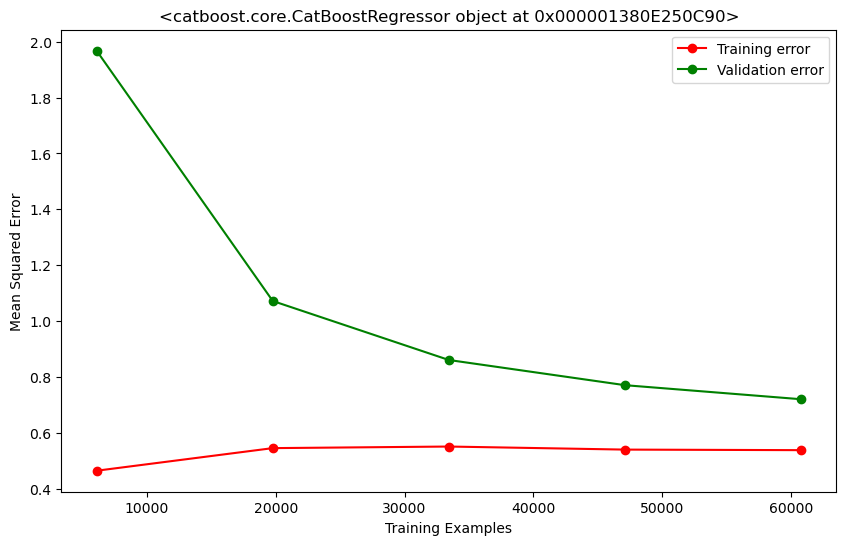

In [110]:
# Define the models and their parameter distributions
models = {
    'LightGBM': (LGBMRegressor(), {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.001, 0.1),
        'max_depth': randint(3, 10),
        'num_leaves': [31, 63, 127]  

    }),
    'CatBoost': (CatBoostRegressor(), {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.001, 0.1),
        'max_depth': randint(3, 10)  

    })
}

# Define a function to plot learning curves
def plot_learning_curves(model, X_train_pca, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title(model)
    plt.legend()
    plt.show()

# Perform model tuning and evaluation
results = []
lc_results = []

for model_name, (model, param_dist) in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, refit=True)
    random_search.fit(X_train_pca, y_train)

    best_model = random_search.best_estimator_
    best_model.fit(X_train_pca, y_train)

    y_pred = best_model.predict(X_valid_pca)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)

    result = {
        'Model': model_name,
        'Best Parameters': random_search.best_params_,
        'Best Negative MSE': random_search.best_score_,
        'Test MSE': mse,
        'R-squared': r2
    }
    results.append(result)

    # Calculate learning curve results
    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    # Append learning curve results
    lc_result = {
        'Model': model_name,
        'Train Sizes': train_sizes,
        'Train MSE': train_scores_mean,
        'Validation MSE': test_scores_mean
    }
    lc_results.append(lc_result)

    # Plot learning curve for the best model
    plot_learning_curves(best_model, X_train_pca, y_train)

# Create DataFrames for results and learning curve results
results_df = pd.DataFrame(results)
lc_results_df = pd.DataFrame(lc_results)


In [111]:
results_df

,Model,Best Parameters,Best Negative MSE,Test MSE,R-squared
0,LightGBM,"{'learning_rate': 0.0903300189269381, 'max_dep...",-0.69,0.63,0.99
1,CatBoost,"{'learning_rate': 0.029105603267681513, 'max_d...",-0.72,0.65,0.99


In [112]:
lc_results_df

,Model,Train Sizes,Train MSE,Validation MSE
0,LightGBM,"[5066, 16466, 27866, 39266, 50666]","[0.18032149809659534, 0.349330919261297, 0.410...","[2.1996140736622696, 1.144891625714146, 0.8973..."
1,CatBoost,"[5066, 16466, 27866, 39266, 50666]","[0.4507638164218619, 0.5385246668503972, 0.553...","[2.257662560270964, 1.1447391591859795, 0.9389..."


In [113]:
#mse LightGBM
lc_results_df["Validation MSE"][0]

array([2.19961407, 1.14489163, 0.8973203 , 0.80318658, 0.76168534])

In [114]:
#mrse LightGBM
np.sqrt(lc_results_df["Validation MSE"][0])

array([1.4831096 , 1.06999609, 0.94726992, 0.89620677, 0.87274586])

In [115]:
#mse CatBoost
lc_results_df["Validation MSE"][1]

array([2.25766256, 1.14473916, 0.93892191, 0.83884073, 0.75638116])

In [116]:
#mrse CatBoost
np.sqrt(lc_results_df["Validation MSE"][1])

array([1.50255202, 1.06992484, 0.96897983, 0.91588249, 0.86970176])